# Tracking Progress: Gender Inequality Over Time

#### *Data sources:*
1. UNDP: https://hdr.undp.org/data-center/documentation-and-downloads
2. Paper: https://hdr.undp.org/sites/default/files/2021-22_HDR/hdr2021-22_technical_notes.pdf

# Data Description Time Series Metadata

- Human Development Index (HDI): measure of achievements in three key dimensions of human development: a long and healthy life, access to knowledge and a decent standard of living.
- Inequality-adjusted Human Development Index (IHDI): measures the level of human development when inequality is accounted for
- Gender Development Index (GDI): measures gender inequalities in achievement in three basic dimensions of human development: health, measured by female and male life expectancy at birth; education, measured by female and male expected years of schooling for children and female and male mean years of schooling for adults ages 25 years and older; and command over economic resources, measured by female and male estimated earned income.
- Gender Inequality Index (GII): reflects gender-based disadvantage in three dimensions—reproductive health, empowerment and the labour market—for as many countries as data of reasonable quality allow. It ranges from 0, where women and men fare equally, to 1, where one gender fares as poorly as possible in all measured dimensions.
- Multidimensional Poverty Index (MPI): identifies multiple deprivations at the household level in health, education and standard of living.

### Data GII Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import plotly.express as px
import klib
import plotly.figure_factory as ff
import plotly.graph_objects as go
import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
d1 = pd.read_csv('HDR21-22_Composite_indices_complete_time_series.csv')
d1.tail(15)

iso3                          country hdicode region  hdi_rank_2021  \
191        YEM                            Yemen     Low     AS          183.0   
192        ZAF                     South Africa    High    SSA          109.0   
193        ZMB                           Zambia  Medium    SSA          154.0   
194        ZWE                         Zimbabwe  Medium    SSA          146.0   
195   ZZA.VHHD      Very high human development     NaN    NaN            NaN   
196    ZZB.HHD           High human development     NaN    NaN            NaN   
197    ZZC.MHD         Medium human development     NaN    NaN            NaN   
198    ZZD.LHD            Low human development     NaN    NaN            NaN   
199     ZZE.AS                      Arab States     NaN    NaN            NaN   
200    ZZF.EAP        East Asia and the Pacific     NaN    NaN            NaN   
201    ZZG.ECA          Europe and Central Asia     NaN    NaN            NaN   
202    ZZH.LAC  Latin America and the Caribbean     NaN    NaN            NaN   
203     ZZI.SA                       South Asia     NaN    NaN            NaN   
204    ZZJ.SSA               Sub-Saharan Africa     NaN    NaN            NaN   
205  ZZK.WORLD                            World     NaN    NaN            NaN   

     hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  hdi_1995  hdi_1996  \
191     0.383     0.386     0.391     0.397     0.399     0.409     0.419   
192     0.632     0.641     0.647     0.652     0.658     0.661     0.656   
193     0.412     0.408     0.408     0.414     0.411     0.413     0.414   
194     0.509     0.512     0.498     0.491     0.486     0.477     0.476   
195     0.784     0.787     0.790     0.792     0.796     0.800     0.806   
196     0.557     0.562     0.569     0.575     0.581     0.588     0.596   
197     0.453     0.456     0.461     0.465     0.470     0.475     0.482   
198     0.356     0.359     0.361     0.363     0.366     0.372     0.378   
199     0.555     0.558     0.565     0.574     0.582     0.586     0.593   
200     0.507     0.514     0.524     0.534     0.542     0.551     0.561   
201     0.664     0.661     0.654     0.652     0.647     0.652     0.656   
202     0.633     0.638     0.643     0.648     0.654     0.658     0.665   
203     0.442     0.447     0.453     0.457     0.462     0.467     0.474   
204     0.407     0.410     0.410     0.411     0.413     0.420     0.423   
205     0.601     0.604     0.607     0.610     0.614     0.619     0.624   

     hdi_1997  hdi_1998  hdi_1999  hdi_2000  hdi_2001  hdi_2002  hdi_2003  \
191     0.427     0.435     0.441     0.450     0.460     0.468     0.476   
192     0.651     0.644     0.638     0.633     0.629     0.633     0.629   
193     0.413     0.411     0.413     0.418     0.425     0.434     0.448   
194     0.472     0.466     0.457     0.452     0.441     0.452     0.439   
195     0.812     0.817     0.819     0.826     0.831     0.835     0.839   
196     0.603     0.610     0.616     0.625     0.632     0.640     0.647   
197     0.488     0.495     0.501     0.506     0.511     0.517     0.527   
198     0.383     0.387     0.395     0.399     0.406     0.415     0.427   
199     0.599     0.603     0.612     0.618     0.624     0.628     0.632   
200     0.569     0.575     0.583     0.592     0.600     0.610     0.620   
201     0.662     0.669     0.671     0.681     0.687     0.695     0.702   
202     0.672     0.677     0.683     0.689     0.693     0.698     0.699   
203     0.480     0.486     0.494     0.500     0.504     0.511     0.522   
204     0.427     0.428     0.431     0.430     0.435     0.443     0.451   
205     0.629     0.634     0.639     0.645     0.650     0.655     0.660   

     hdi_2004  hdi_2005  hdi_2006  hdi_2007  hdi_2008  hdi_2009  hdi_2010  \
191     0.483     0.489     0.494     0.498     0.501     0.506     0.510   
192     0.630     0.632     0.637     0.644     0.653     0.665     0.675   
193     0.459   

In [4]:
# Mengambil kolom gii, country dan hdicode
gii_series = d1.filter(regex=re.compile(r'gii|country', re.IGNORECASE))

gii_series.head()

country  gii_rank_2021  gii_1990  gii_1991  gii_1992  \
0           Afghanistan          167.0       NaN       NaN       NaN   
1                Angola          136.0     0.725     0.723     0.721   
2               Albania           39.0       NaN       NaN       NaN   
3               Andorra            NaN       NaN       NaN       NaN   
4  United Arab Emirates           11.0     0.659     0.647     0.640   

   gii_1993  gii_1994  gii_1995  gii_1996  gii_1997  gii_1998  gii_1999  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1     0.719     0.717     0.714     0.712     0.708     0.683     0.678   
2       NaN       NaN       NaN       NaN       NaN       NaN     0.330   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     0.632     0.635     0.627     0.624     0.616     0.609     0.605   

   gii_2000  gii_2001  gii_2002  gii_2003  gii_2004  gii_2005  gii_2006  \
0       NaN       NaN       NaN       NaN       NaN     0.748     0.749   
1     0.671     0.665     0.657     0.649     0.643     0.636     0.628   
2     0.319     0.282     0.297     0.305     0.301     0.306     0.285   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     0.605     0.602     0.599     0.597     0.592     0.584     0.311   

   gii_2007  gii_2008  gii_2009  gii_2010  gii_2011  gii_2012  gii_2013  \
0     0.752     0.755     0.755     0.753     0.746     0.738     0.728   
1     0.621     0.568     0.560     0.551     0.544     0.545     0.540   
2     0.286     0.293     0.242     0.246     0.252     0.235     0.225   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     0.202     0.193     0.185     0.175     0.181     0.171     0.161   

   gii_2014  gii_2015  gii_2016  gii_2017  gii_2018  gii_2019  gii_2020  \
0     0.718     0.706     0.692     0.678     0.671     0.665     0.674   
1     0.531     0.530     0.529     0.538     0.537     0.537     0.537   
2     0.219     0.204     0.191     0.170     0.164     0.156     0.156   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     0.151     0.126     0.118     0.112     0.103     0.056     0.050   

   gii_2021  
0     0.678  
1     0.537  
2     0.144  
3       NaN  
4     0.049

In [5]:
# Hapus kolom dan baris yang tidak digunakan
gii_series = gii_series.drop('gii_rank_2021', axis=1)
gii_series = gii_series.drop(gii_series.tail(11).index)

In [6]:
gii_series.tail()

country  gii_1990  gii_1991  gii_1992  gii_1993  gii_1994  gii_1995  \
190         Samoa       NaN       NaN       NaN       NaN       NaN       NaN   
191         Yemen       NaN       NaN       NaN       NaN       NaN       NaN   
192  South Africa     0.511     0.502     0.496     0.489     0.482     0.476   
193        Zambia     0.666     0.660     0.654     0.651     0.647     0.642   
194      Zimbabwe     0.605     0.602     0.598     0.596     0.595     0.594   

     gii_1996  gii_1997  gii_1998  gii_1999  gii_2000  gii_2001  gii_2002  \
190       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
191       NaN       NaN     0.812     0.807     0.805     0.803     0.802   
192     0.472     0.468     0.461     0.459     0.459     0.461     0.459   
193     0.645     0.646     0.646     0.648     0.648     0.642     0.629   
194     0.593     0.594     0.596     0.602     0.625     0.626     0.628   

     gii_2003  gii_2004  gii_2005  gii_2006  gii_2007  gii_2008  gii_2009  \
190       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
191     0.822     0.821     0.799     0.800     0.799     0.798     0.798   
192     0.463     0.459     0.454     0.456     0.452     0.463     0.443   
193     0.626     0.623     0.617     0.606     0.600     0.594     0.592   
194     0.629     0.628     0.595     0.590     0.588     0.597     0.596   

     gii_2010  gii_2011  gii_2012  gii_2013  gii_2014  gii_2015  gii_2016  \
190       NaN     0.479     0.482     0.475     0.447     0.443     0.409   
191     0.798     0.799     0.800     0.802     0.806     0.815     0.810   
192     0.440     0.441     0.432     0.431     0.433     0.427     0.418   
193     0.586     0.590     0.585     0.581     0.579     0.567     0.545   
194     0.592     0.587     0.583     0.547     0.545     0.540     0.537   

     gii_2017  gii_2018  gii_2019  gii_2020  gii_2021  
190     0.407     0.407     0.405     0.404     0.418  
191     0.808     0.806     0.785     0.784     0.820  
192     0.407     0.405     0.410     0.408     0.405  
193     0.540     0.537     0.534     0.535     0.540  
194     0.532     0.535     0.533     0.533     0.532

In [7]:
# Membuat kolom baru 'region'

country_to_region = {
    'Switzerland': 'Europe and Central Asia',
    'Norway': 'Europe and Central Asia',
    'Iceland': 'Europe and Central Asia',
    'Hong Kong, China (SAR)': 'East Asia and the Pacific',
    'Australia': 'East Asia and the Pacific',
    'Denmark': 'Europe and Central Asia',
    'Sweden': 'Europe and Central Asia',
    'Ireland': 'Europe and Central Asia',
    'Germany': 'Europe and Central Asia',
    'Netherlands': 'Europe and Central Asia',
    'Finland': 'Europe and Central Asia',
    'Singapore': 'East Asia and the Pacific',
    'Belgium': 'Europe and Central Asia',
    'New Zealand': 'East Asia and the Pacific',
    'Canada': 'North America',
    'Liechtenstein': 'Europe and Central Asia',
    'Luxembourg': 'Europe and Central Asia',
    'United Kingdom': 'Europe and Central Asia',
    'Japan': 'East Asia and the Pacific',
    'Korea (Republic of)': 'East Asia and the Pacific',
    'United States': 'North America',
    'Israel': 'Middle East and North Africa',
    'Malta': 'Europe and Central Asia',
    'Slovenia': 'Europe and Central Asia',
    'Austria': 'Europe and Central Asia',
    'United Arab Emirates': 'Middle East and North Africa',
    'Spain': 'Europe and Central Asia',
    'France': 'Europe and Central Asia',
    'Cyprus': 'Europe and Central Asia',
    'Italy': 'Europe and Central Asia',
    'Estonia': 'Europe and Central Asia',
    'Czechia': 'Europe and Central Asia',
    'Greece': 'Europe and Central Asia',
    'Poland': 'Europe and Central Asia',
    'Bahrain': 'Middle East and North Africa',
    'Lithuania': 'Europe and Central Asia',
    'Saudi Arabia': 'Middle East and North Africa',
    'Portugal': 'Europe and Central Asia',
    'Latvia': 'Europe and Central Asia',
    'Andorra': 'Europe and Central Asia',
    'Croatia': 'Europe and Central Asia',
    'Chile': 'Latin America and the Caribbean',
    'Qatar': 'Middle East and North Africa',
    'San Marino': 'Europe and Central Asia',
    'Slovakia': 'Europe and Central Asia',
    'Hungary': 'Europe and Central Asia',
    'Argentina': 'Latin America and the Caribbean',
    'Türkiye': 'Europe and Central Asia',
    'Montenegro': 'Europe and Central Asia',
    'Kuwait': 'Middle East and North Africa',
    'Brunei Darussalam': 'East Asia and the Pacific',
    'Russian Federation': 'Europe and Central Asia',
    'Romania': 'Europe and Central Asia',
    'Oman': 'Middle East and North Africa',
    'Bahamas': 'Latin America and the Caribbean',
    'Kazakhstan': 'Europe and Central Asia',
    'Trinidad and Tobago': 'Latin America and the Caribbean',
    'Costa Rica': 'Latin America and the Caribbean',
    'Uruguay': 'Latin America and the Caribbean',
    'Belarus': 'Europe and Central Asia',
    'Panama': 'Latin America and the Caribbean',
    'Malaysia': 'East Asia and the Pacific',
    'Georgia': 'Europe and Central Asia',
    'Mauritius': 'Sub-Saharan Africa',
    'Serbia': 'Europe and Central Asia',
    'Thailand': 'East Asia and the Pacific',
    'Albania': 'Europe and Central Asia',
    'Bulgaria': 'Europe and Central Asia',
    'Grenada': 'Latin America and the Caribbean',
    'Barbados': 'Latin America and the Caribbean',
    'Antigua and Barbuda': 'Latin America and the Caribbean',
    'Seychelles': 'Sub-Saharan Africa',
    'Sri Lanka': 'South Asia',
    'Bosnia and Herzegovina': 'Europe and Central Asia',
    'Saint Kitts and Nevis': 'Latin America and the Caribbean',
    'Iran (Islamic Republic of)': 'Middle East and North Africa',
    'Ukraine': 'Europe and Central Asia',
    'North Macedonia': 'Europe and Central Asia',
    'China': 'East Asia and the Pacific',
    'Dominican Republic': 'Latin America and the Caribbean',
    'Moldova (Republic of)': 'Europe and Central Asia',
    'Palau': 'East Asia and the Pacific',
    'Cuba': 'Latin America and the Caribbean',
    'Peru': 'Latin America and the Caribbean',
    'Armenia': 'Europe and Central Asia',
    'Mexico': 'Latin America and the Caribbean',
    'Brazil': 'Latin America and the Caribbean',
    'Colombia': 'Latin America and the Caribbean',
    'Saint Vincent and the Grenadines': 'Latin America and the Caribbean',
    'Maldives': 'South Asia',
    'Algeria': 'Middle East and North Africa',
    'Azerbaijan': 'Europe and Central Asia',
    'Tonga': 'East Asia and the Pacific',
    'Turkmenistan': 'Europe and Central Asia',
    'Ecuador': 'Latin America and the Caribbean',
    'Mongolia': 'East Asia and the Pacific',
    'Egypt': 'Middle East and North Africa',
    'Tunisia': 'Middle East and North Africa',
    'Fiji': 'East Asia and the Pacific',
    'Suriname': 'Latin America and the Caribbean',
    'Uzbekistan': 'Europe and Central Asia',
    'Dominica': 'Latin America and the Caribbean',
    'Jordan': 'Middle East and North Africa',
    'Libya': 'Middle East and North Africa',
    'Paraguay': 'Latin America and the Caribbean',
    'Palestine, State of': 'Middle East and North Africa',
    'Saint Lucia': 'Latin America and the Caribbean',
    'Guyana': 'Latin America and the Caribbean',
    'South Africa': 'Sub-Saharan Africa',
    'Jamaica': 'Latin America and the Caribbean',
    'Samoa': 'East Asia and the Pacific',
    'Gabon': 'Sub-Saharan Africa',
    'Lebanon': 'Middle East and North Africa',
    'Indonesia': 'East Asia and the Pacific',
    'Viet Nam': 'East Asia and the Pacific',
    'Philippines': 'East Asia and the Pacific',
    'Botswana': 'Sub-Saharan Africa',
    'Bolivia (Plurinational State of)': 'Latin America and the Caribbean',
    'Kyrgyzstan': 'Europe and Central Asia',
    'Venezuela (Bolivarian Republic of)': 'Latin America and the Caribbean',
    'Iraq': 'Middle East and North Africa',
    'Tajikistan': 'Europe and Central Asia',
    'Belize': 'Latin America and the Caribbean',
    'Morocco': 'Middle East and North Africa',
    'El Salvador': 'Latin America and the Caribbean',
    'Nicaragua': 'Latin America and the Caribbean',
    'Bhutan': 'South Asia',
    'Cabo Verde': 'Sub-Saharan Africa',
    'Bangladesh': 'South Asia',
    'Tuvalu': 'East Asia and the Pacific',
    'Marshall Islands': 'East Asia and the Pacific',
    'India': 'South Asia',
    'Ghana': 'Sub-Saharan Africa',
    'Micronesia (Federated States of)': 'East Asia and the Pacific',
    'Guatemala': 'Latin America and the Caribbean',
    'Kiribati': 'East Asia and the Pacific',
    'Honduras': 'Latin America and the Caribbean',
    'Sao Tome and Principe': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    "Lao People's Democratic Republic": 'East Asia and the Pacific',
    'Timor-Leste': 'East Asia and the Pacific',
    'Vanuatu': 'East Asia and the Pacific',
    'Nepal': 'South Asia',
    'Eswatini (Kingdom of)': 'Sub-Saharan Africa',
    'Equatorial Guinea': 'Sub-Saharan Africa',
    'Cambodia': 'East Asia and the Pacific',
    'Zimbabwe': 'Sub-Saharan Africa',
    'Angola': 'Sub-Saharan Africa',
    'Myanmar': 'East Asia and the Pacific',
    'Syrian Arab Republic': 'Middle East and North Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Congo': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Solomon Islands': 'East Asia and the Pacific',
    'Comoros': 'Sub-Saharan Africa',
    'Papua New Guinea': 'East Asia and the Pacific',
    'Mauritania': 'Sub-Saharan Africa',
    "Côte d'Ivoire": 'Sub-Saharan Africa',
    'Tanzania (United Republic of)': 'Sub-Saharan Africa',
    'Pakistan': 'South Asia',
    'Togo': 'Sub-Saharan Africa',
    'Haiti': 'Latin America and the Caribbean',
    'Nigeria': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Djibouti': 'Middle East and North Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Eritrea': 'Sub-Saharan Africa',
    'Guinea-Bissau': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Congo (Democratic Republic of the)': 'Sub-Saharan Africa',
    'Afghanistan': 'South Asia',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Yemen': 'Middle East and North Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Timor-Leste': 'East Asia and the Pacific',
    'Unknown': 'Unknown'
}

gii_series['region'] = gii_series['country'].map(country_to_region)


In [8]:
gii_series['region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe and Central Asia',
       'Middle East and North Africa', 'Latin America and the Caribbean',
       'East Asia and the Pacific', 'North America', nan], dtype=object)

                                             |      | [  0%]   00:00 -> (? left)


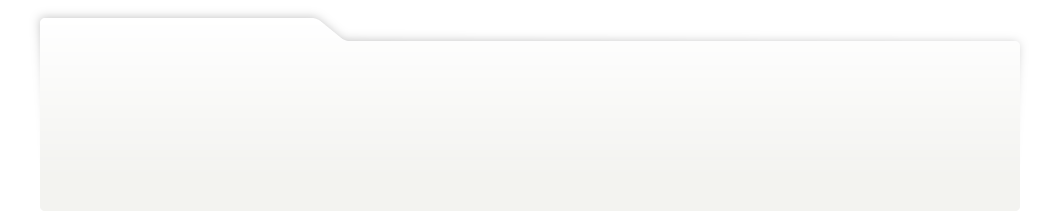
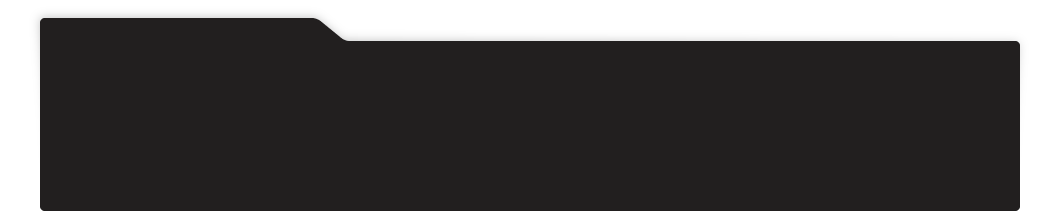
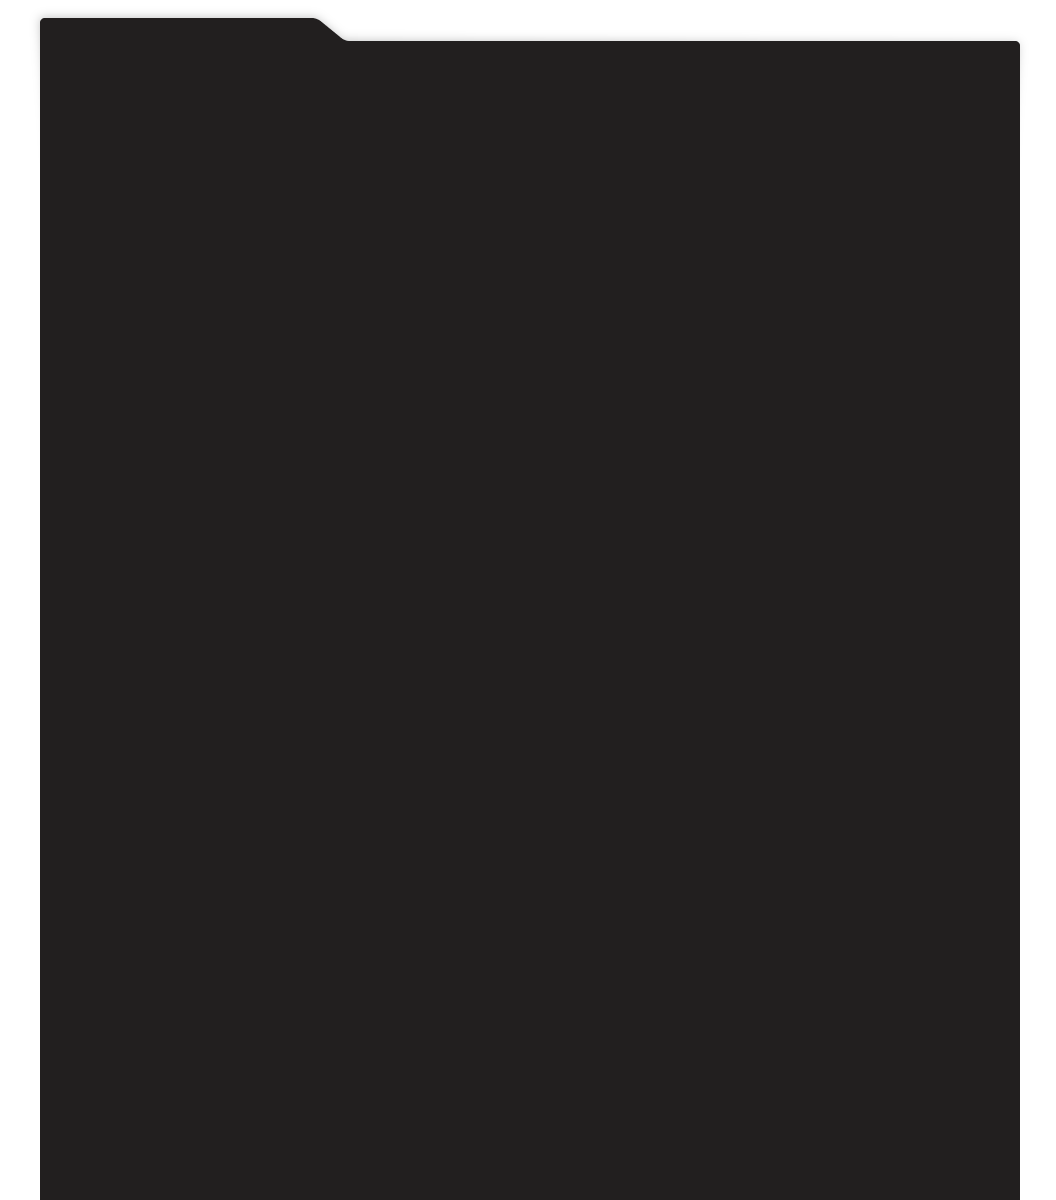
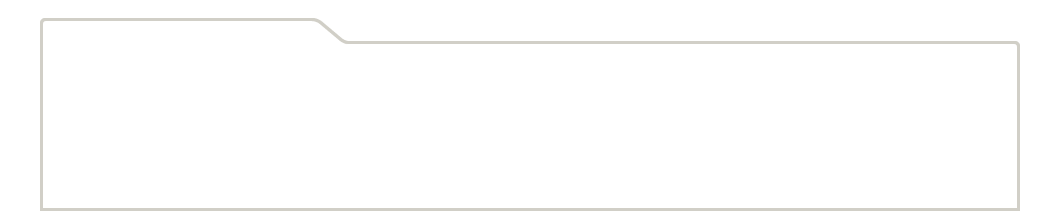
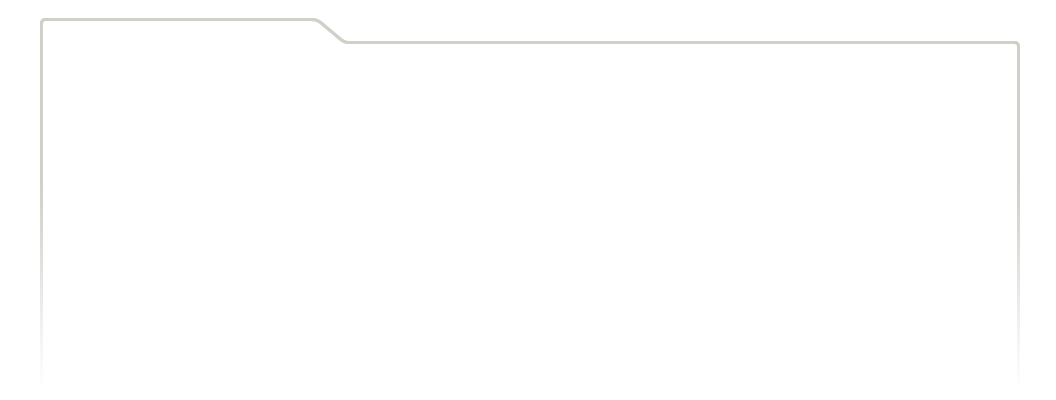
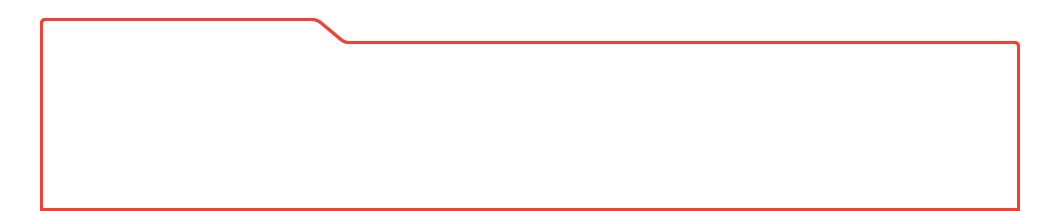
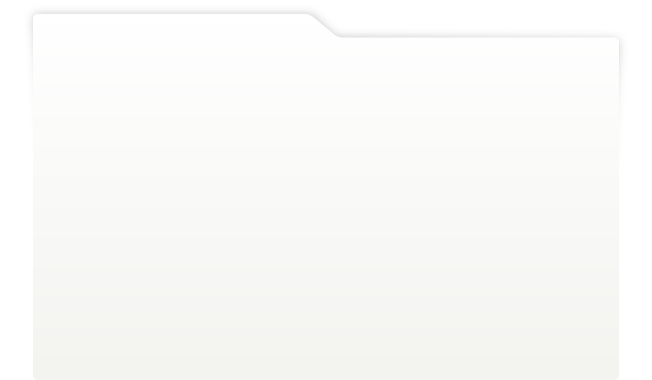
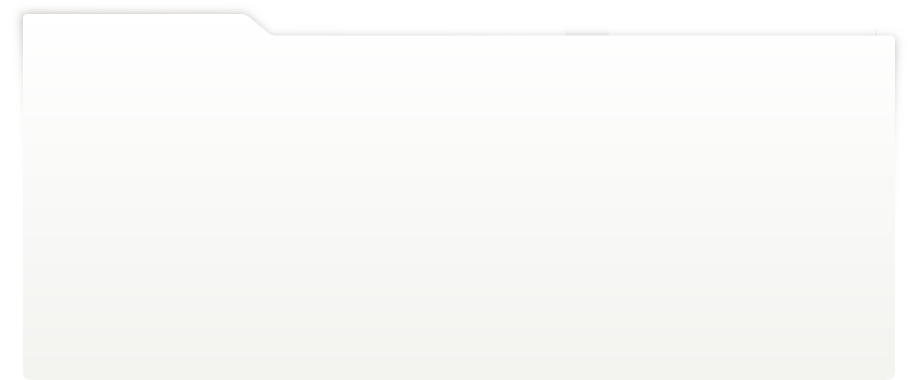
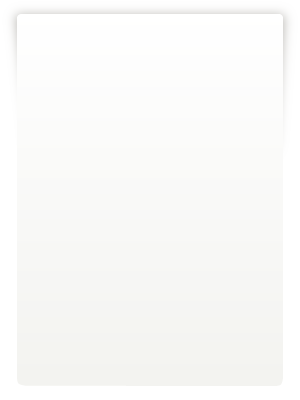
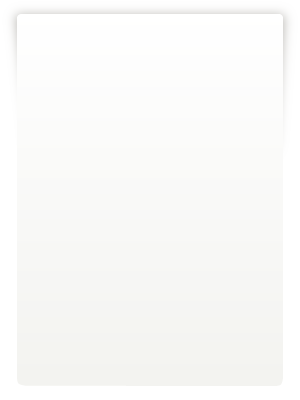
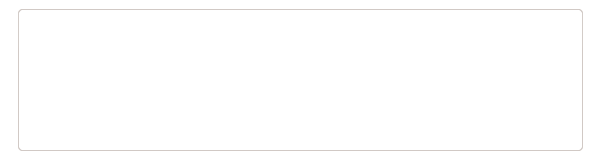
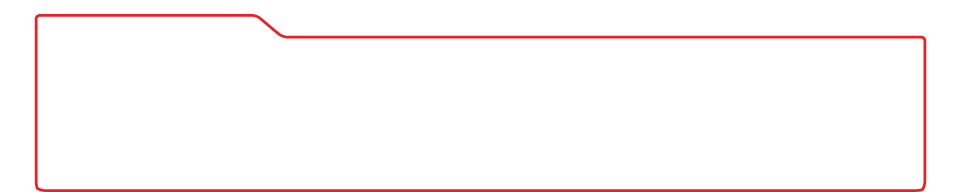
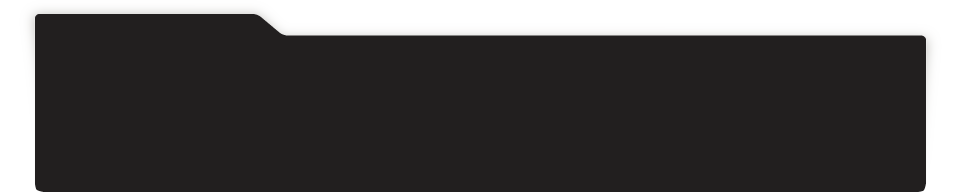
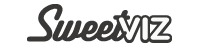
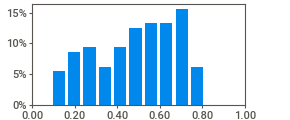
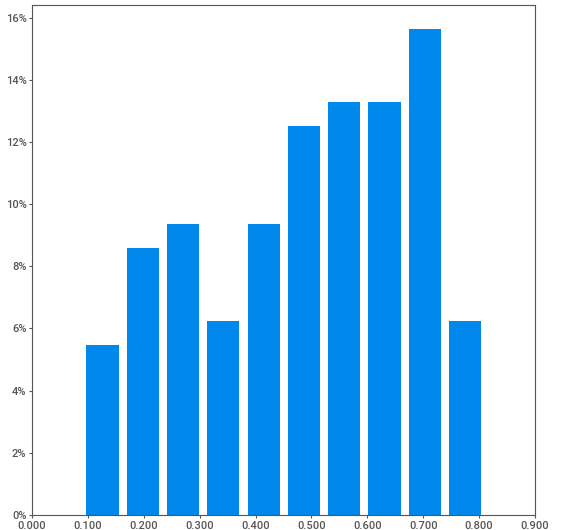
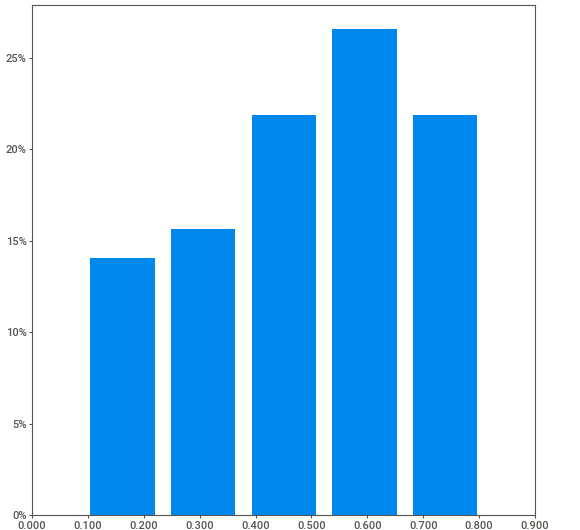
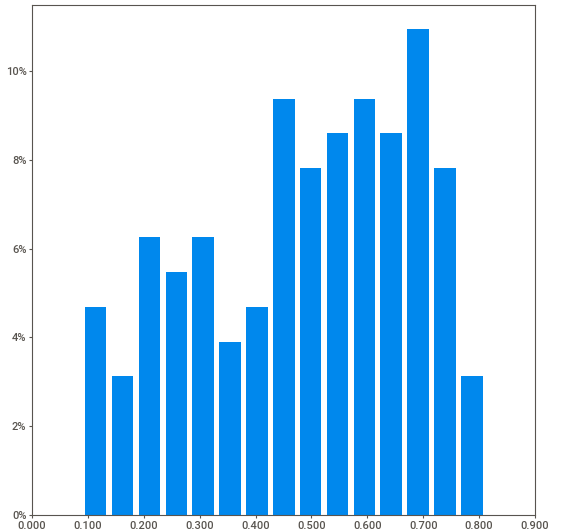
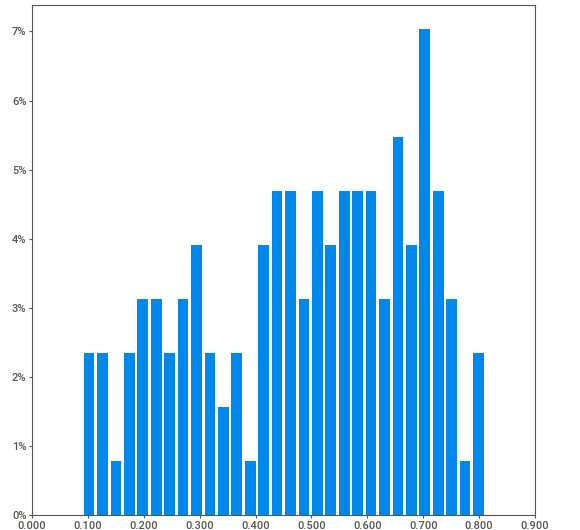
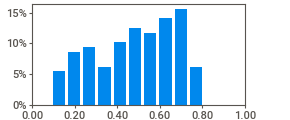
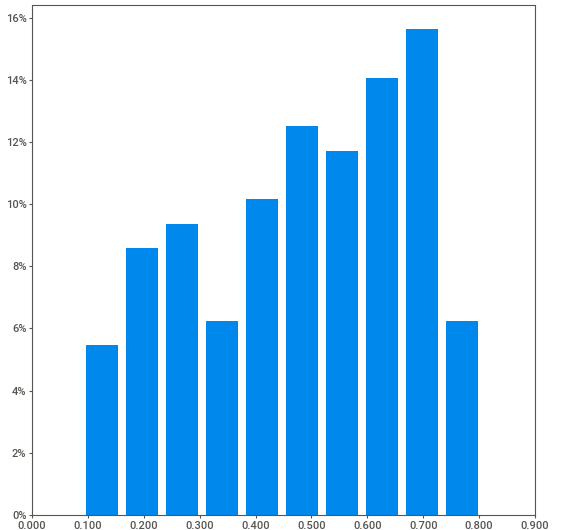
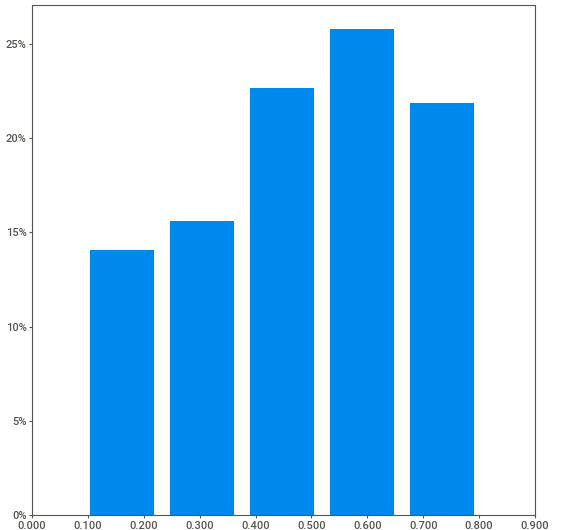
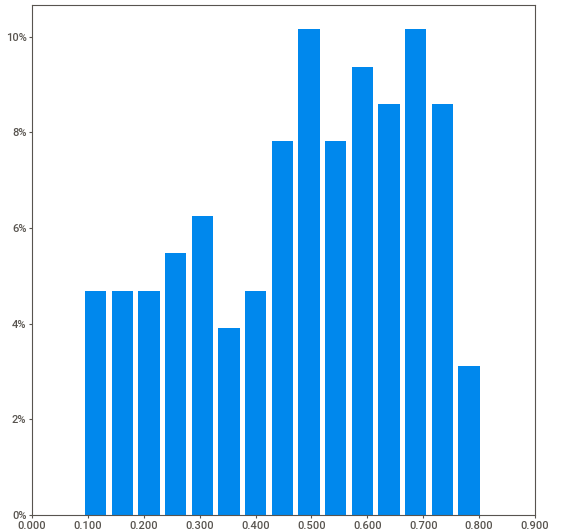
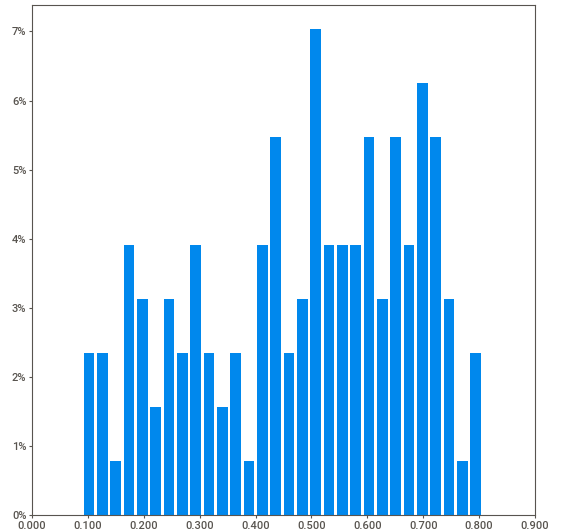
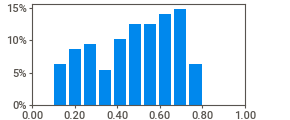
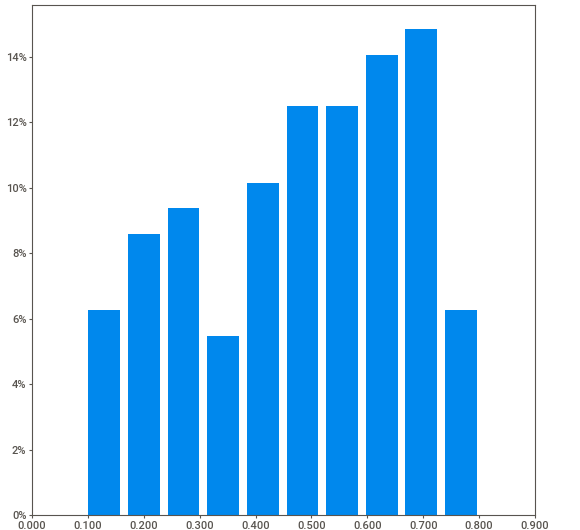
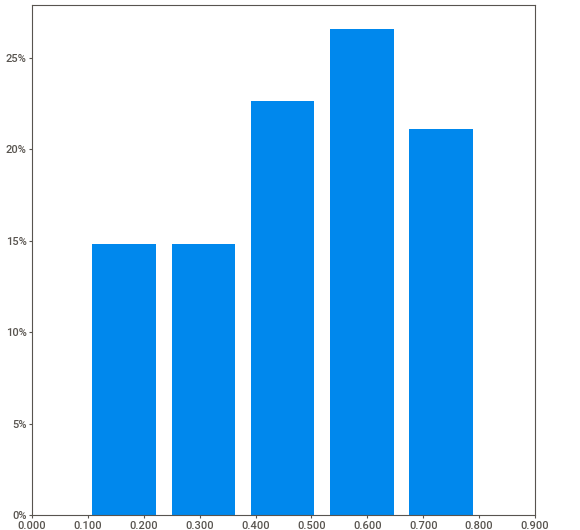
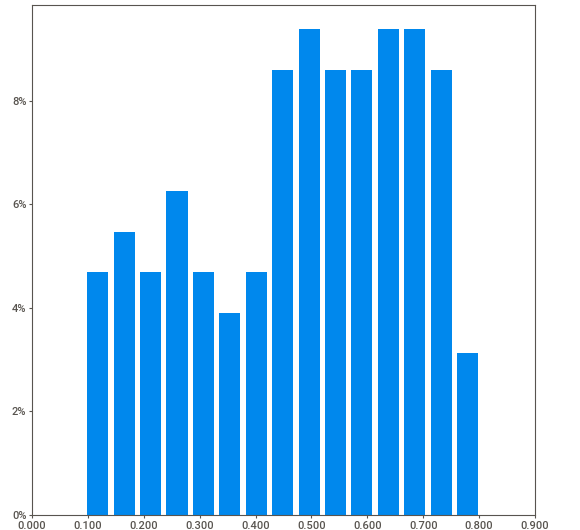
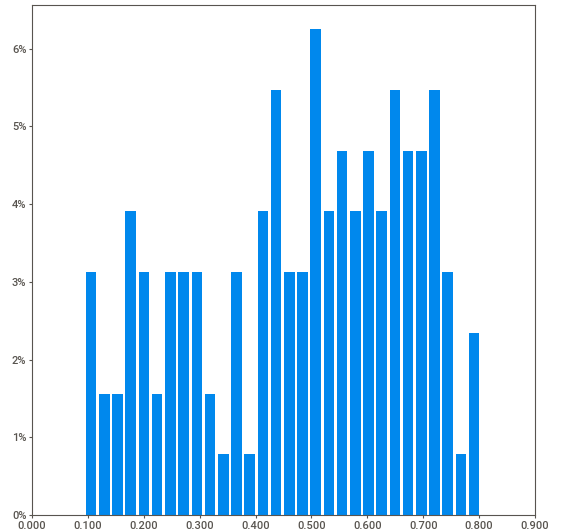
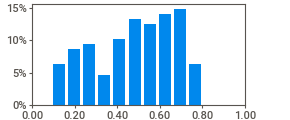
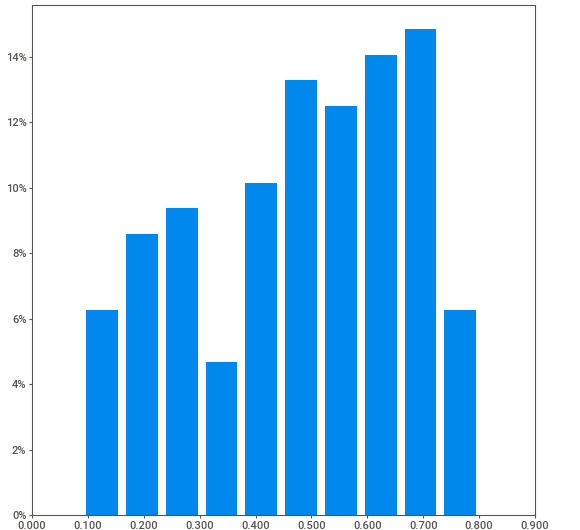
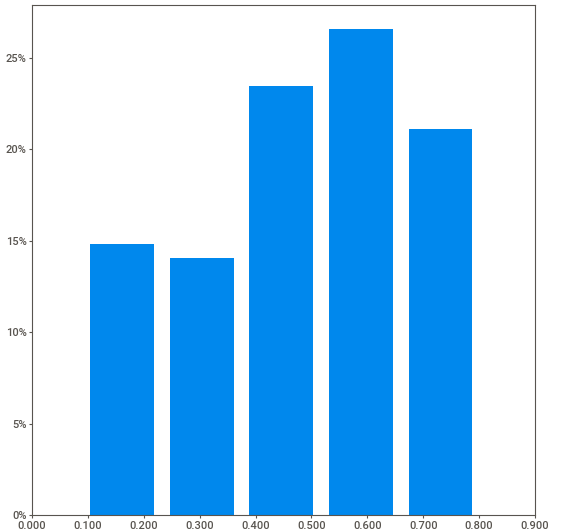
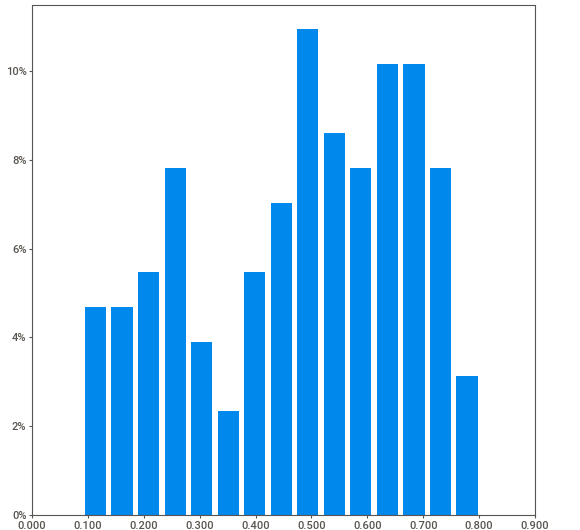
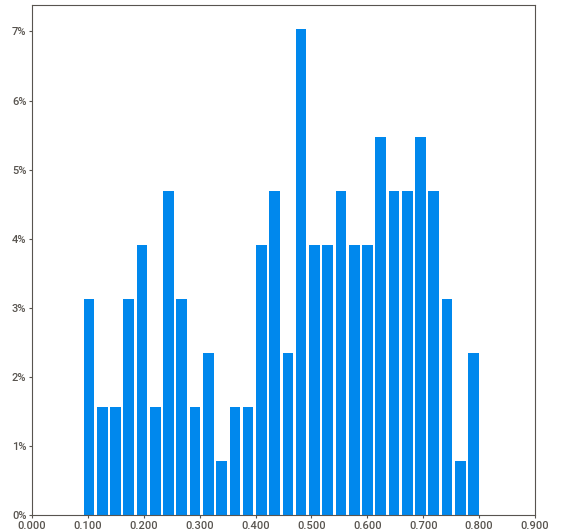
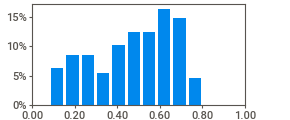
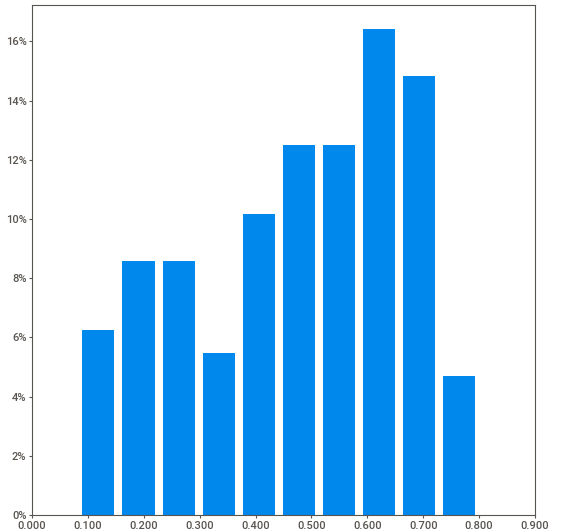
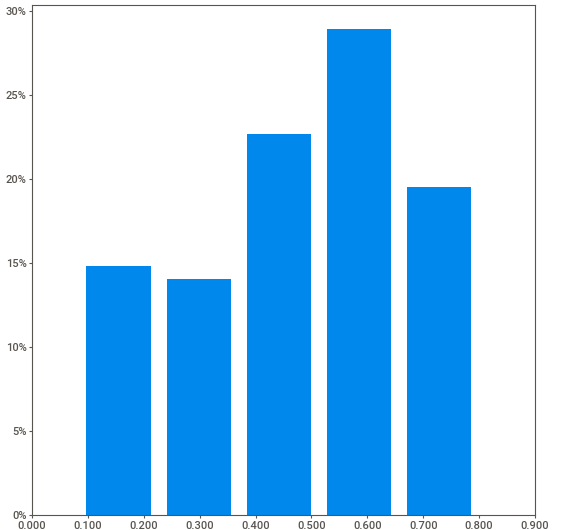
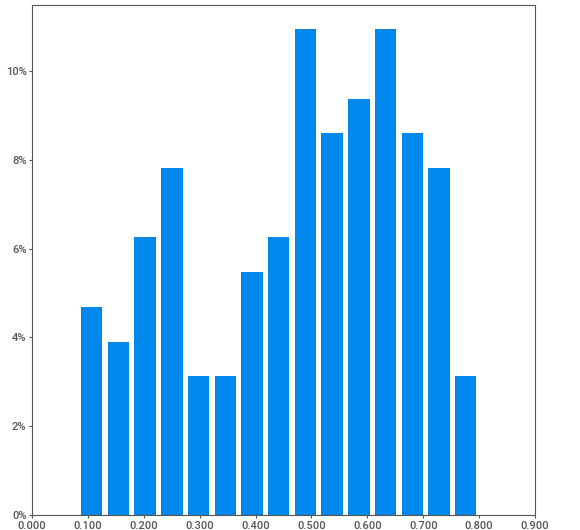
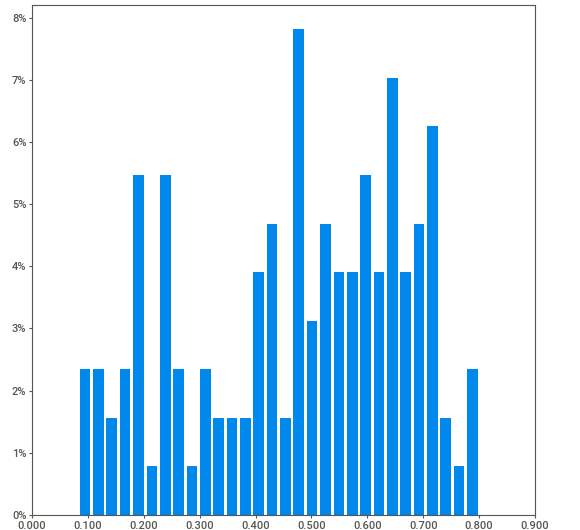
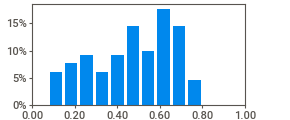
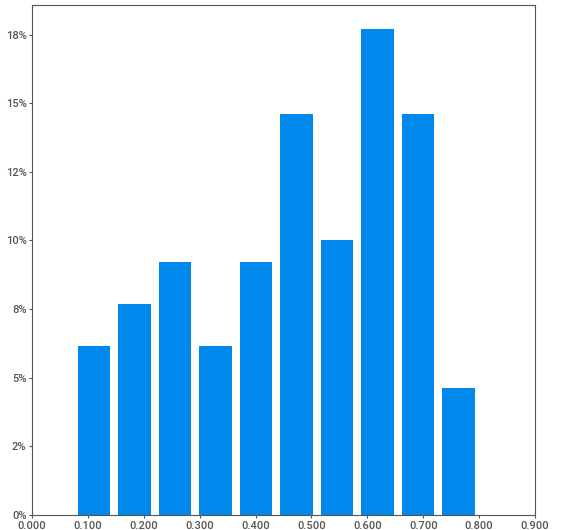
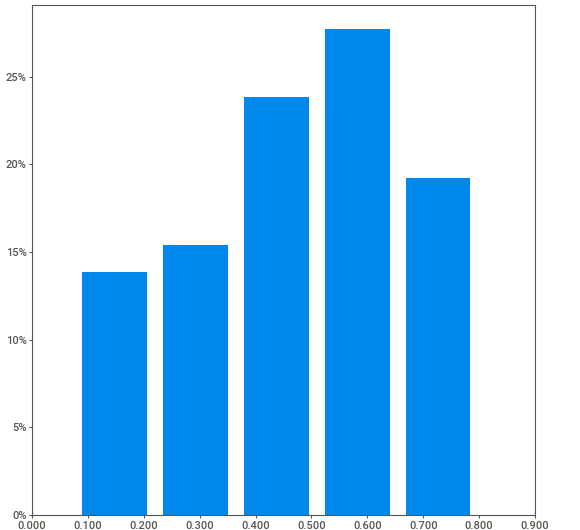
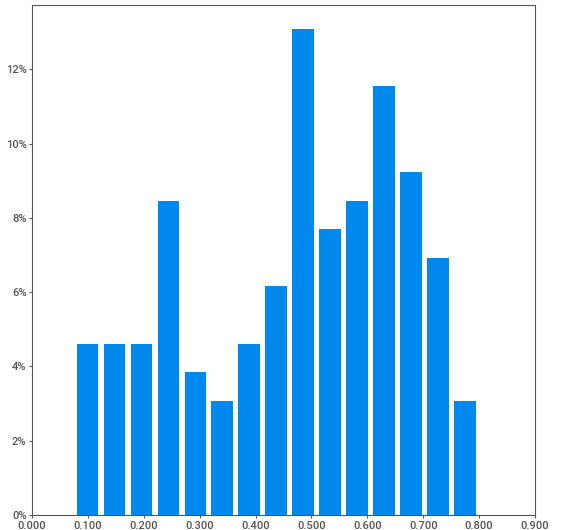
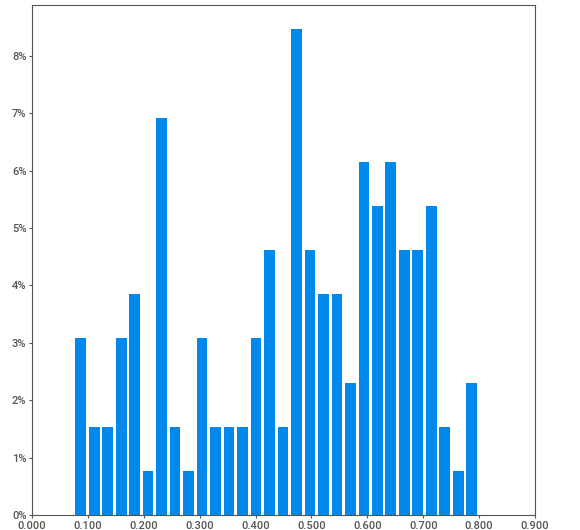
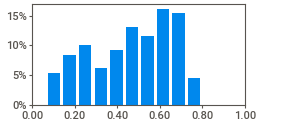
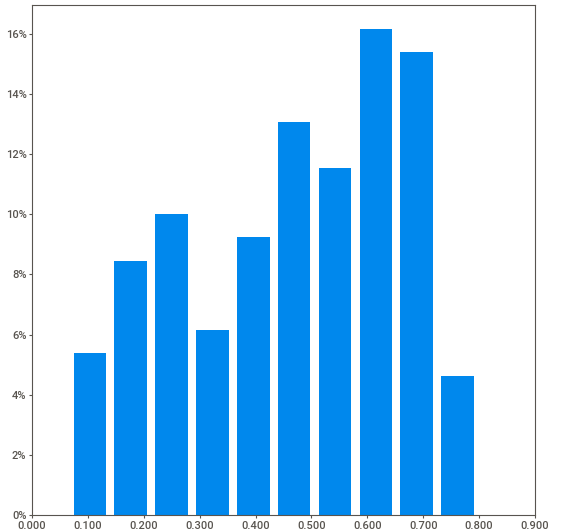
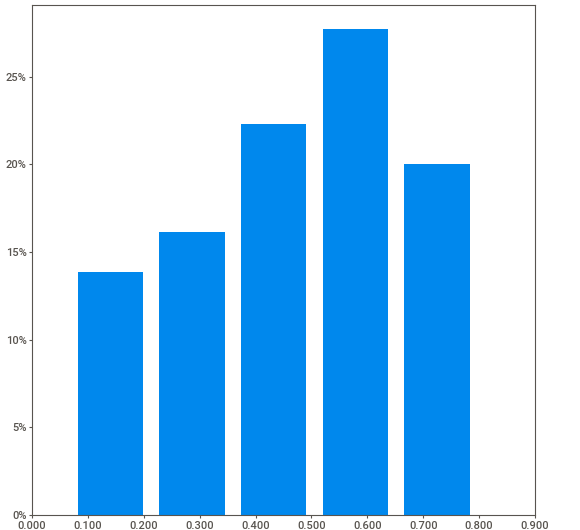
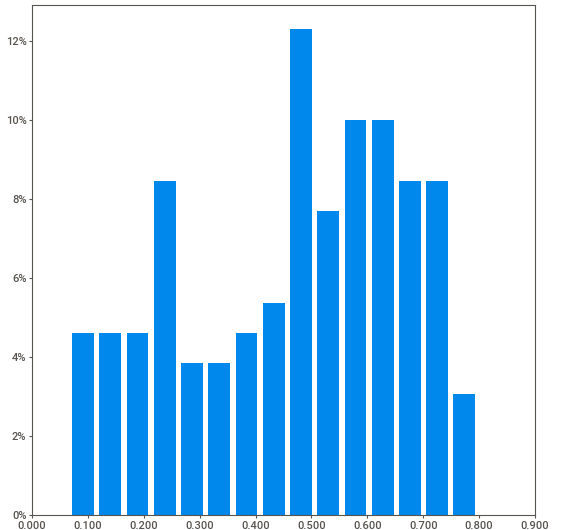
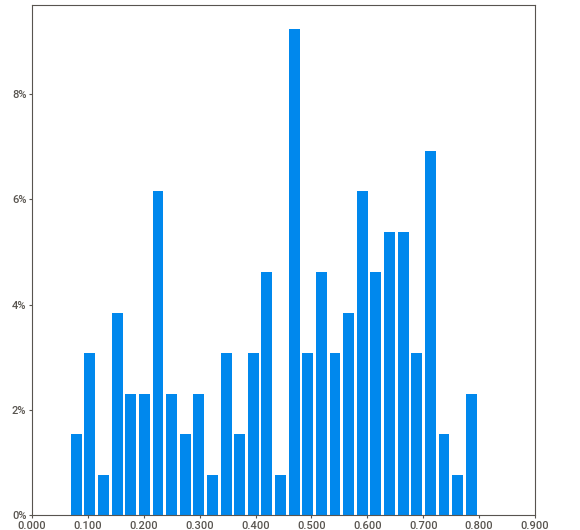
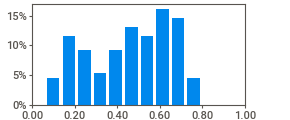
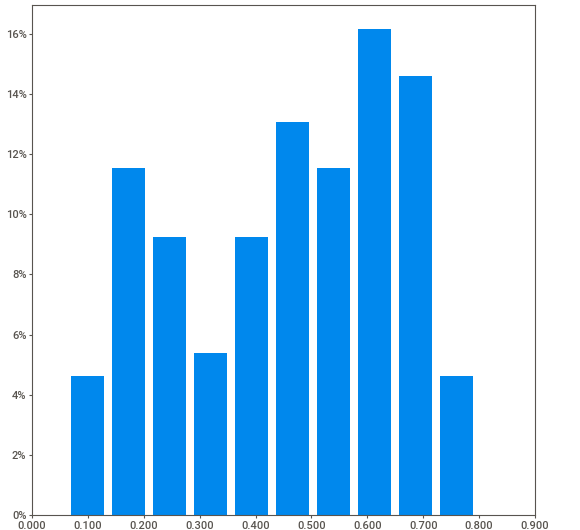
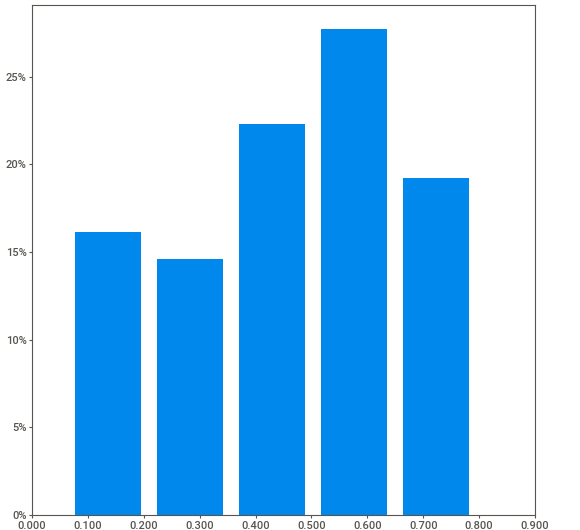
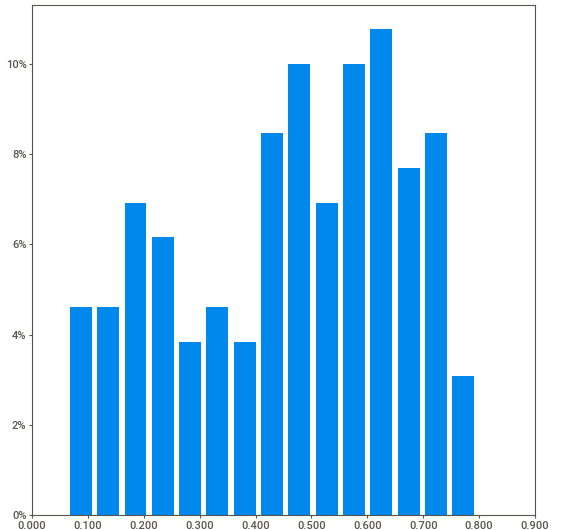
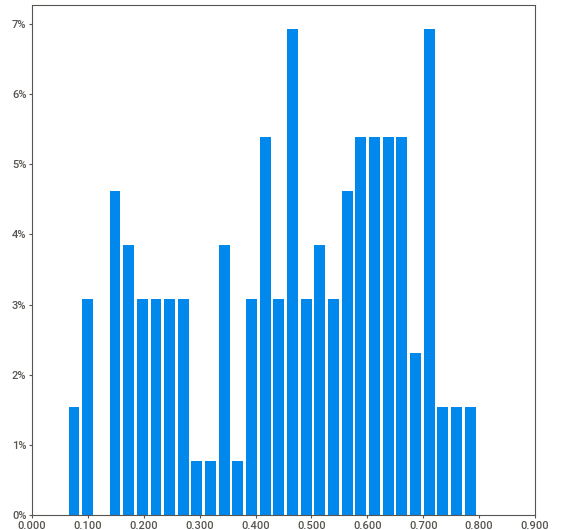
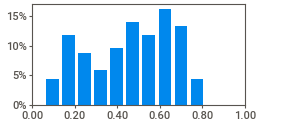
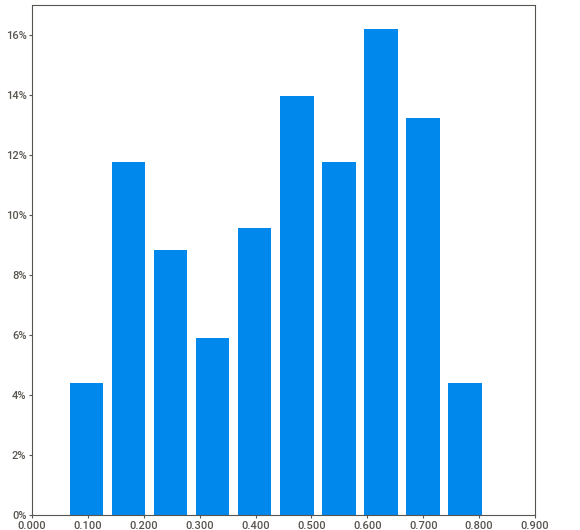
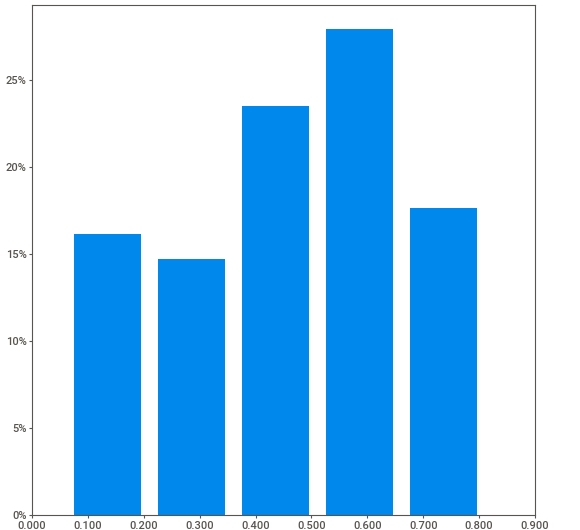
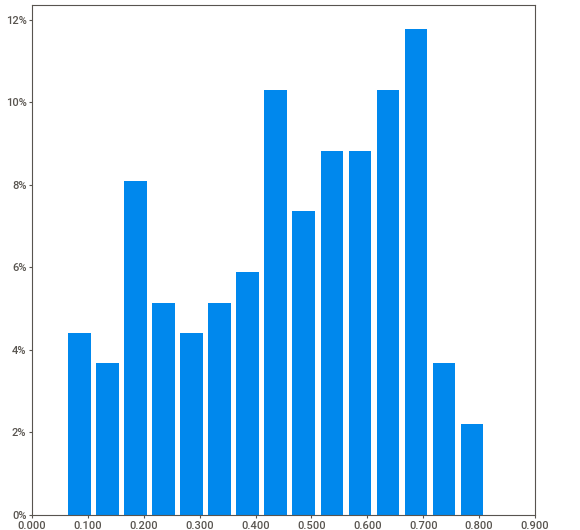
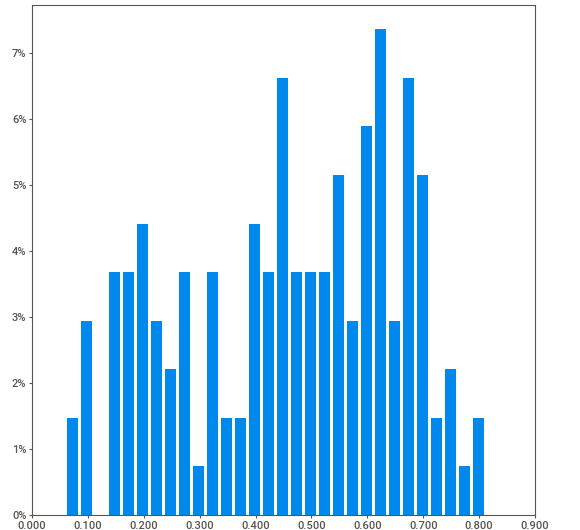
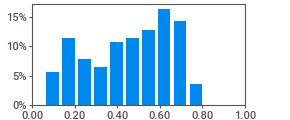
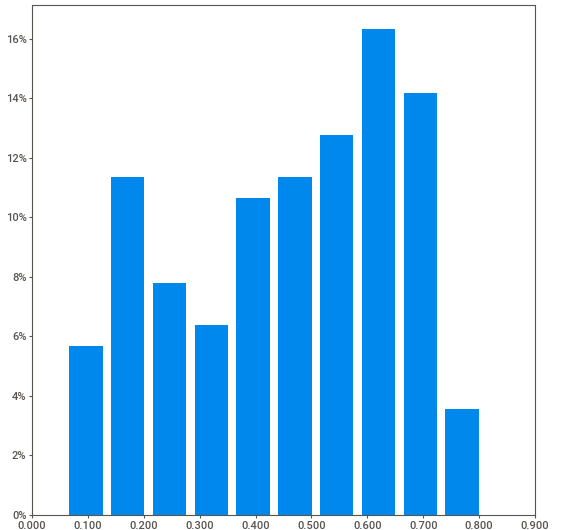
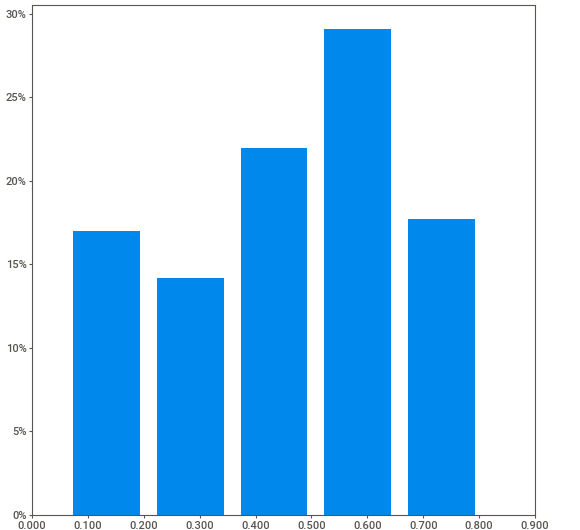
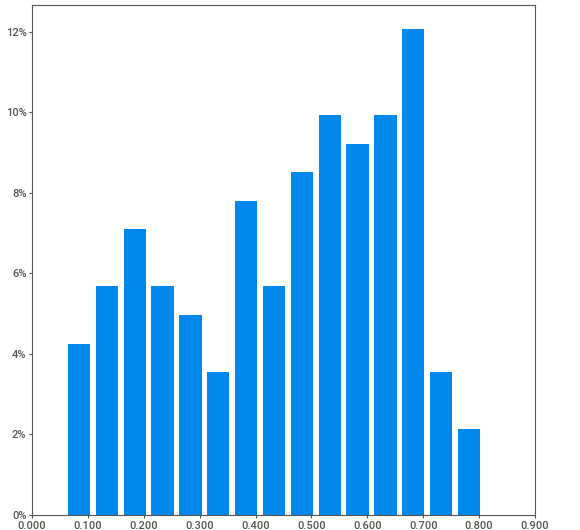
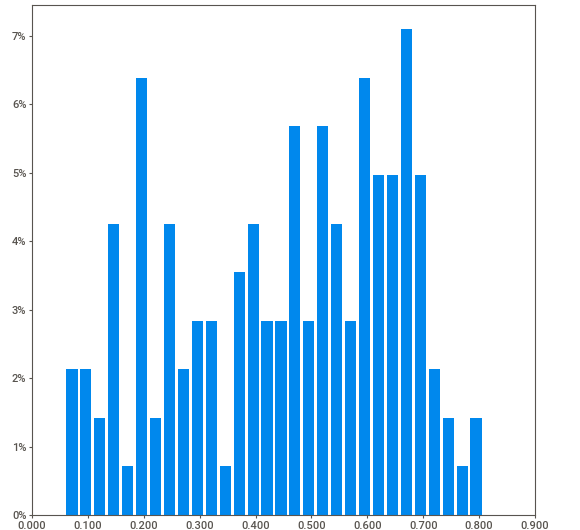
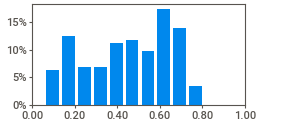
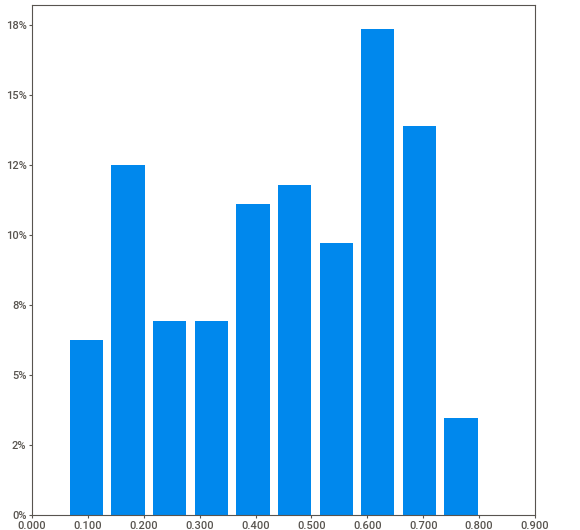
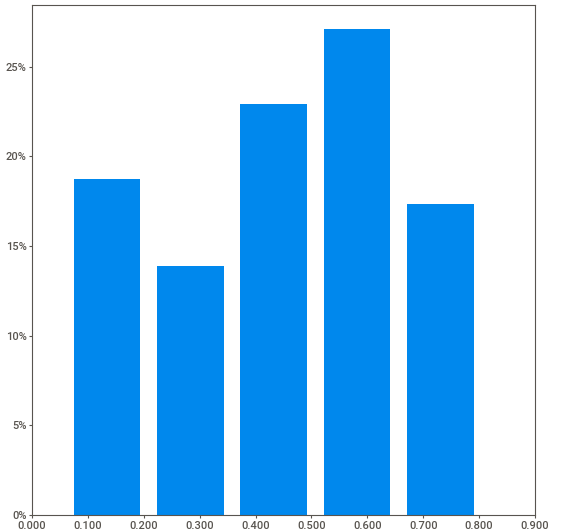
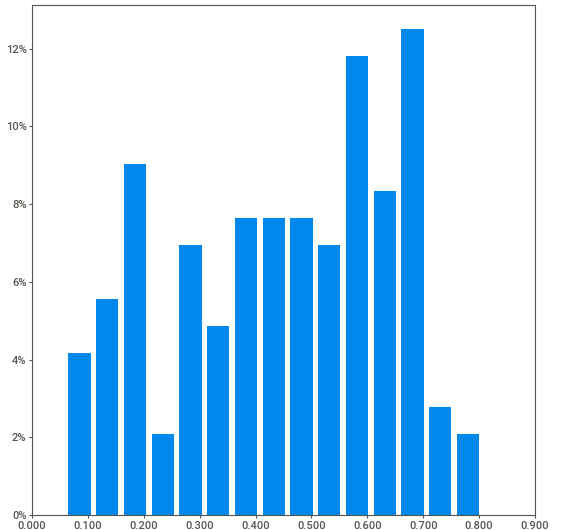
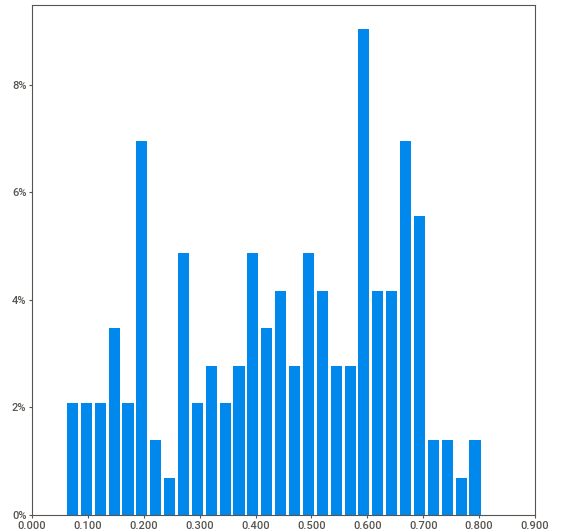
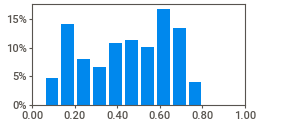
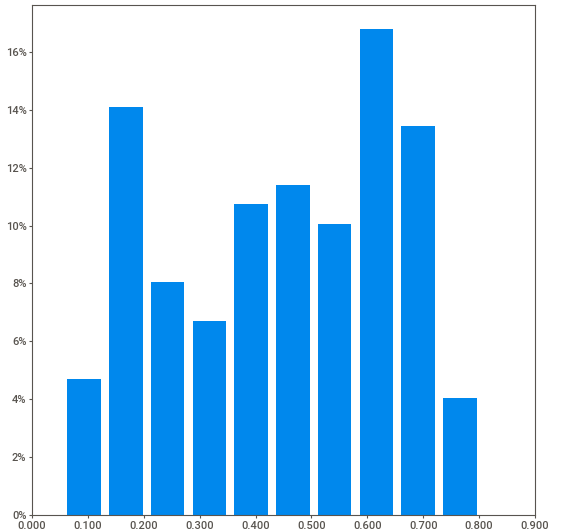
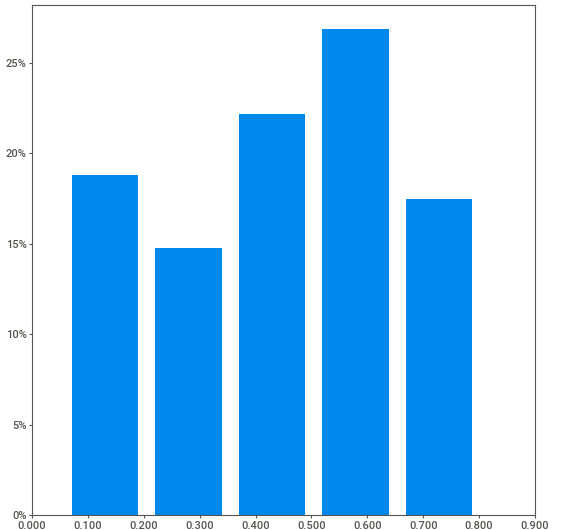
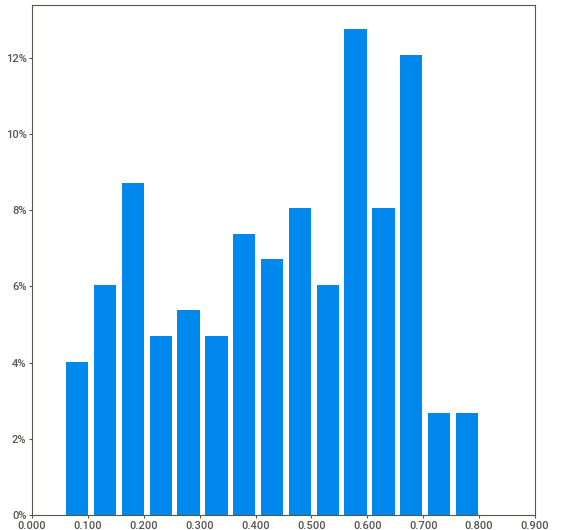
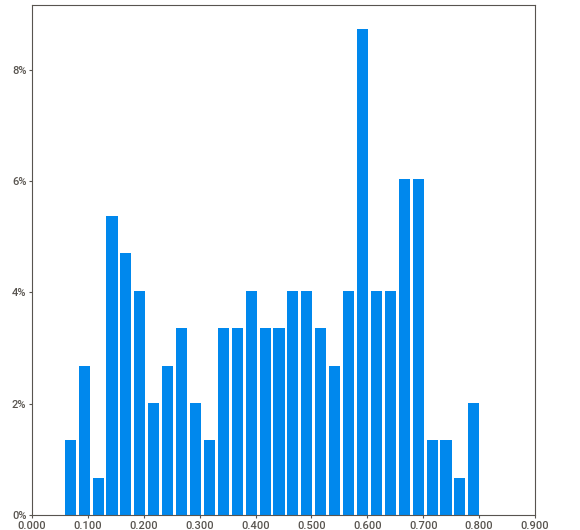
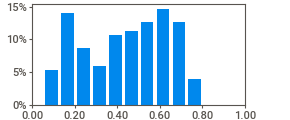
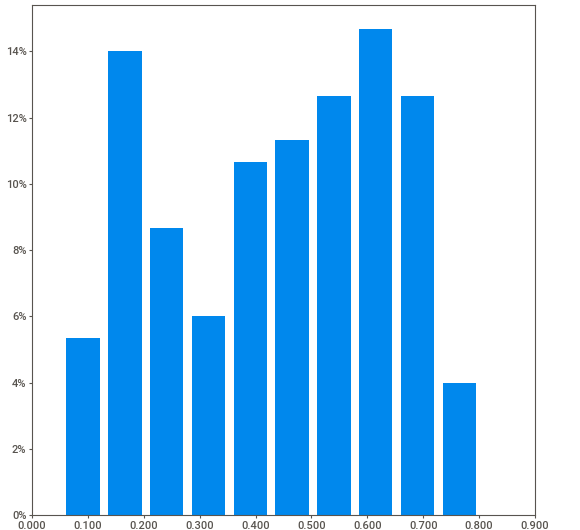
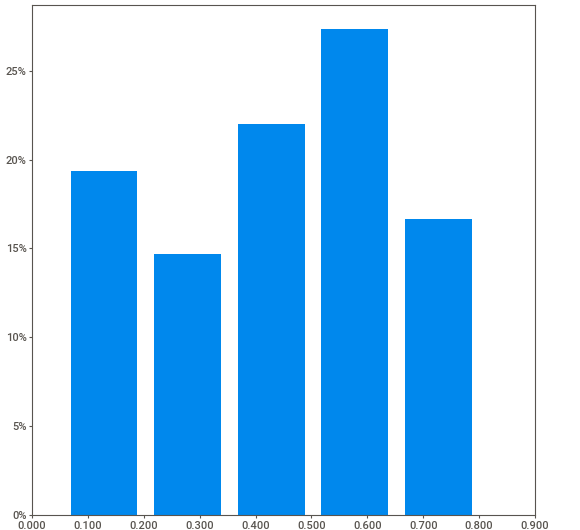
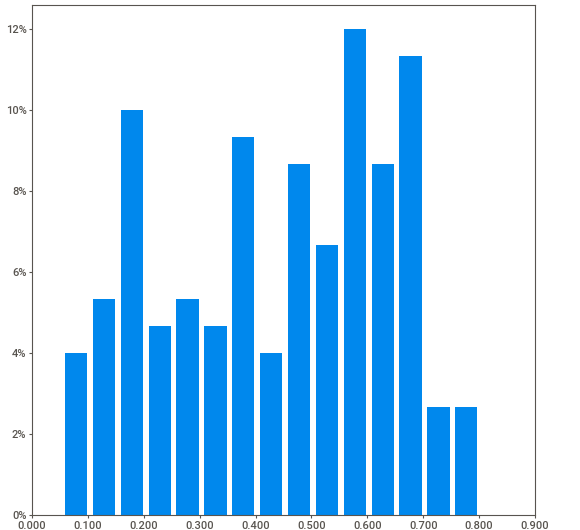
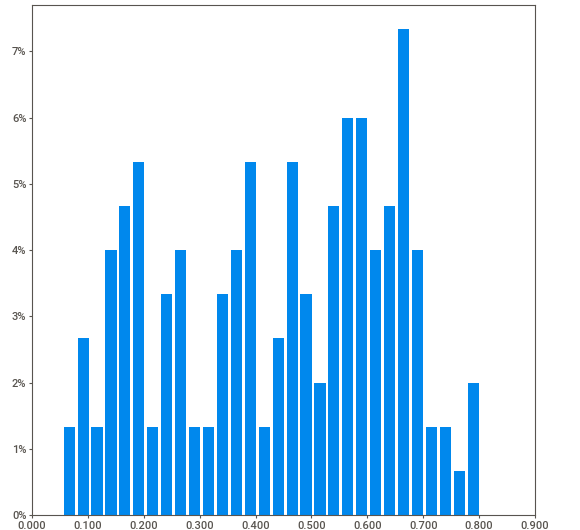
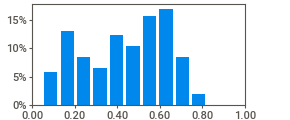
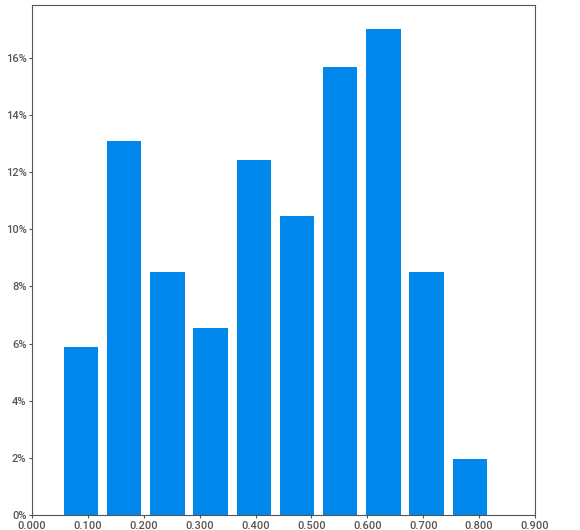
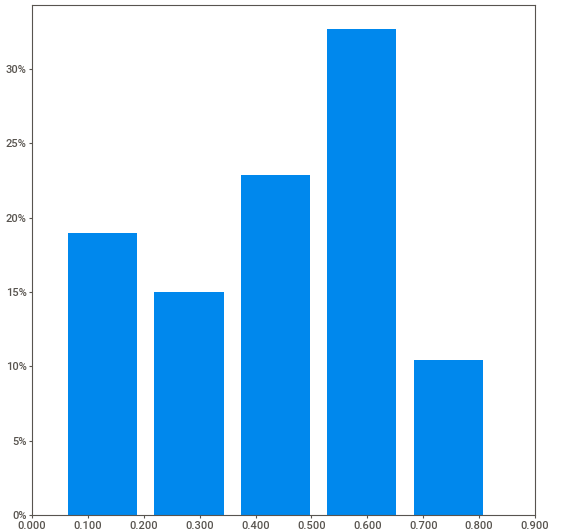
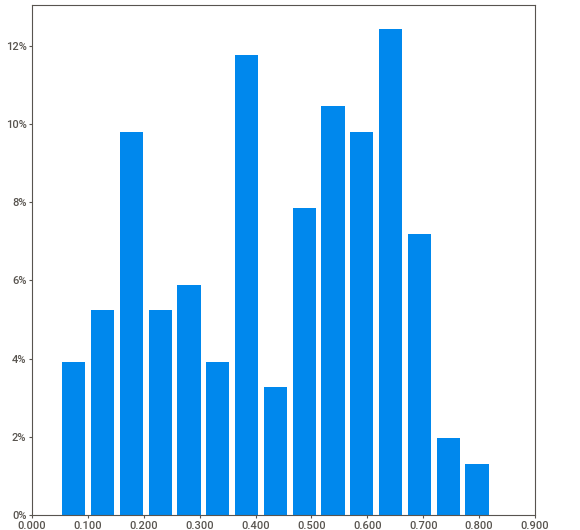
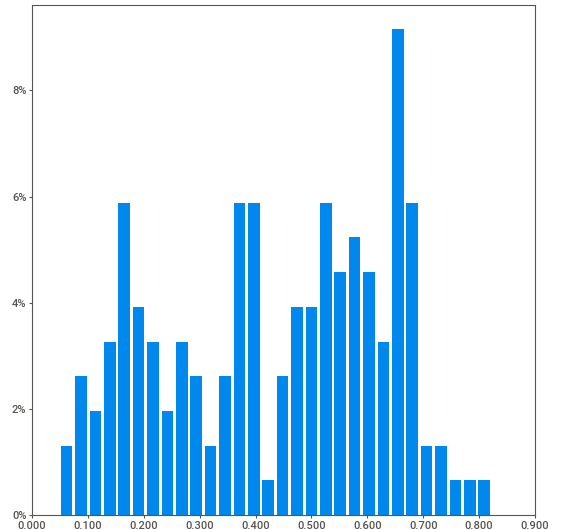
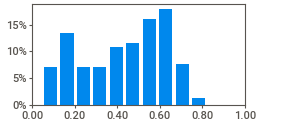
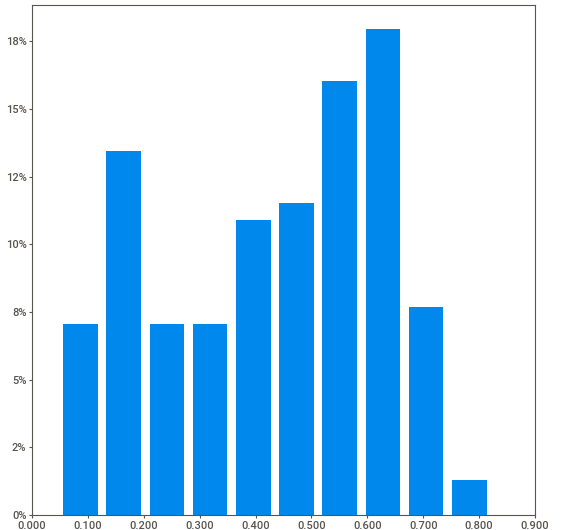
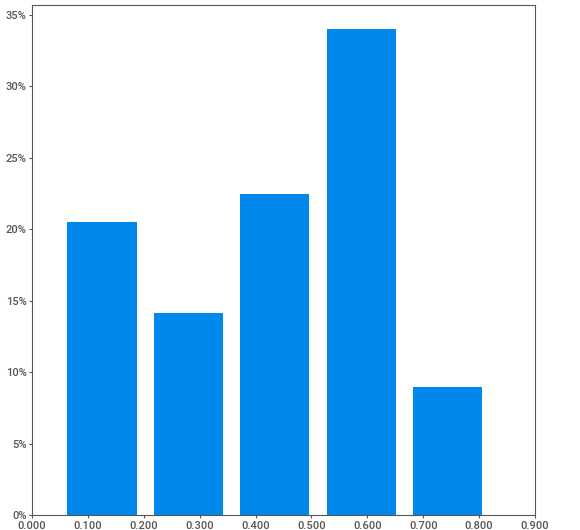
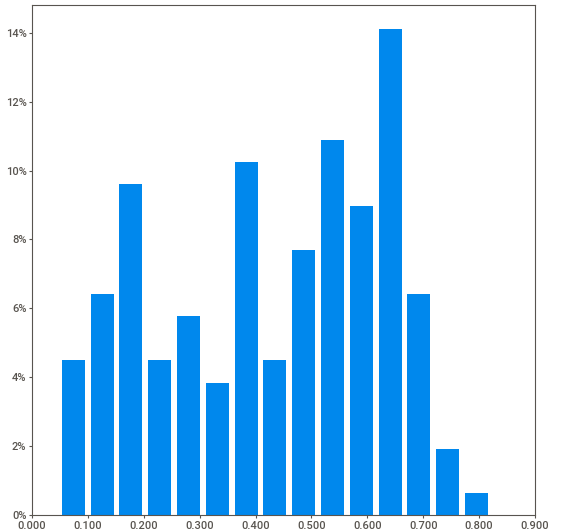
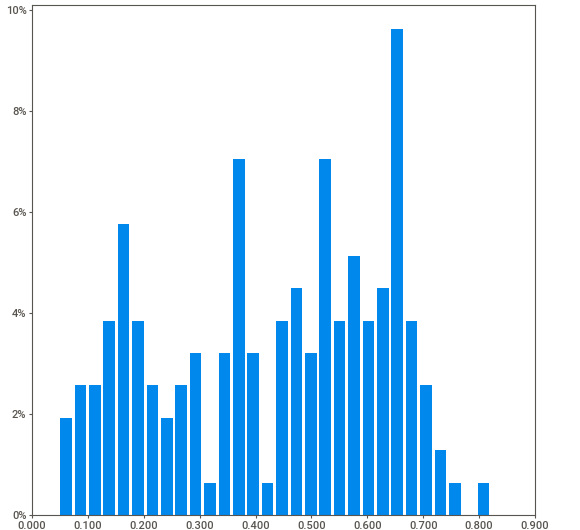
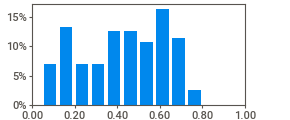
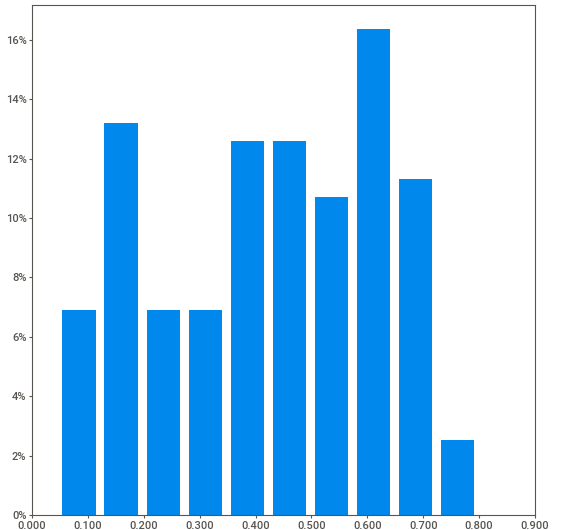
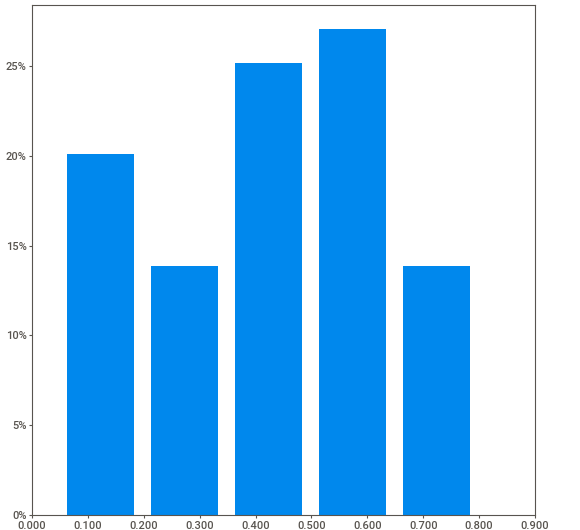
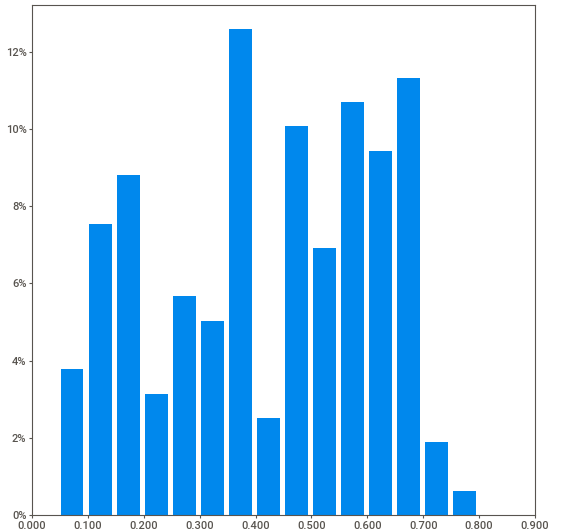
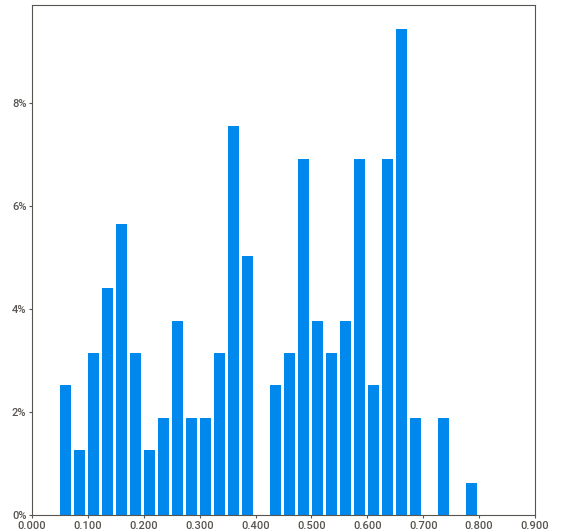
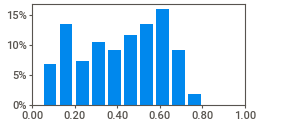
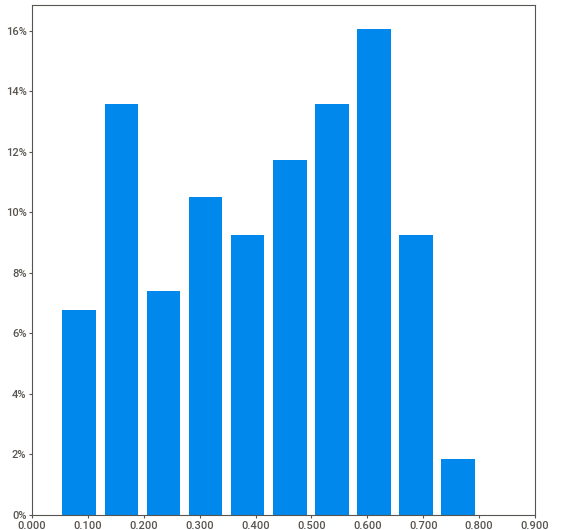
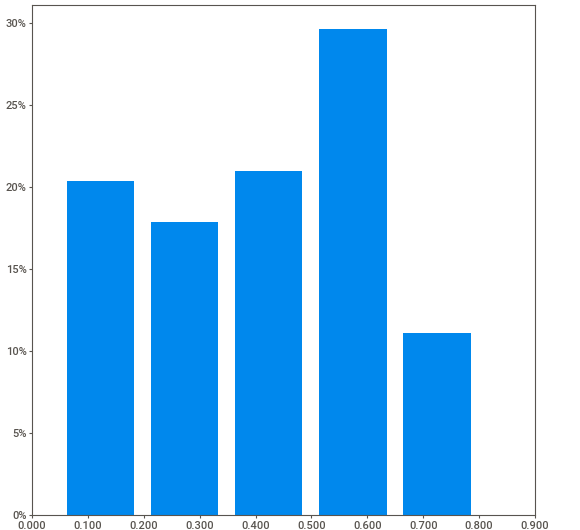
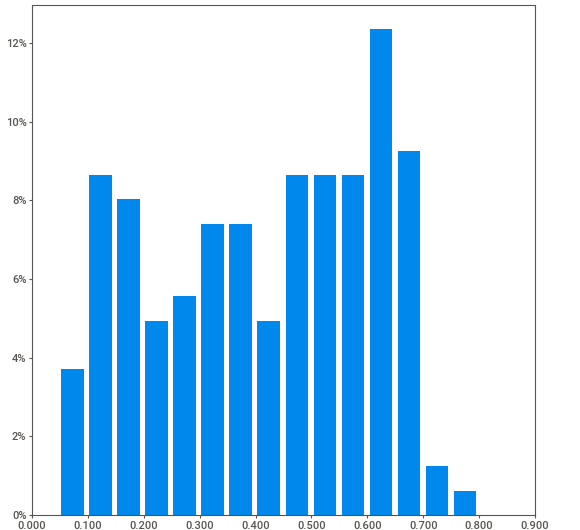
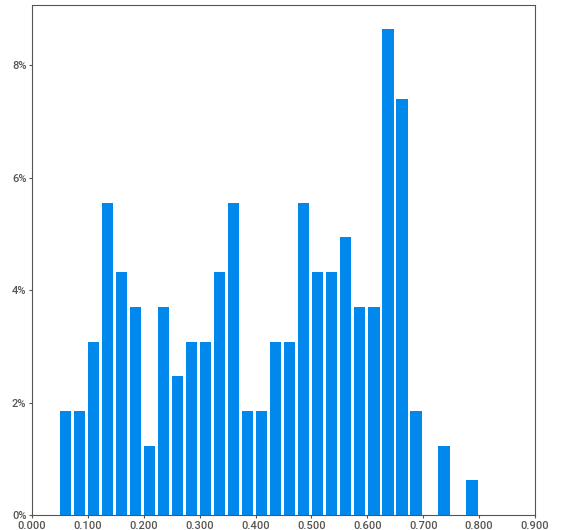
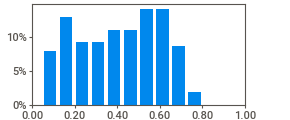
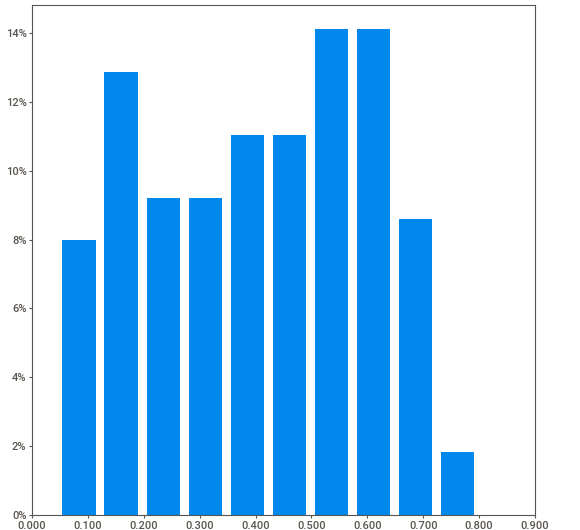
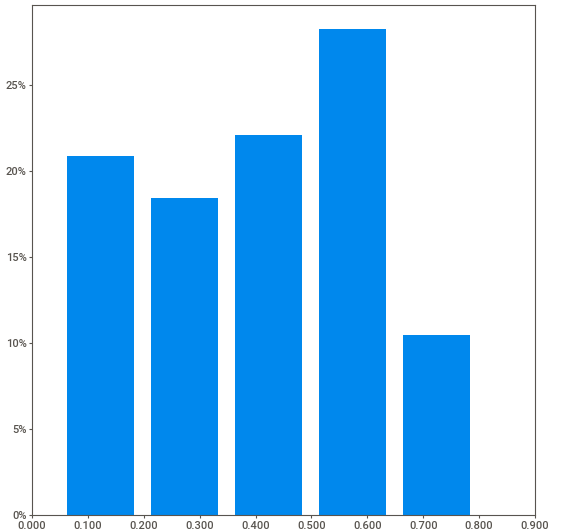
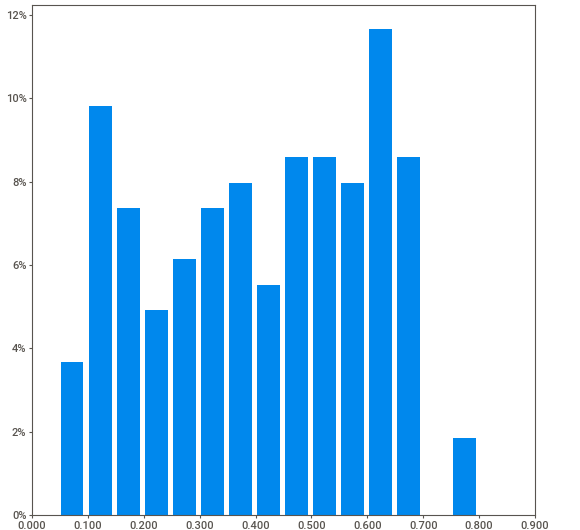
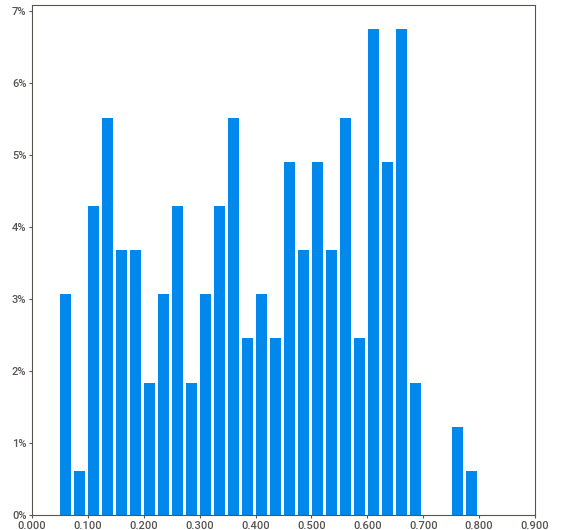
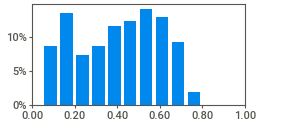
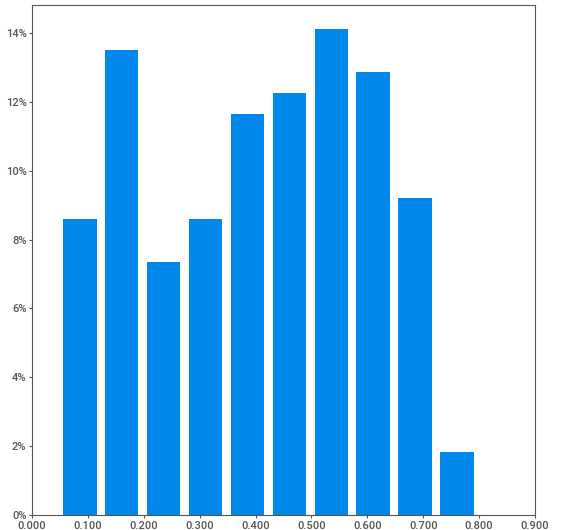
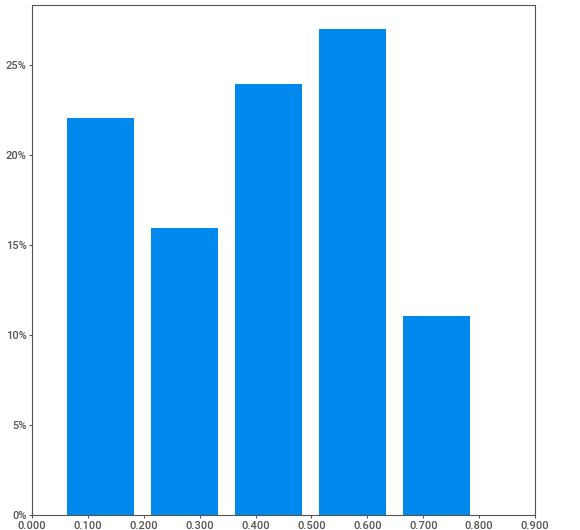
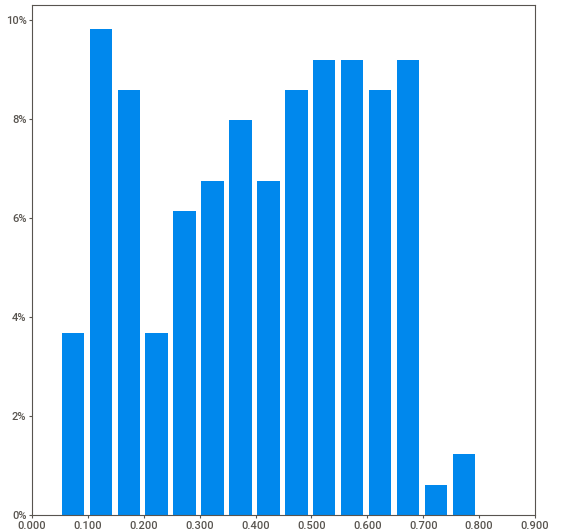
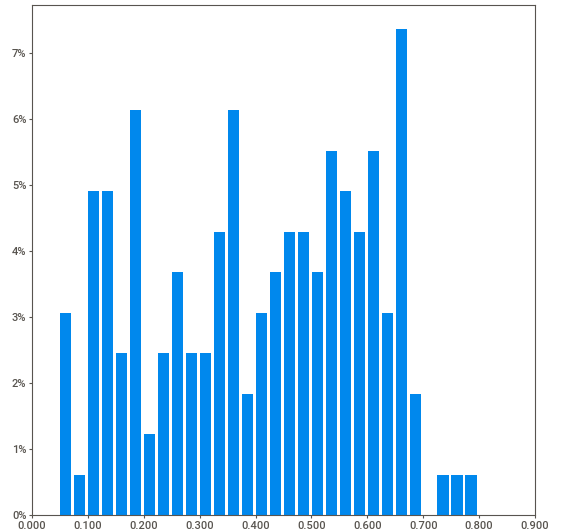
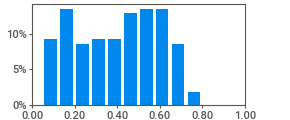
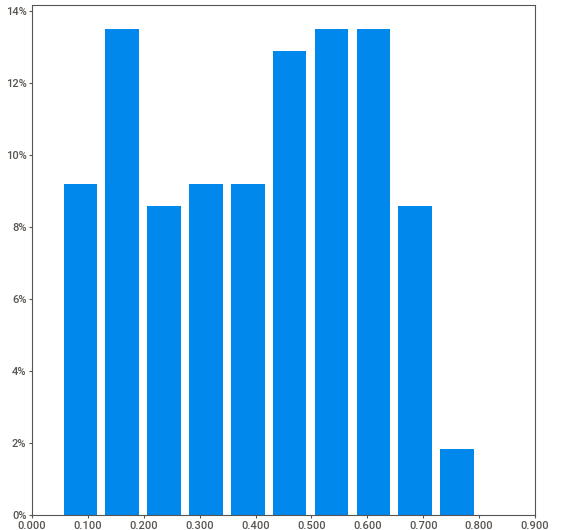
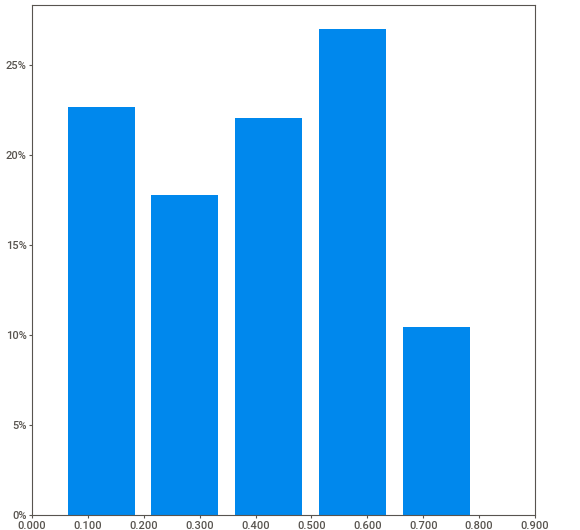
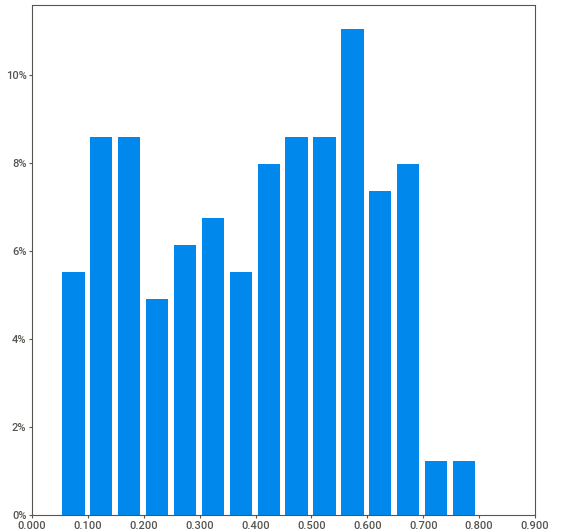
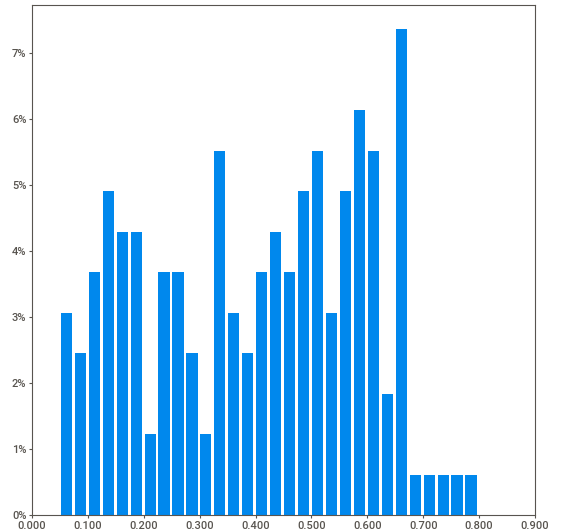
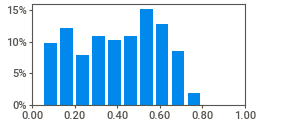
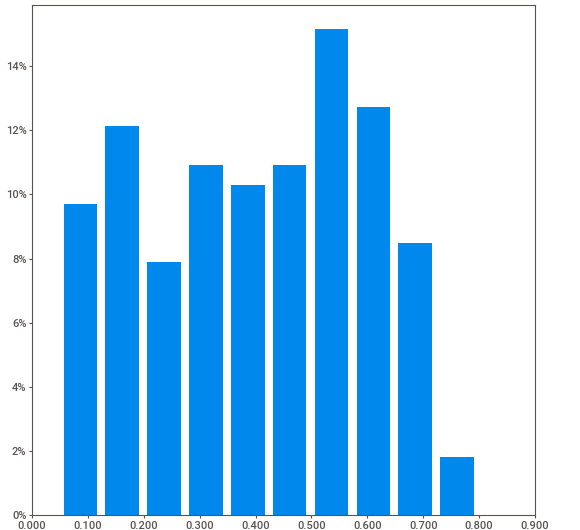
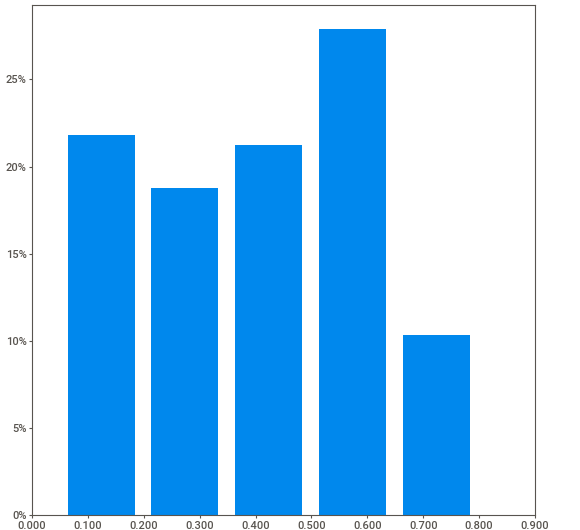
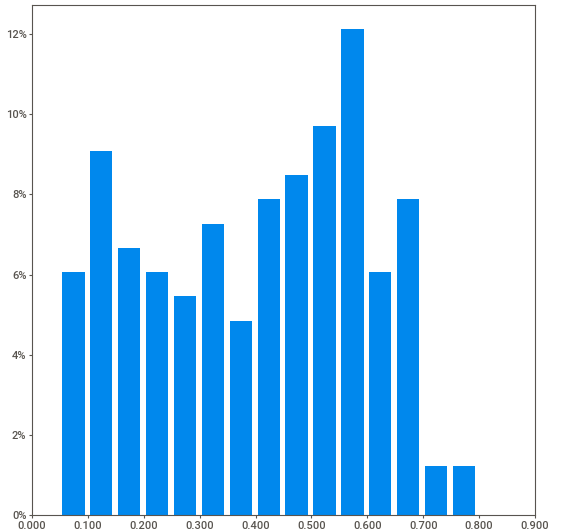
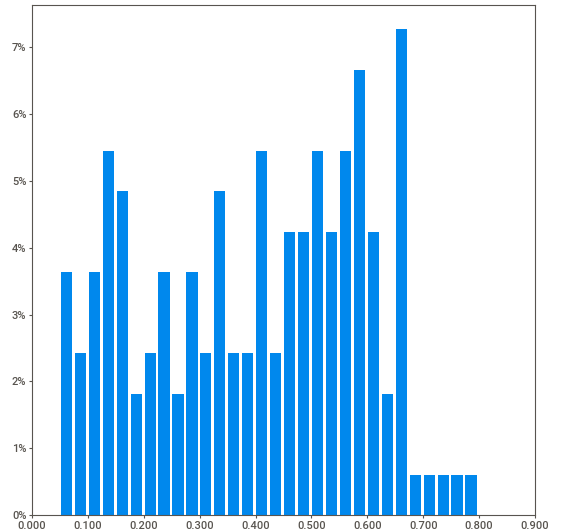
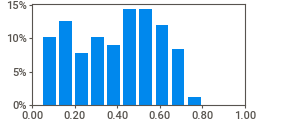
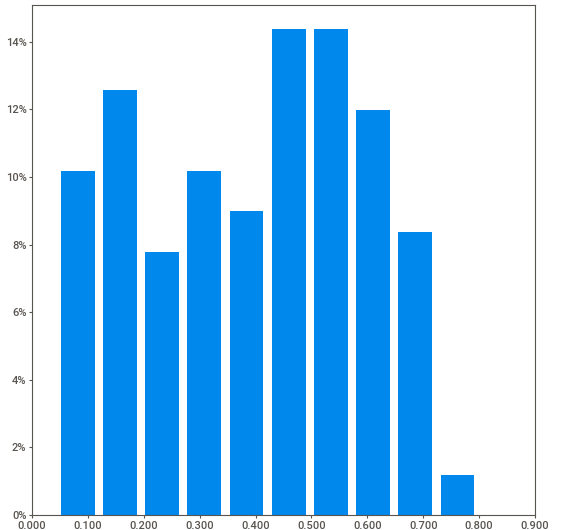
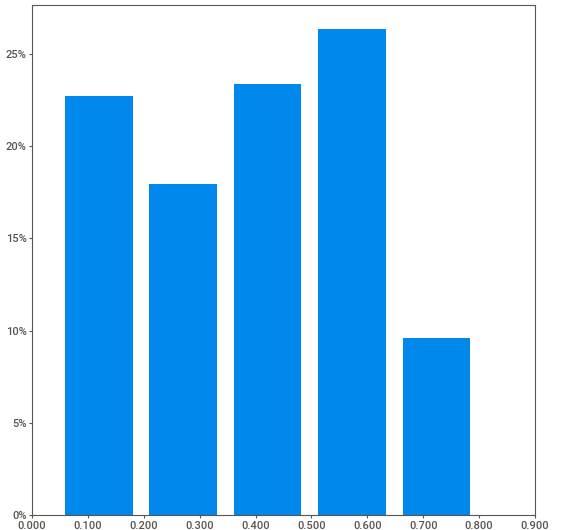
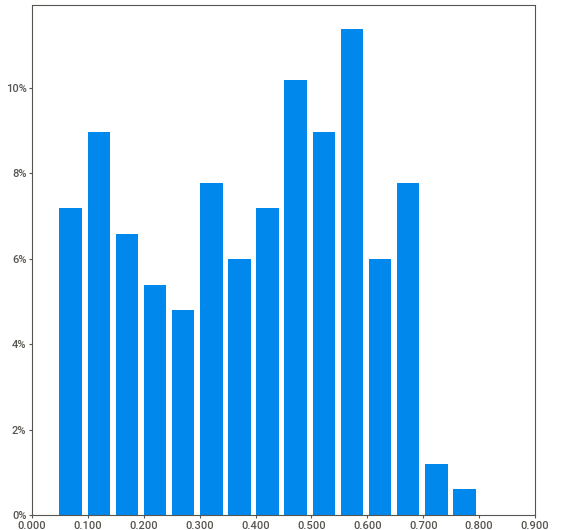
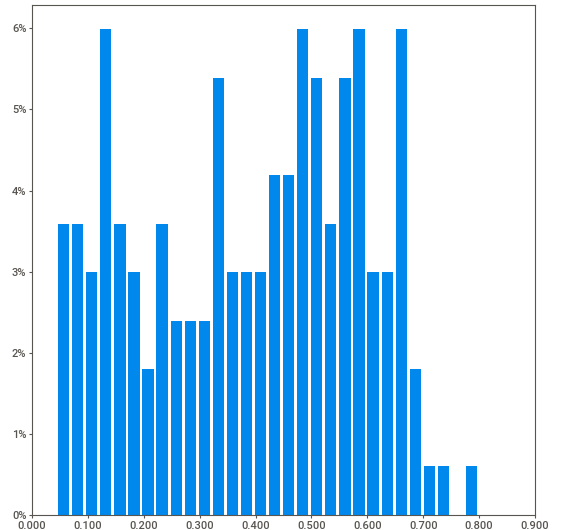
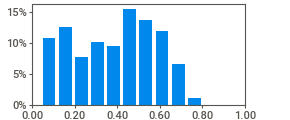
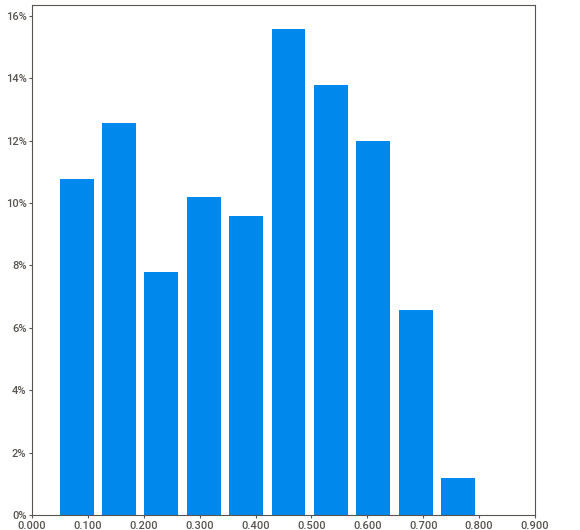
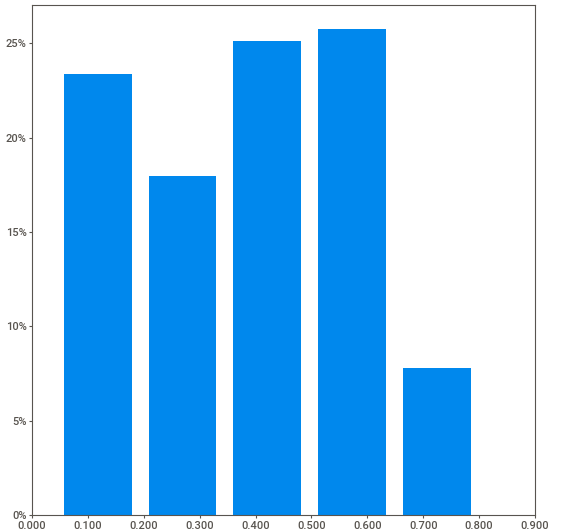
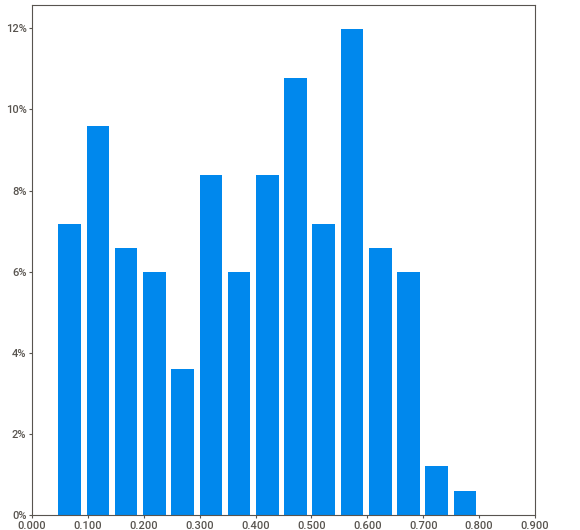
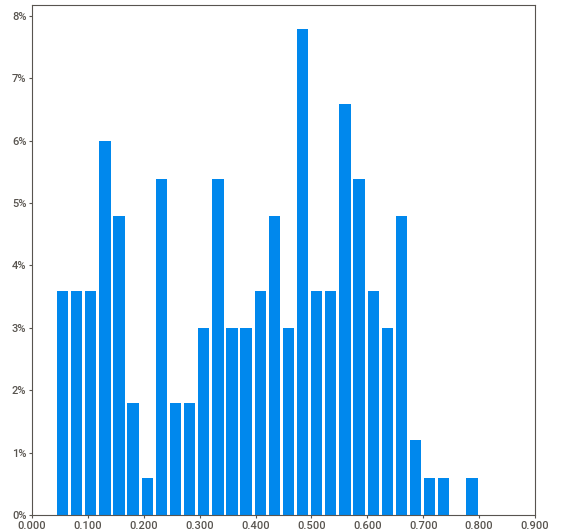
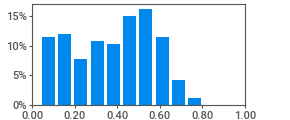
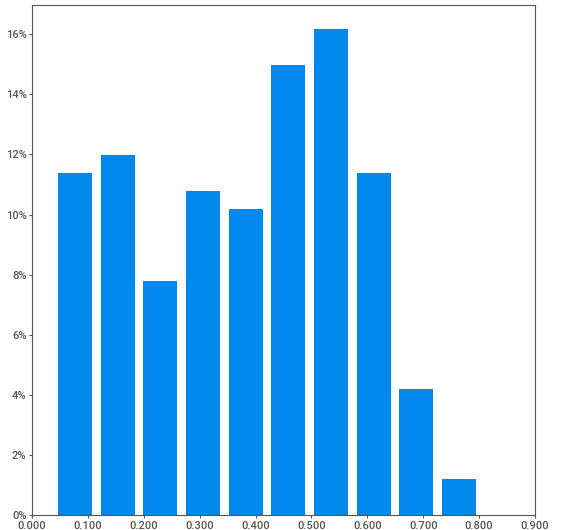
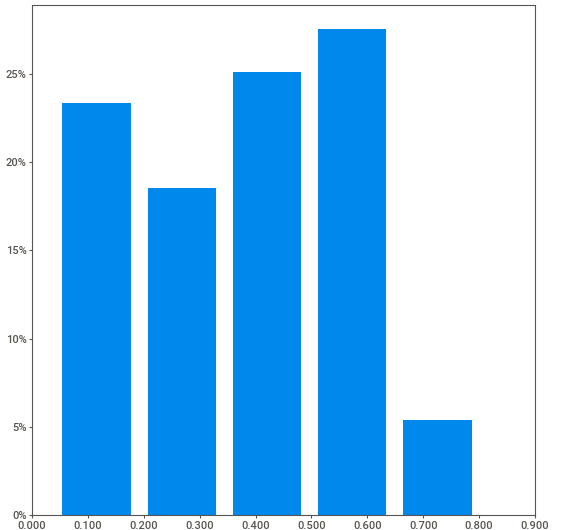
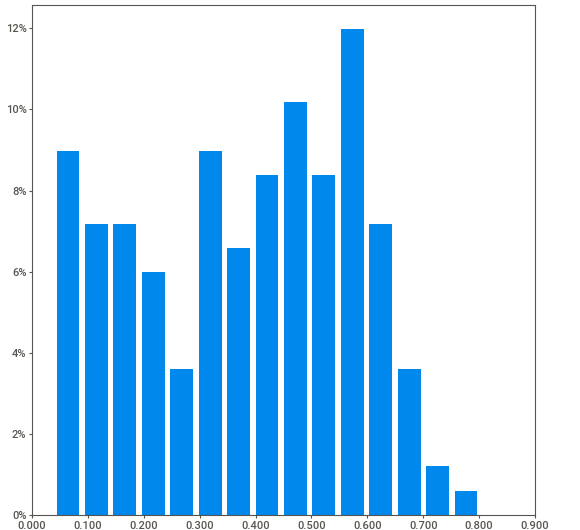
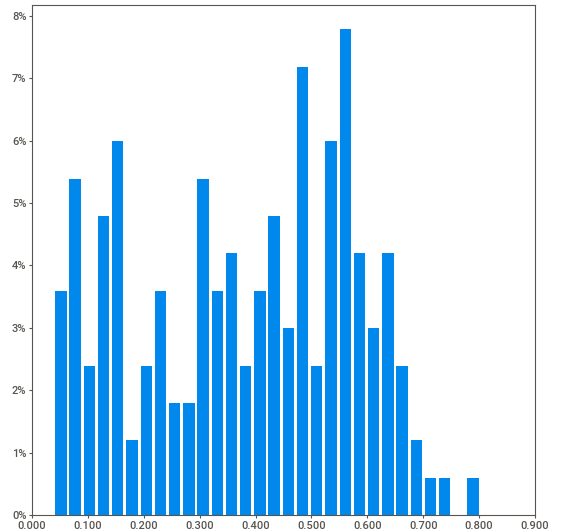
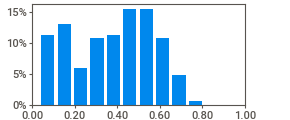
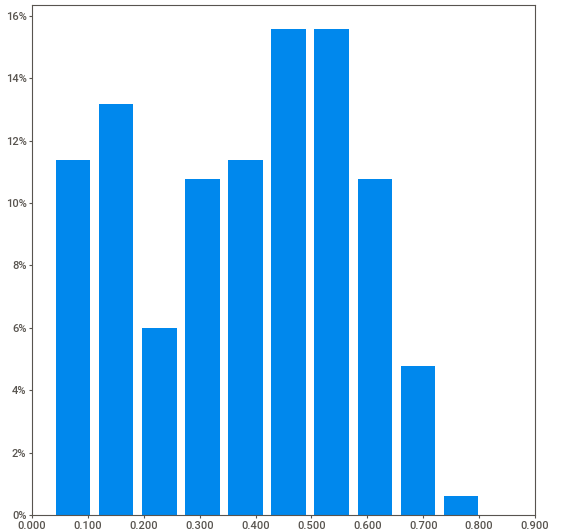
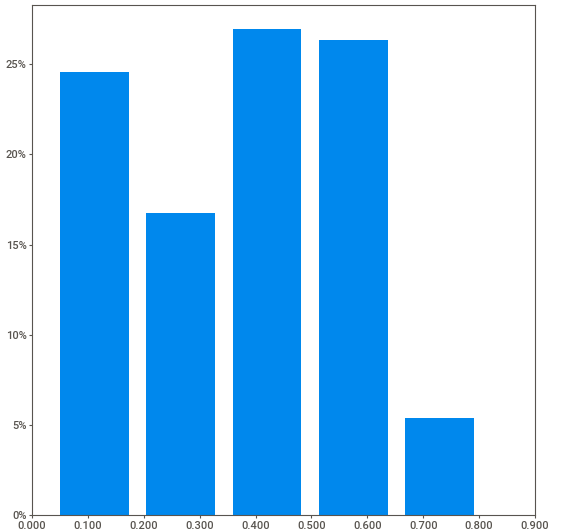
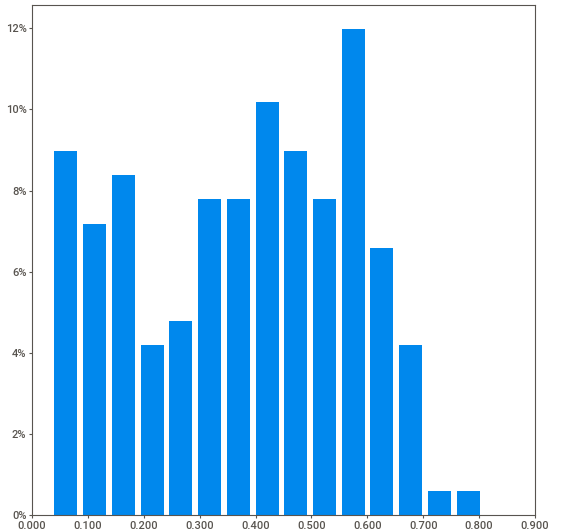
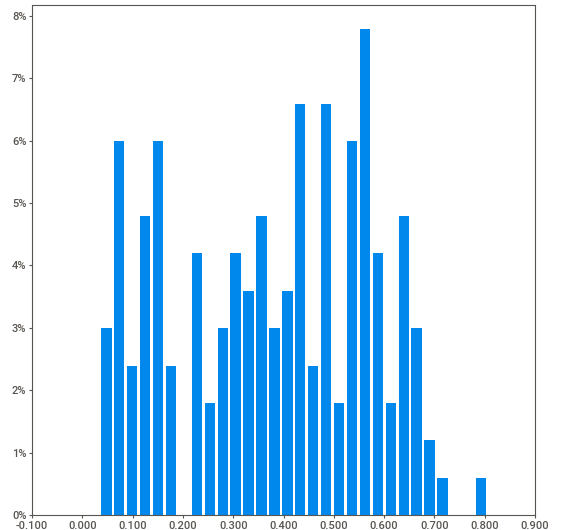
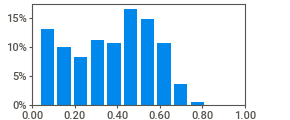
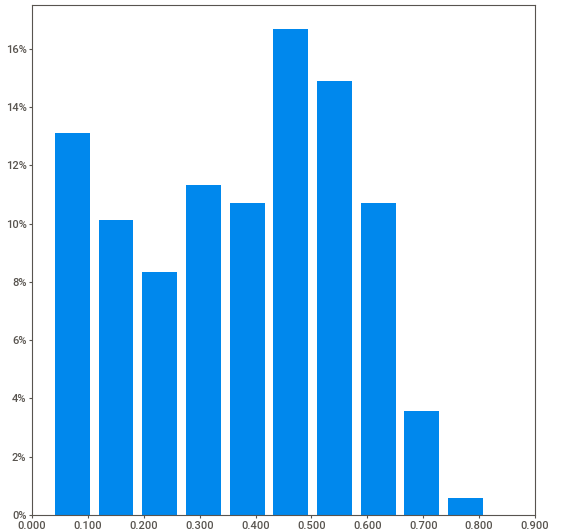
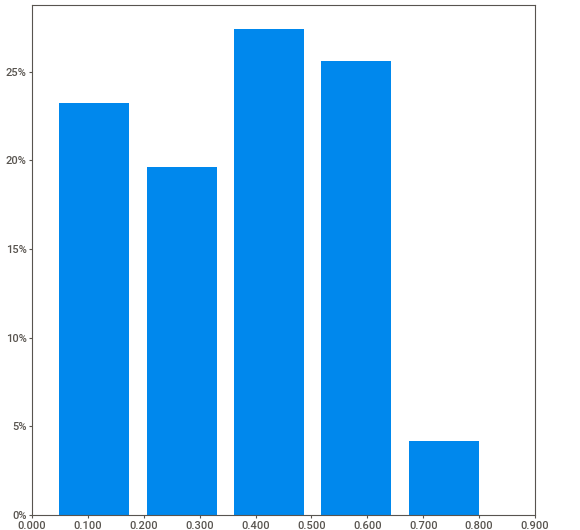
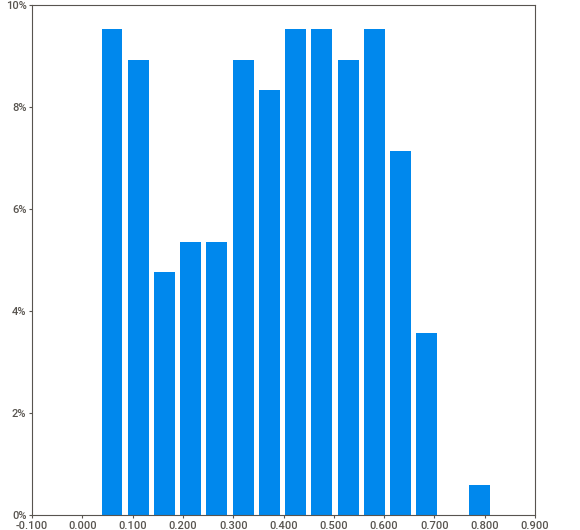
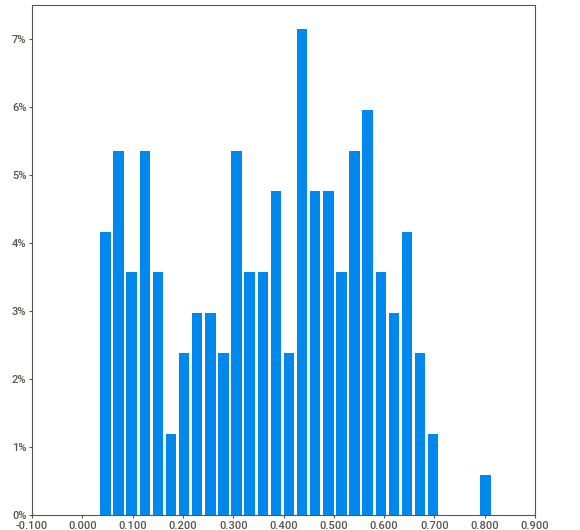
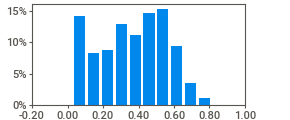
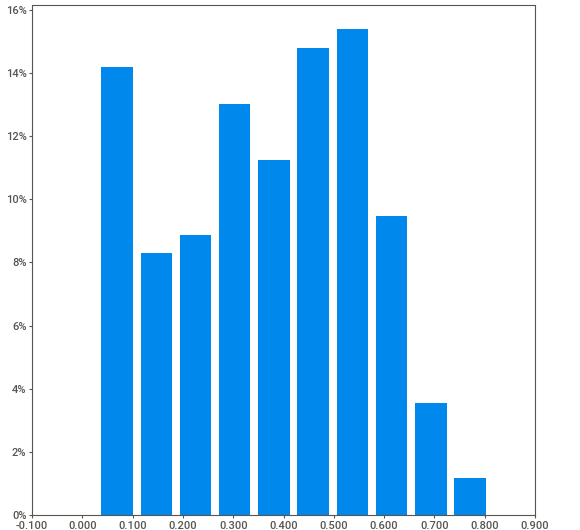
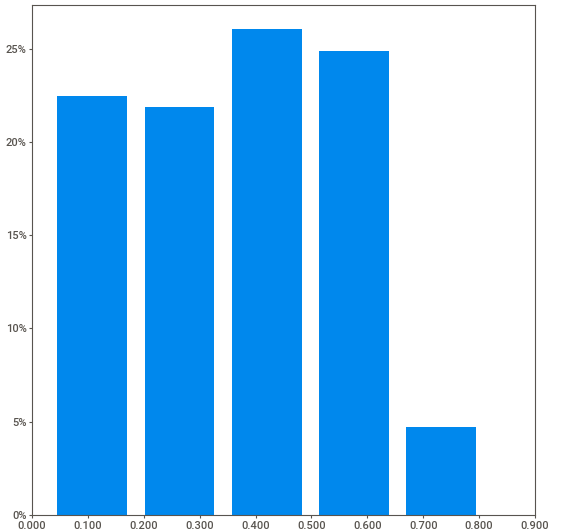
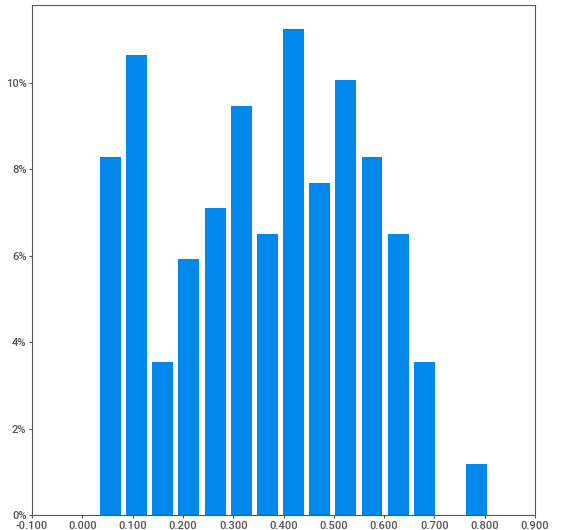
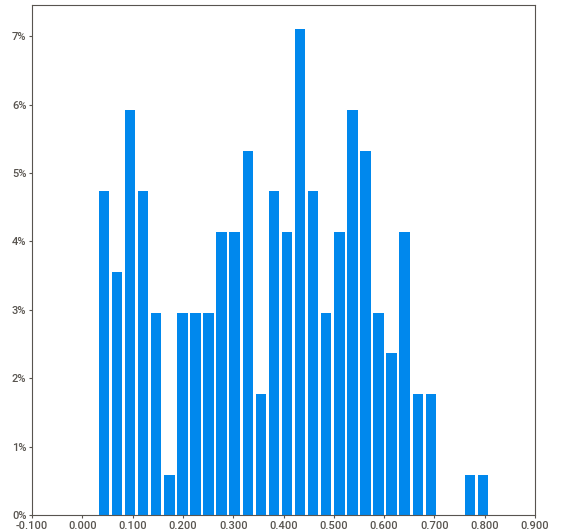
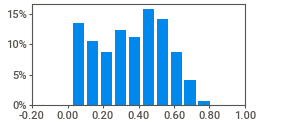
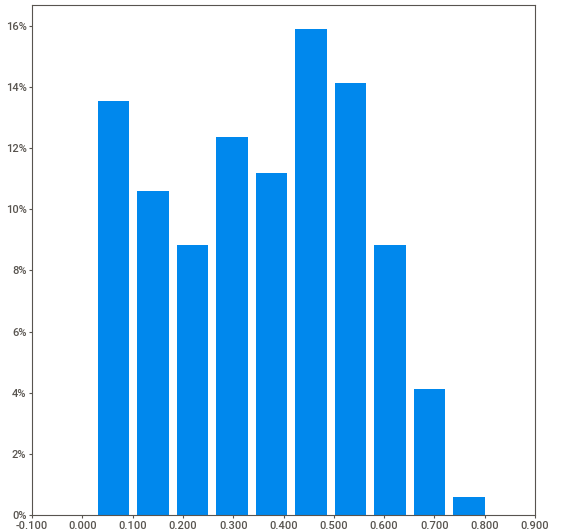
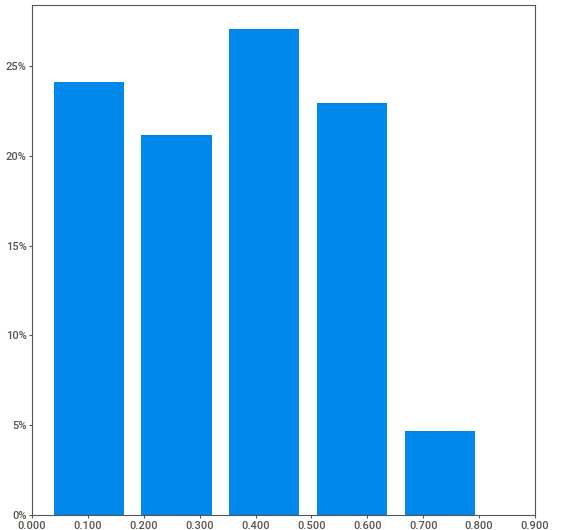
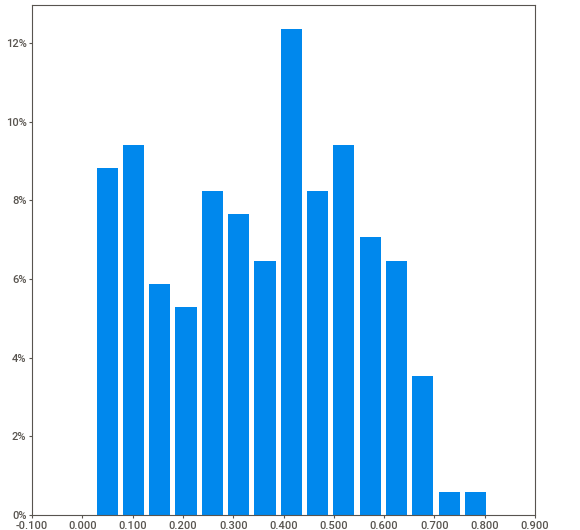
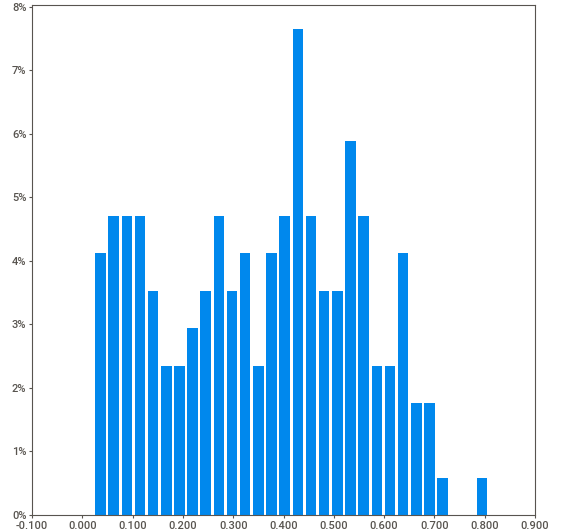
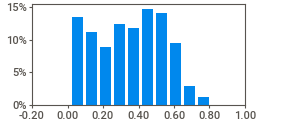
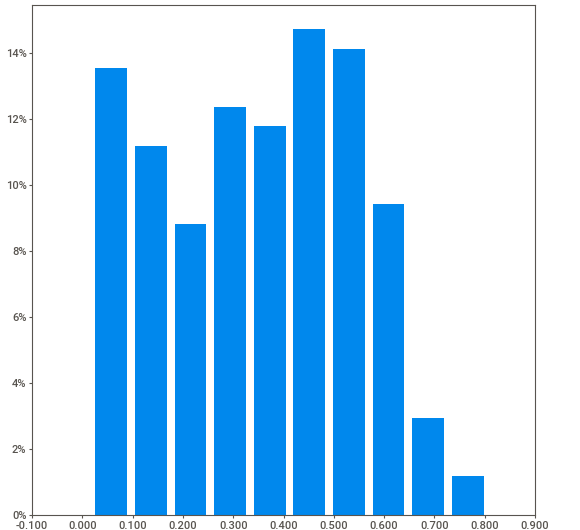
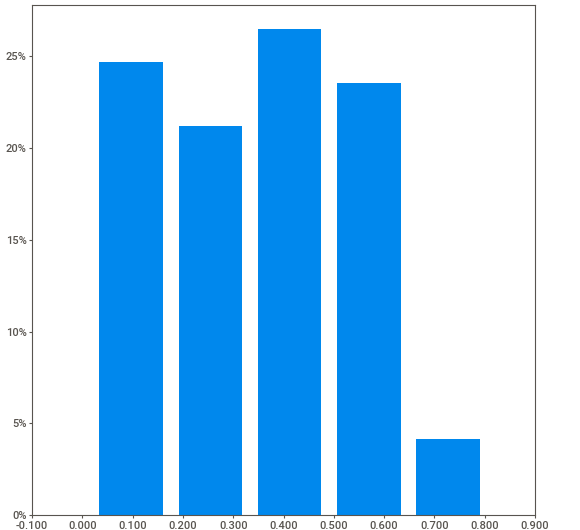
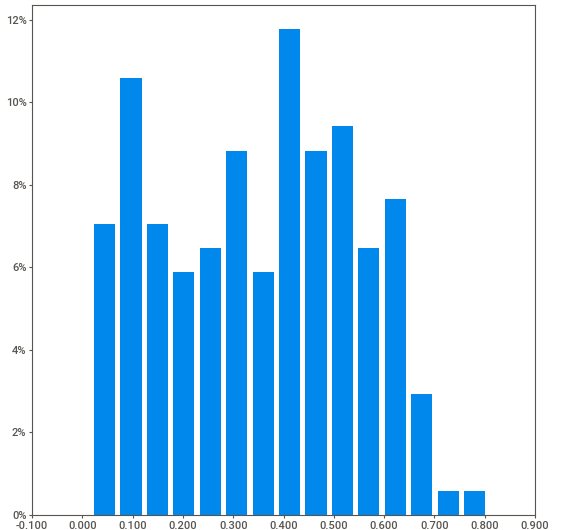
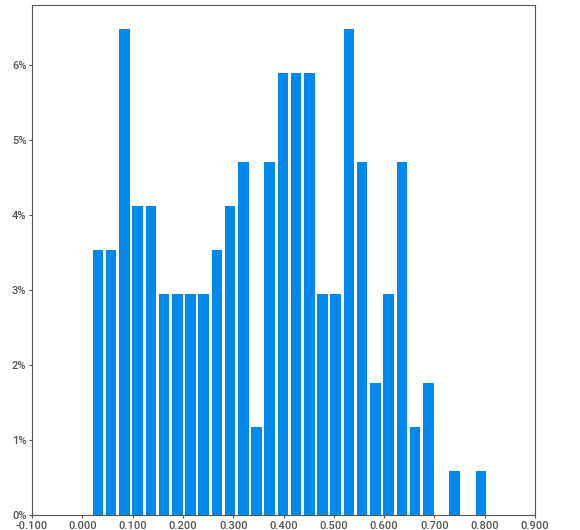
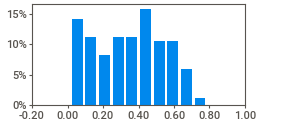
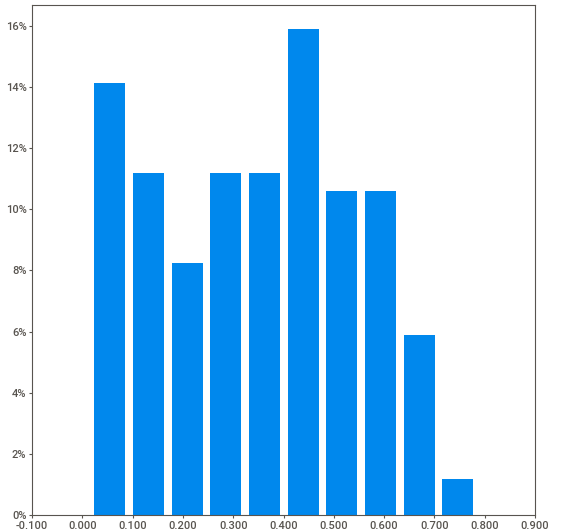
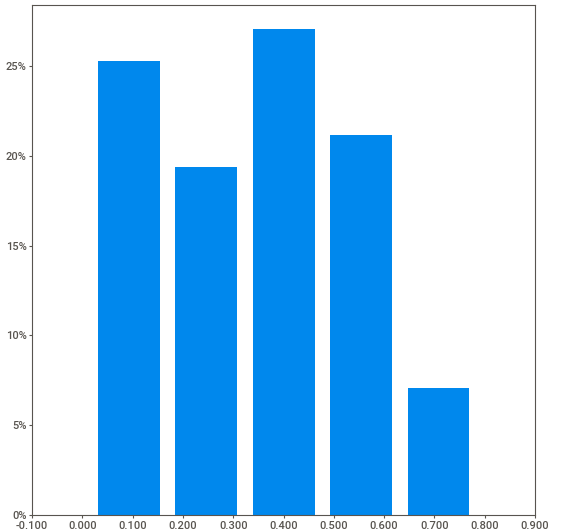
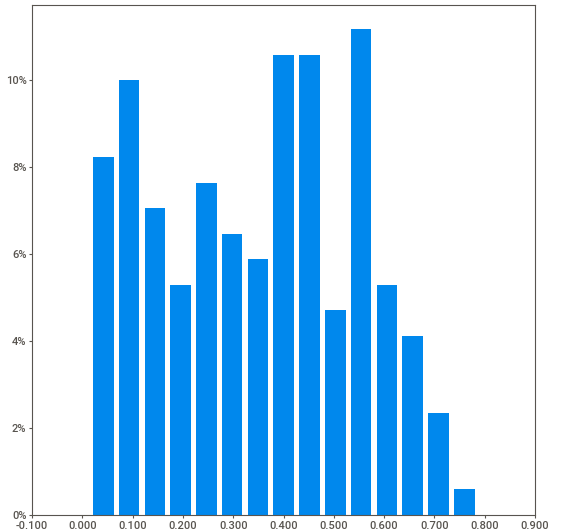
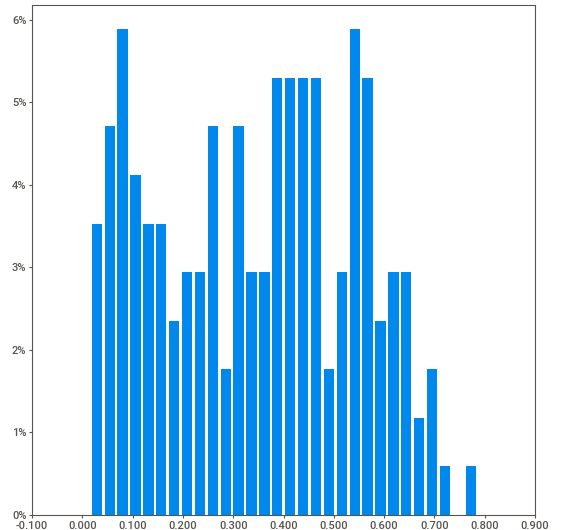
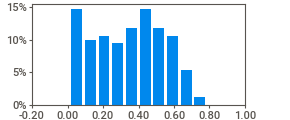
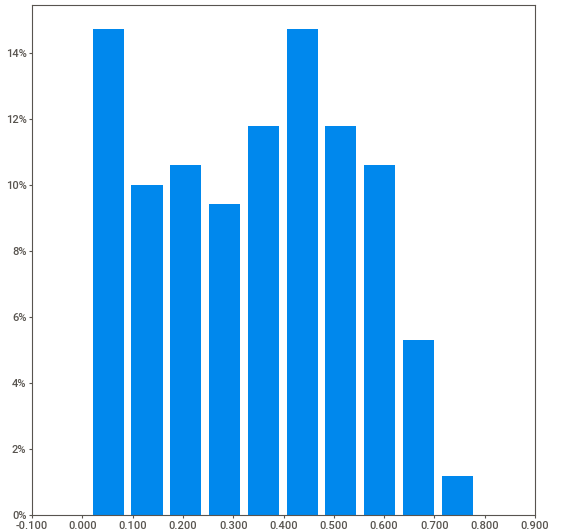
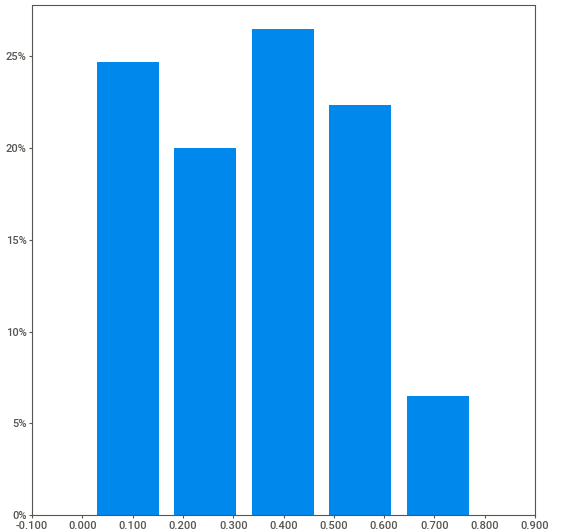
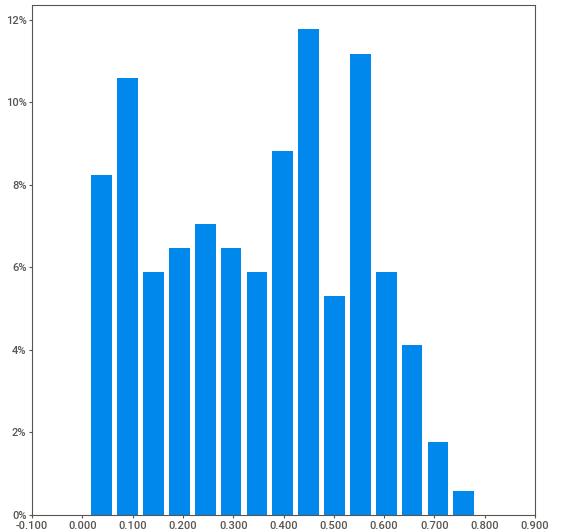
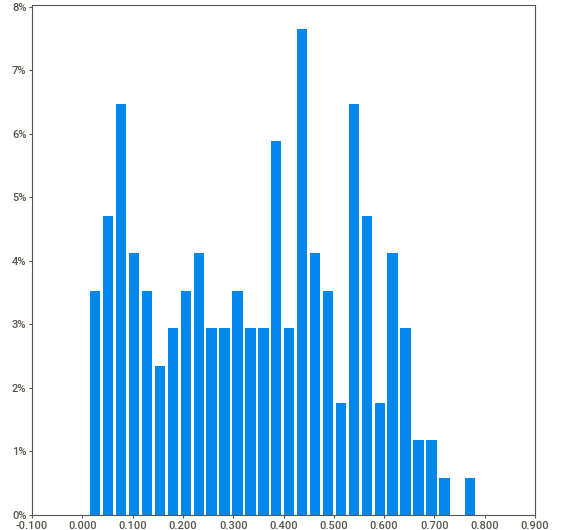
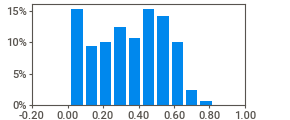
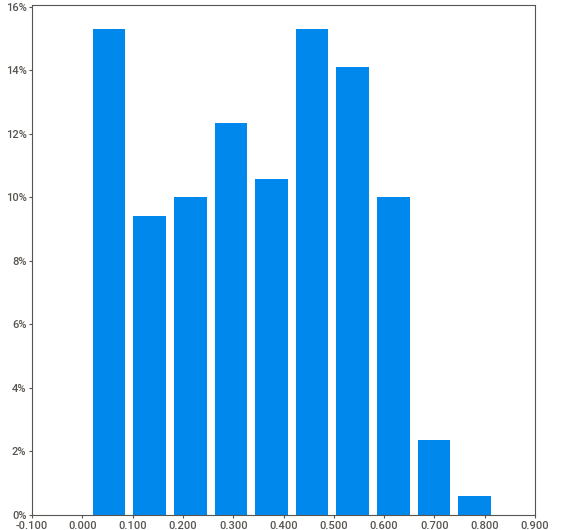
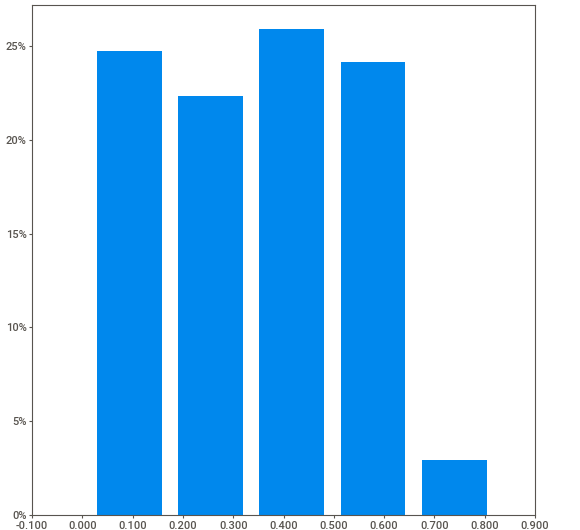
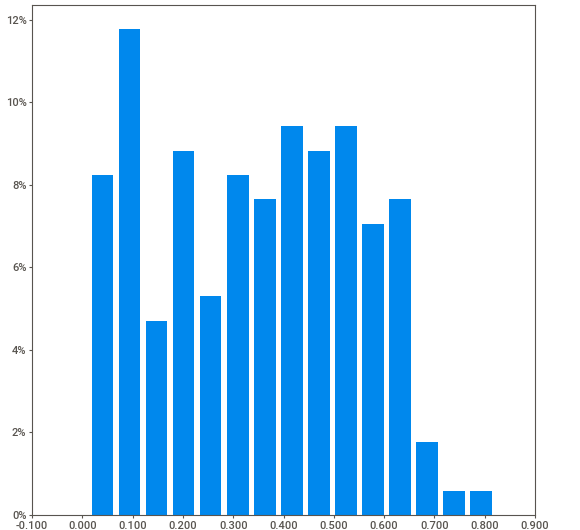
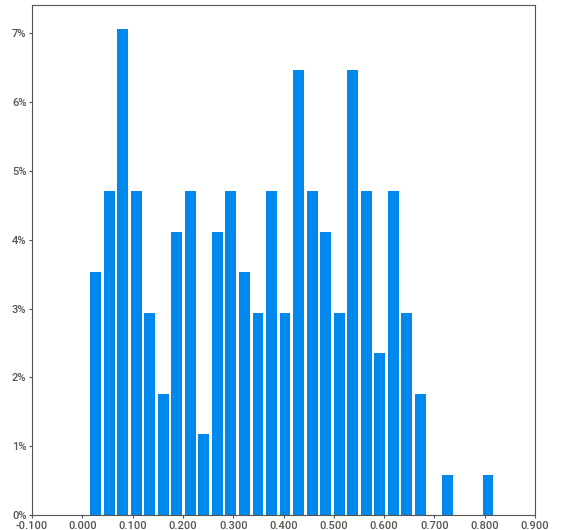
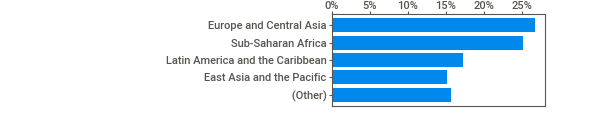
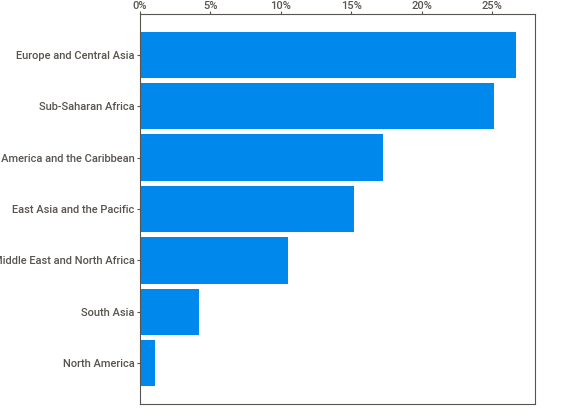
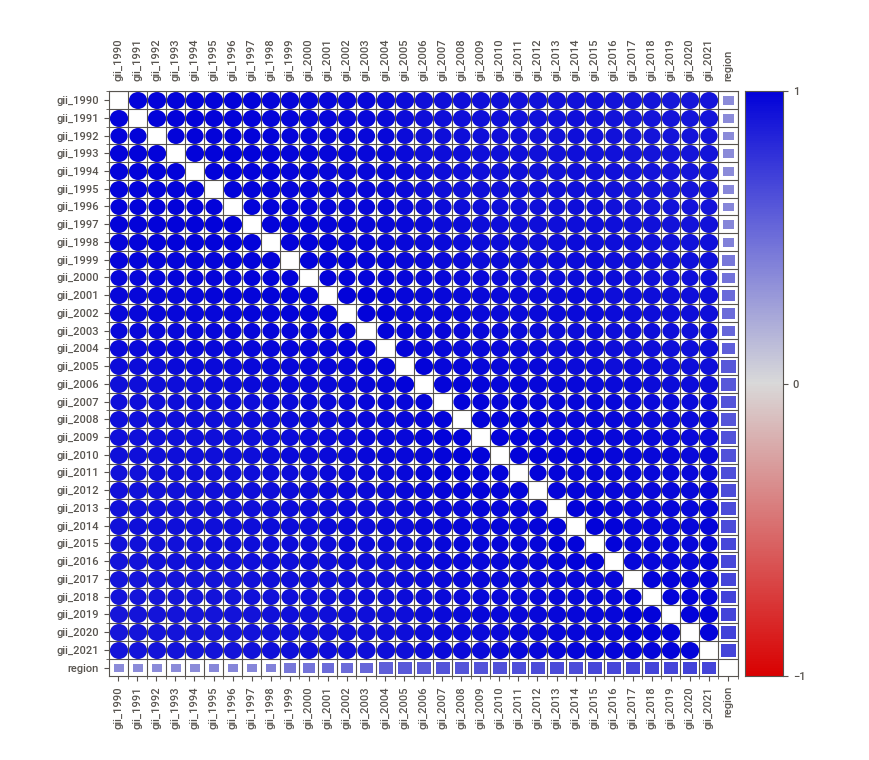
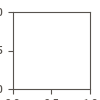

In [9]:
# Membuat report
report = sv.analyze(gii_series)

# Visualisasi report
#report.show_html()
report.show_notebook()

In [10]:
dfc = gii_series.copy()

In [11]:
# Mengubah nama kolom gii menjadi tahun saja

dfc.columns = dfc.columns.str.replace('gii_', '')

In [12]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  195 non-null    object 
 1   1990     128 non-null    float64
 2   1991     128 non-null    float64
 3   1992     128 non-null    float64
 4   1993     128 non-null    float64
 5   1994     128 non-null    float64
 6   1995     130 non-null    float64
 7   1996     130 non-null    float64
 8   1997     130 non-null    float64
 9   1998     136 non-null    float64
 10  1999     141 non-null    float64
 11  2000     144 non-null    float64
 12  2001     149 non-null    float64
 13  2002     150 non-null    float64
 14  2003     153 non-null    float64
 15  2004     156 non-null    float64
 16  2005     159 non-null    float64
 17  2006     162 non-null    float64
 18  2007     163 non-null    float64
 19  2008     163 non-null    float64
 20  2009     163 non-null    float64
 21  2010     165 non

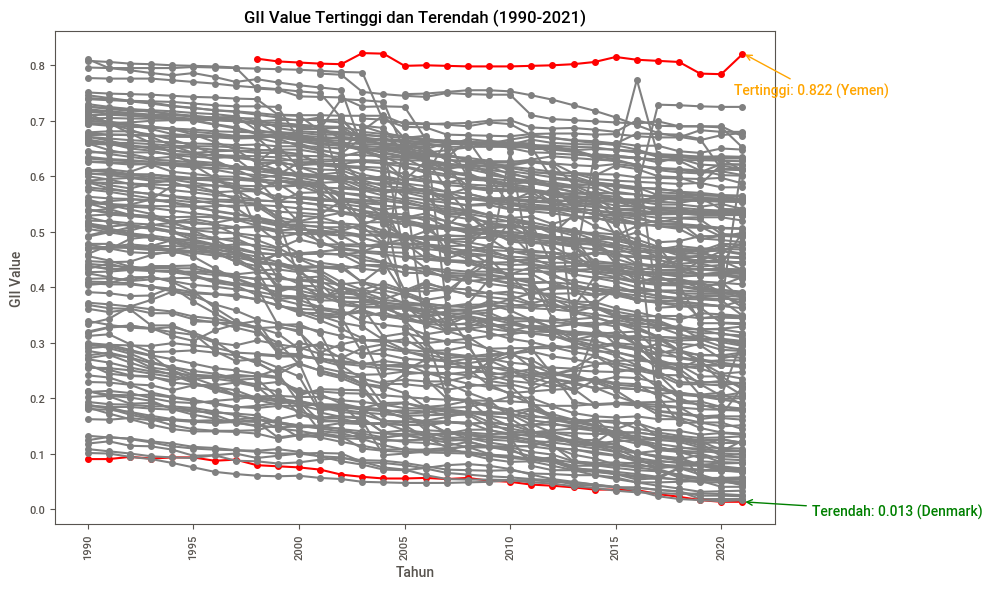

In [15]:
# Melt data frame
melted_data = pd.melt(data, id_vars=["country"], var_name="year", value_name="gii_value")
melted_data["year"] = melted_data["year"].astype(int)

# Mencari GII value tertinggi dan terendah
max_gii = melted_data["gii_value"].max()
min_gii = melted_data["gii_value"].min()

# Filter data untuk tahun 1990-2021
filtered_data = melted_data[(melted_data["year"] >= 1990) & (melted_data["year"] <= 2021)]

# Membuat line chart interaktif
fig, ax = plt.subplots(figsize=(10, 6))
for country in filtered_data["country"].unique():
    country_data = filtered_data[filtered_data["country"] == country]
    line_color = "red" if country == filtered_data.loc[filtered_data["gii_value"].idxmax(), "country"] or country == filtered_data.loc[filtered_data["gii_value"].idxmin(), "country"] else "gray"  # Warna merah untuk negara tertinggi dan terendah, abu-abu untuk negara lainnya
    ax.plot(country_data["year"], country_data["gii_value"], label=country, marker="o", markersize=4, color=line_color)

# Menandai GII value tertinggi dan terendah
max_country = filtered_data.loc[filtered_data["gii_value"].idxmax(), "country"]
min_country = filtered_data.loc[filtered_data["gii_value"].idxmin(), "country"]
ax.annotate(f"Tertinggi: {max_gii} ({max_country})", xy=(filtered_data["year"].iloc[-1], max_gii), xytext=(50, -30),
             textcoords="offset points", arrowprops=dict(arrowstyle="->", color="orange"), color="orange", ha="center")
ax.annotate(f"Terendah: {min_gii} ({min_country})", xy=(filtered_data["year"].iloc[-1], min_gii), xytext=(50, -10),
             textcoords="offset points", arrowprops=dict(arrowstyle="->", color="green"), color="green")

# Mengatur label dan judul
ax.set_xlabel("Tahun")
ax.set_ylabel("GII Value")
ax.set_title("GII Value Tertinggi dan Terendah (1990-2021)")

plt.xticks(rotation=90)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca

plt.tight_layout()  # Mengatur tata letak plot

# Menampilkan grafik
plt.show()

Berdasarkan plot diatas, dapat ditarik insight bahwa sepanjang tahun 1990 sampai 2021 secara garis besar Denmark menempati urutan negara dengan nilai GII paling rendah. Hal ini menunjukkan bahwa Denmark memiliki tingkat ketimpangan/kesenjangan yang sangat rendah anar gender ketimbang negara-negara lain di dunia.

Namun dapat dilihat juga di grafik tersebut, bahwa Yemen dari tahun 1998 sampai 2021, selalu memegang urutan pertama dalam nilai gii paling besar. Hal ini memnunjukkan bahwa Yemen memiliki ketimpangan antar gender, dimana salah satu gender memiliki 'privilege' sedangkan gender lainnya tidak karena kesempatan yang dimiliki antar gender tidak 'fair'. 

Nilai GII mencerminkan ketimpangan berbasis gender dalam tiga dimensi yaitu: kesehatan reproduksi, pemberdayaan, dan pasar tenaga kerja.

In [16]:
# Mengambil kolom 'country' dan kolom tahun dari 1990 sampai 2021
years = [str(year) for year in range(1990, 2022)]
df_subset = dfc[['country'] + years]

# Membentuk dataframe yang berisi tahun, negara, dan nilai GII tertinggi
df_line = pd.DataFrame(columns=['year', 'country', 'GII'])

# Looping untuk mencari negara dengan nilai GII tertinggi di setiap tahun
for year in years:
    max_country = df_subset[['country', year]].loc[df_subset[year].idxmax()]
    df_line = df_line.append({'year': int(year), 'country': max_country['country'], 'GII': max_country[year]},
                             ignore_index=True)

# Mengurutkan dataframe berdasarkan tahun
df_line = df_line.sort_values('year')

# Menambahkan kolom persentase penurunan atau peningkatan GII tiap tahun
df_line['Percentage Change'] = df_line['GII'].pct_change() * 100

# Plot line chart
fig = px.line(df_line, x='year', y='GII', color='country', title='Negara dengan Nilai GII Tertinggi Setiap Tahun',
              labels={'year': 'Tahun', 'GII': 'Nilai GII'})
fig.update_traces(mode='lines+markers')

# Menampilkan persentase penurunan atau peningkatan GII di setiap tahun
annotations = []
for i in range(1, len(df_line)):
    change = df_line.loc[i, 'Percentage Change']
    color = 'green' if change < 0 else 'red'
    annotations.append(dict(x=df_line.loc[i, 'year'], y=df_line.loc[i, 'GII'],
                            text=f'{change:.2f}%', showarrow=True, arrowhead=1, ax=-30, ay=-40,
                            font=dict(color=color)))

fig.update_layout(annotations=annotations)

# Menampilkan plot
fig.show()


Dapat ditarik kesimpulan bahwa dari tahun 1998 sampai 2021, Yemen merupakan negara yang terus memiliki Gender Inequality Index paling tinggi dan terdapat kenaikan yang sangat dratis dari tahun 2020 ke 2021, sebesar 4.59%. Yang mana nilai GII Yemen pada tahun 2020 sebesar 0.78 meningkat menjadi 0.82. Hal ini menunjukkan bahwa Yemen merupakan negara yang sangat tinggi ketimpangan antar gendernya, mengingat angka paling tinggi adalah 1. Angka ini sangat jauh dibandingkan dengan negara-negara lain.

In [18]:
# Mengambil kolom 'country' dan kolom tahun dari 1990 sampai 2021
years = [str(year) for year in range(1990, 2022)]
df_subset = dfc[['country'] + years]

# Membentuk dataframe yang berisi tahun, negara, dan nilai GII terendah
df_line = pd.DataFrame(columns=['year', 'country', 'GII'])

# Looping untuk mencari negara dengan nilai GII terendah di setiap tahun
for year in years:
    min_country = df_subset[['country', year]].loc[df_subset[year].idxmin()]
    df_line = df_line.append({'year': int(year), 'country': min_country['country'], 'GII': min_country[year]},
                             ignore_index=True)

# Mengurutkan dataframe berdasarkan tahun
df_line = df_line.sort_values('year')

# Menambahkan kolom persentase penurunan atau peningkatan GII tiap tahun
df_line['Percentage Change'] = df_line['GII'].pct_change() * 100

# Plot line chart
fig = go.Figure()

for country in df_line['country'].unique():
    country_data = df_line[df_line['country'] == country]
    fig.add_trace(go.Scatter(x=country_data['year'], y=country_data['GII'], mode='markers+lines', name=country))

# Menampilkan persentase penurunan atau peningkatan GII di setiap tahun
annotations = []
for i in range(1, len(df_line)):
    change = df_line.loc[i, 'Percentage Change']
    color = 'green' if change < 0 else 'red'
    annotations.append(dict(x=df_line.loc[i, 'year'], y=df_line.loc[i, 'GII'],
                            text=f'{change:.2f}%', showarrow=True, arrowhead=1, ax=-30, ay=-40,
                            font=dict(color=color)))

fig.update_layout(
    title='Negara dengan Nilai GII Terendah Setiap Tahun',
    xaxis=dict(title='Tahun'),
    yaxis=dict(title='Nilai GII'),
    annotations=annotations
)

# Menampilkan plot
fig.show()

Dapat ditarik beberapa insight:
- Norwegia menjadi negara dengan nilai GII paling rendah di tahun 2017 dan 2018, yang mana mengalami penurunan nilai GII sebesar 21.74% pada tahun 2018 jika dibandingkan dengan tahun sebelumnya
- Pada tahun 1996, Swedia mengalami penurunan tingkat GII paling signifikan, yakni sebesar 10.67%. Yang mana pada tahun 1995 memiliki nilai GII sebesar 0.075 dan pada tahun 1996 sebesar 0.067. Selain itu, Swedia menempati urutan pertama dengan negara yang memiliki nilai GII terendah selama 17 tahun berturut-turut, dari tahun 1993 sampai 2009
- Dari tahun 2019 sampai 2021, Denmark menjadi negara yang memiliki nilai GII terendah berturut-turut.

In [24]:
# Mengambil subset DataFrame dengan kolom yang diperlukan
df_subset = dfc[['country', 'region', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
                '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
                '2018', '2019', '2020', '2021']]

# Menggabungkan kolom tahun menjadi satu kolom "year"
df_melted = df_subset.melt(id_vars=['country', 'region'], var_name='year', value_name='gii')

# Mengkonversi kolom "year" menjadi tipe data integer
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Menghitung rata-rata GII berdasarkan region dan tahun
df_mean = df_melted.groupby(['region', 'year'])['gii'].mean().reset_index()

# Plot line chart untuk tren rata-rata GII di setiap region
fig = px.line(df_mean, x='year', y='gii', color='region', title='Tren Rata-rata GII di Setiap Region')
fig.update_layout(xaxis_title='Tahun', yaxis_title='Rata-rata GII')
fig.show()

Berdasarkan grafik diatas, dapat ditarik beberapa insights:
- Dari tahun 1990 hingga 2021 trend nilai Gender Inequality Index (GII) disemua region turun yang mana hal ini menunjukkan bahwa semakin lama ketimpangan berbasis gender dalam tiga dimensi (kesehatan reproduksi, pemberdayaan, dan pasar tenaga) kerja semakin berkurang yang berarti hal ini merupakan hal yang sangat positif karena semakin lama ketimpangan secara garis besar, semakin berkurang
- Region yang memiliki nilai GII yang konsisten diangka rendah adalah North America yang didalamnya terdapat negara Kanada dan Amerika Serikat
- Mulai dari tahun 1997 sampai 2021 region Sub-Saharan Africa tetap berada diurutan pertama dengan nilai GII tertinggi, walaupun secara garis besar angkanya menurut tiap tahunnya. Namun, jika dibandingkan dengan region lain, hanya region tersebut yang nilai GII nya mencapai lebih dari 0.5. Region ini berisi negara: Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, Côte d'Ivoire, Cameroon, Congo (Democratic Republic of the), Congo, Comoros, Cabo Verde, Eritrea, Ethiopia, Gabon, Ghana, Guinea, Gambia, Guinea-Bissau, Equatorial Guinea, Kenya, Liberia, Lesotho, Madagascar, Mali, Mozambique, Mauritania, Mauritius, Malawi, Namibia, Niger, Nigeria, Rwanda, Sudan, Senegal, Sierra Leone, Somalia, South Sudan, Sao Tome and Principe, Eswatini (Kingdom of), Seychelles, Chad, Togo, Tanzania (United Republic of), Uganda, South Africa, Zambia, Zimbabwe.
- Kita akan melihat lebih lanjut mengenai GII pada tahun 2021


## Data Description GII 2021
1. **Gender Inequality Index:** A composite measure reflecting inequality in achievement between women and men in three dimensions: reproductive health, empowerment and the labour market. It ranges from 0, where women and men fare equally, to 1, where one gender fares as poorly as possible in all measured dimensions. See Technical note 4 at http://hdr.undp.org/sites/default/files/hdr2022_technical_notes.pdf for details on how the Gender Inequality Index is calculated.

2. **Maternal mortality ratio:** Number of deaths due to pregnancy-related causes per 100,000 live births.

3. **Adolescent birth rate:** Number of births to women ages 15–19 per 1,000 women ages 15–19.

4. **Share of seats in parliament:** Proportion of seats held by women in the national parliament expressed as a percentage of total seats. For countries with a bicameral legislative system, the share of seats is calculated based on both houses.

5. **Population with at least some secondary education:** Percentage of the population ages 25 and older that has reached (but not necessarily completed) a secondary level of education.

6. **Labour force participation rate:** Proportion of the working-age population (ages 15 and older) that engages in the labour market, either by working or actively looking for work, expressed as a percentage of the working-age population.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import klib
import plotly.figure_factory as ff
import sweetviz as sv

from pandas_profiling import ProfileReport
from jupyter_datatables import init_datatables_mode
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_excel('gender_inequality_index.xlsx')
df.head()

HDI rank                 Country Human Development  GII Value  GII Rank  \
0         1             Switzerland         Very High      0.018       3.0   
1         2                  Norway         Very High      0.016       2.0   
2         3                 Iceland         Very High      0.043       8.0   
3         4  Hong Kong, China (SAR)         Very High        NaN       NaN   
4         5               Australia         Very High      0.073      19.0   

   Maternal mortality ratio  Adolescent birth rate  \
0                       5.0                  2.212   
1                       2.0                  2.336   
2                       4.0                  5.395   
3                       NaN                  1.584   
4                       6.0                  8.096   

   Share of seats in parliament  F_secondary_edu  M_secondary_edu  \
0                     39.837398        96.858673        97.533417   
1                     44.970414        99.094223        99.283562   
2                     47.619048        99.768417        99.662552   
3                           NaN        77.100433        83.368141   
4                     37.885463        94.580063        94.430069   

   F_labour_force  M_labour_force  
0          61.728          72.705  
1          60.294          71.950  
2          61.671          70.463  
3          53.524          65.771  
4          61.057          70.547

## 1.  Data Understanding

                                             |      | [  0%]   00:00 -> (? left)


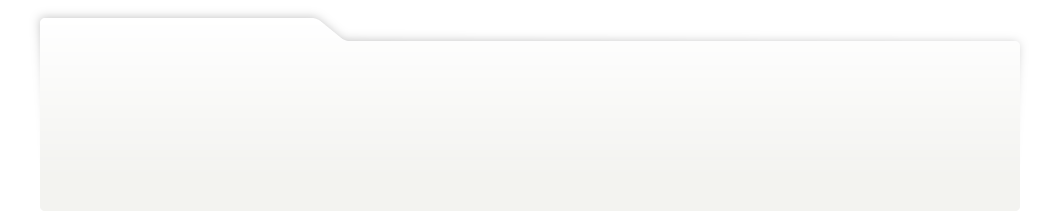
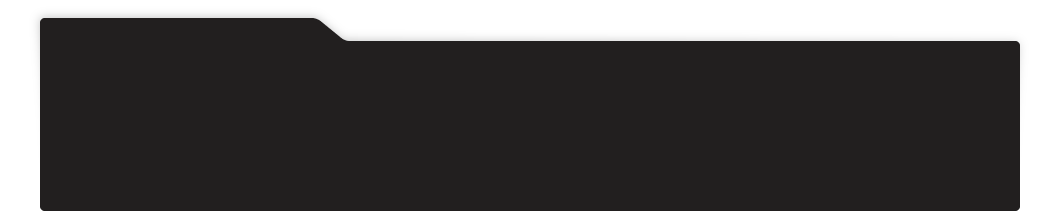
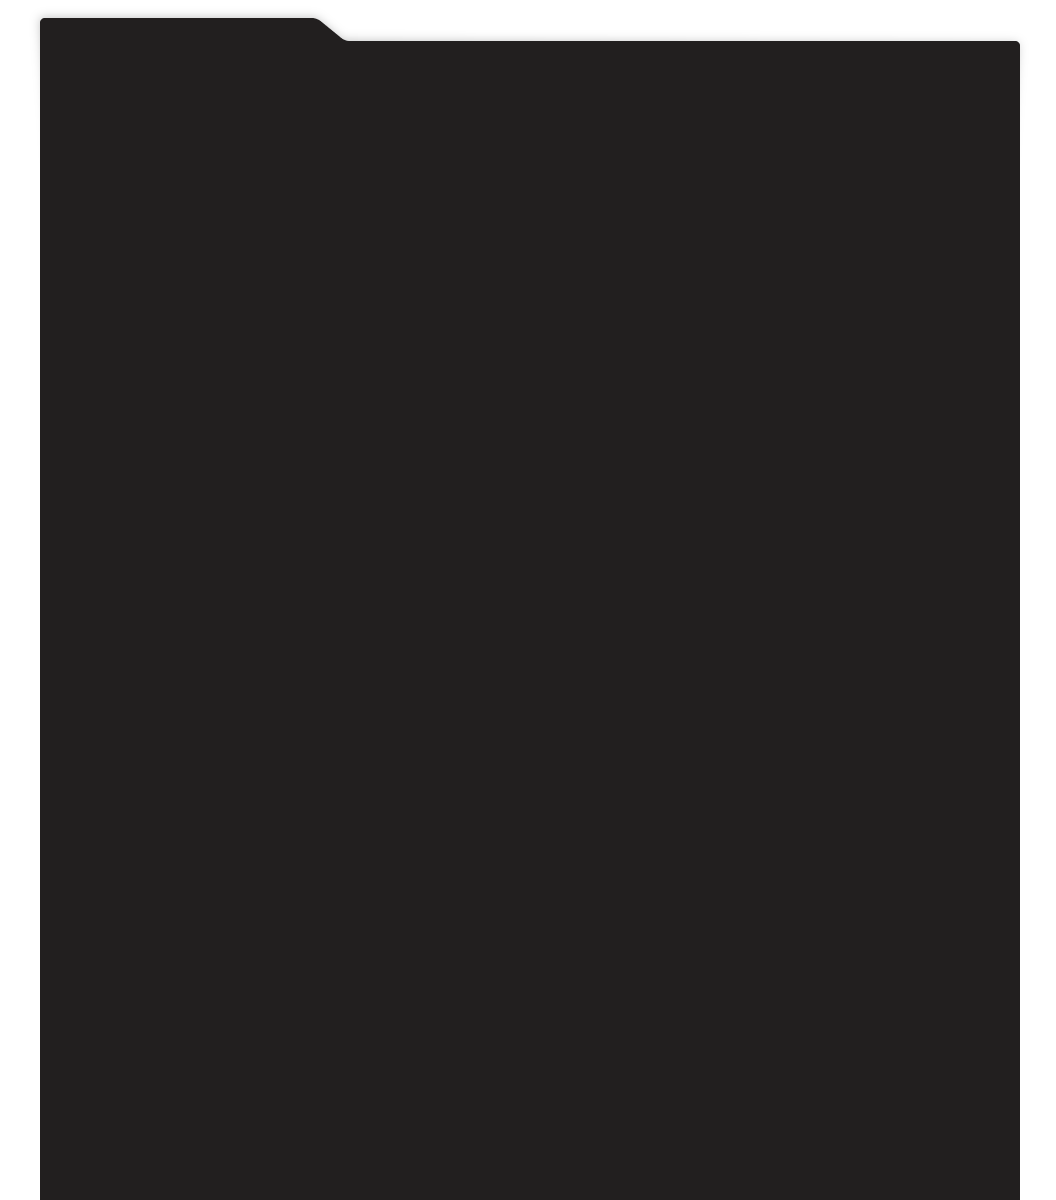
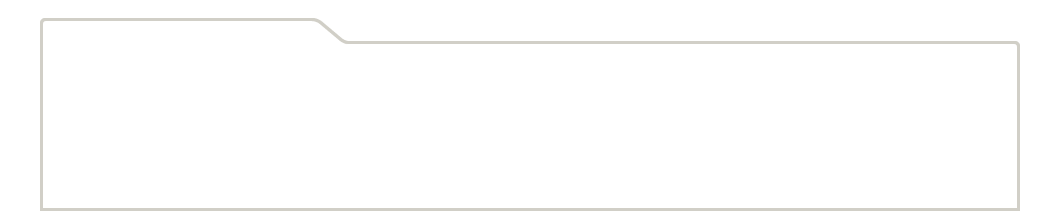
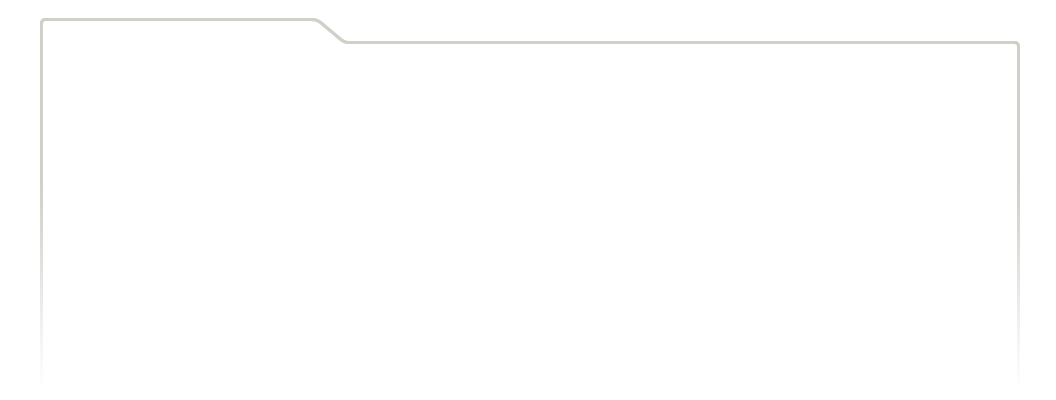
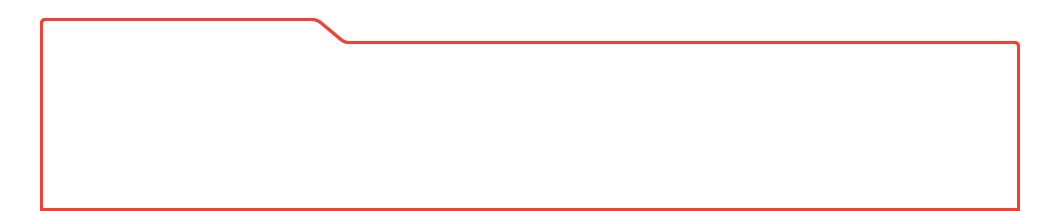
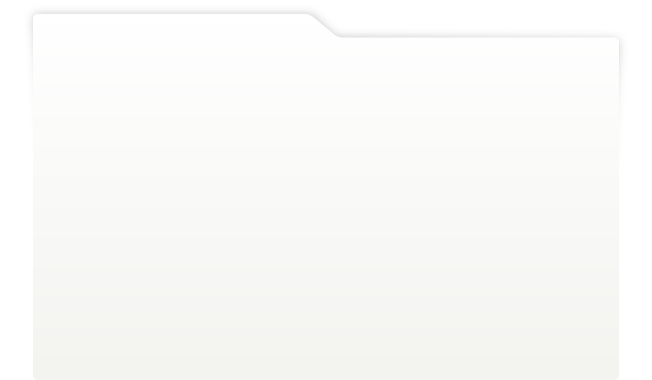
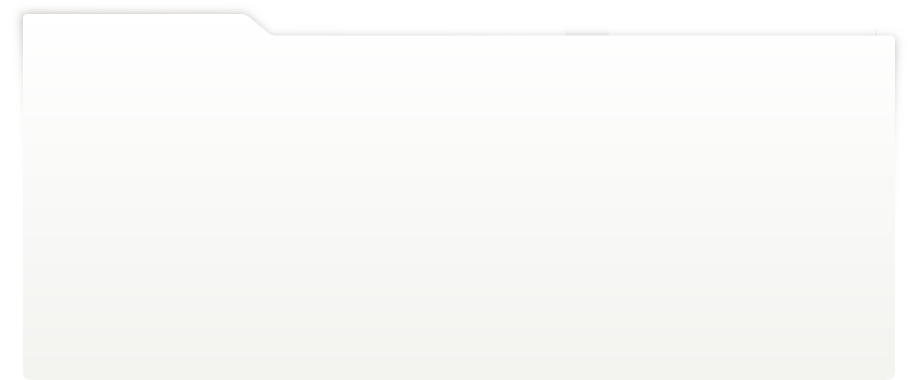
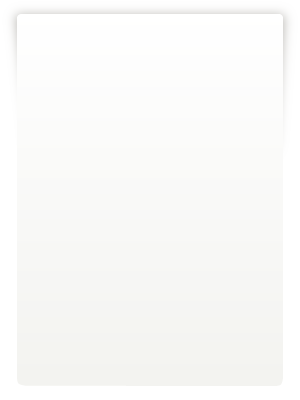
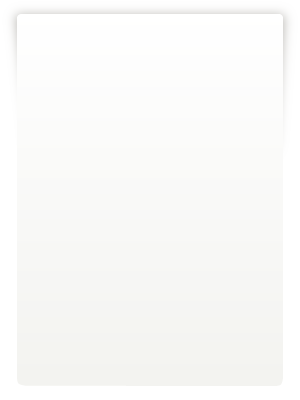
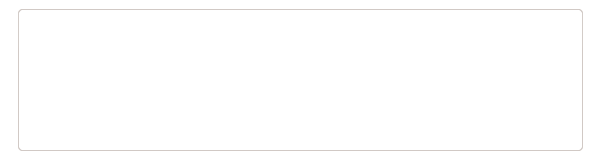
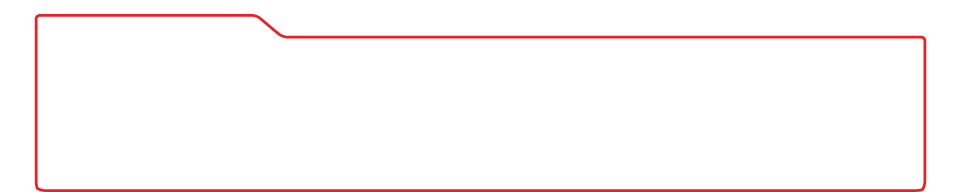
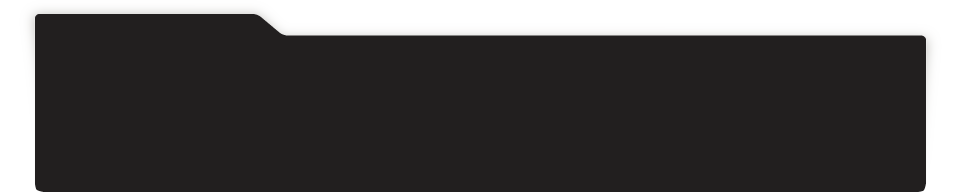
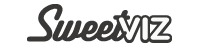
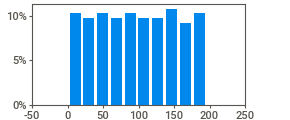
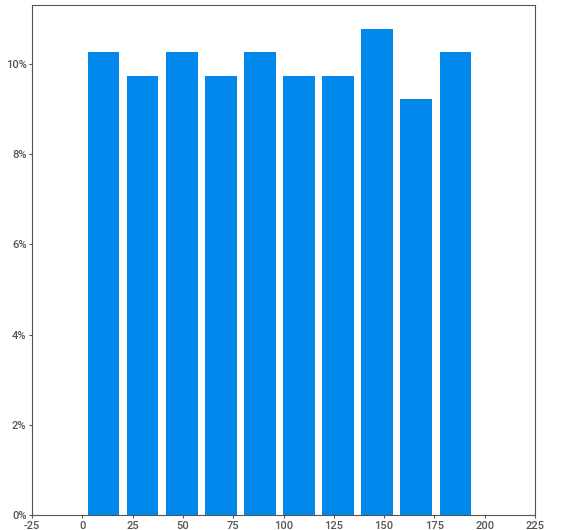
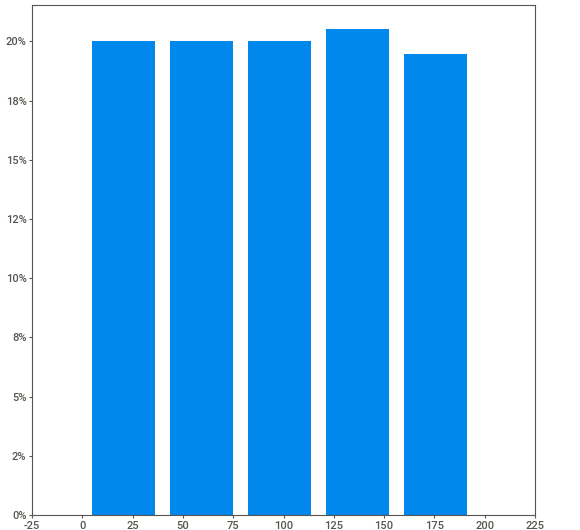
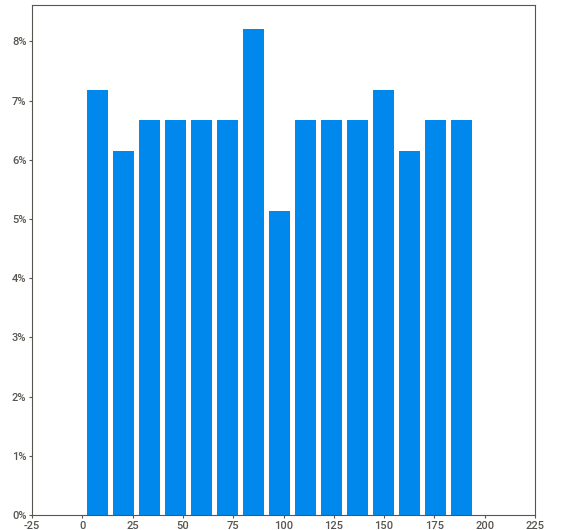
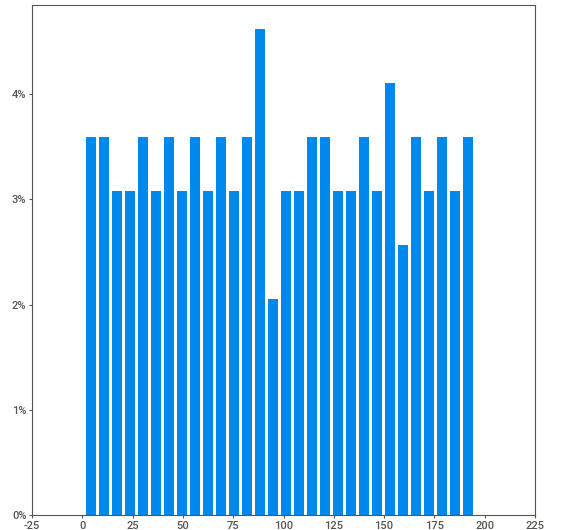
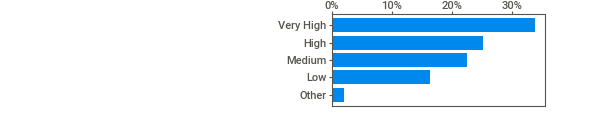
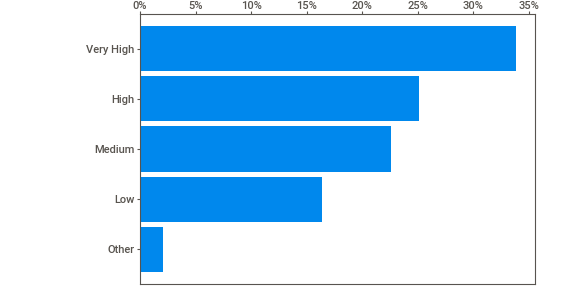
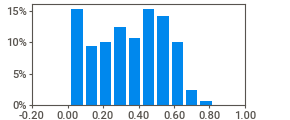
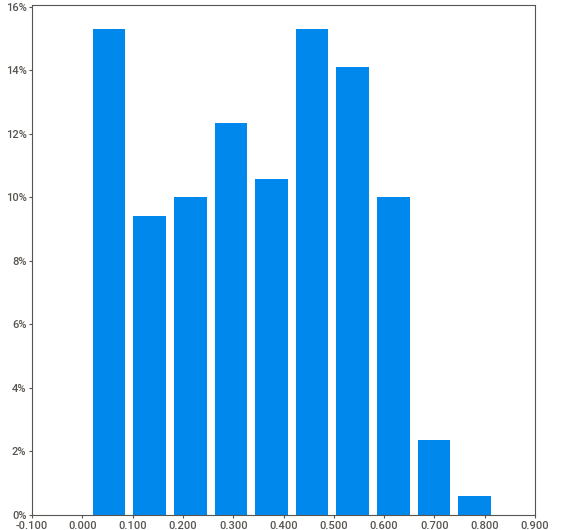
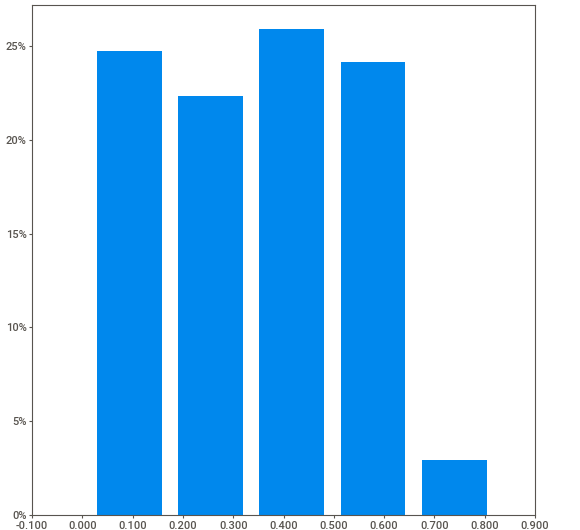
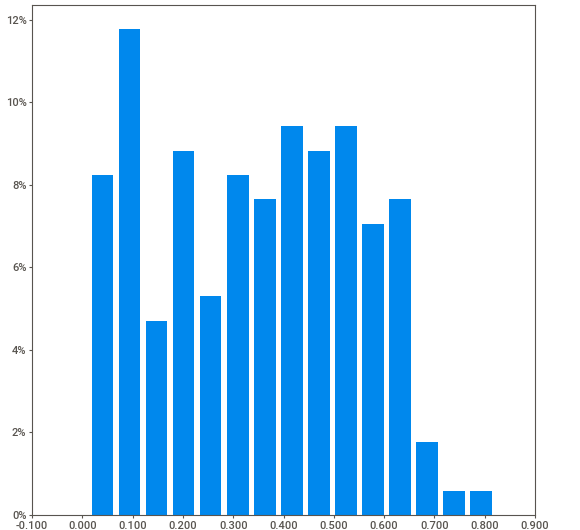
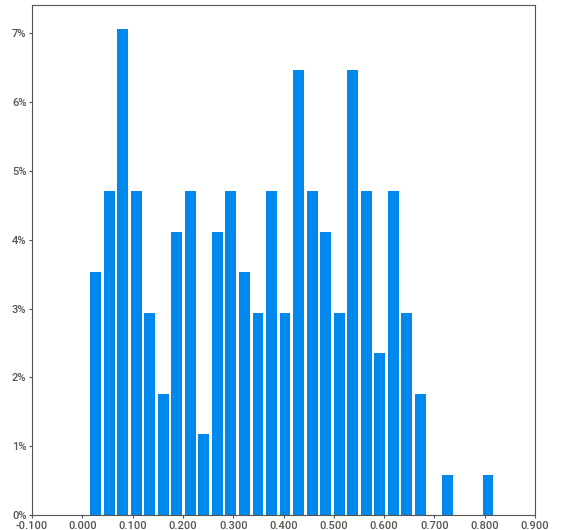
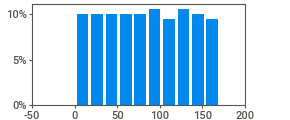
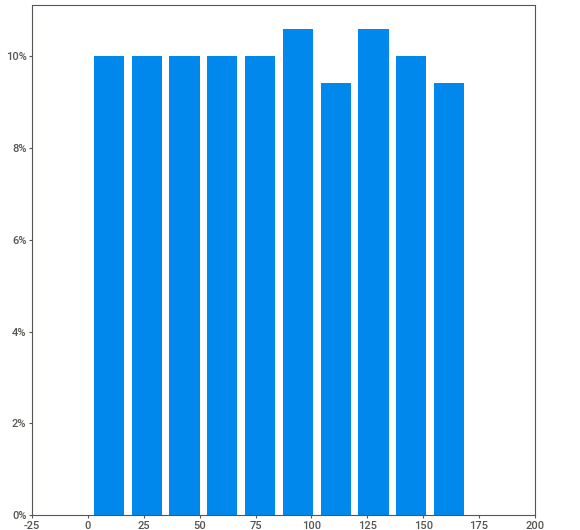
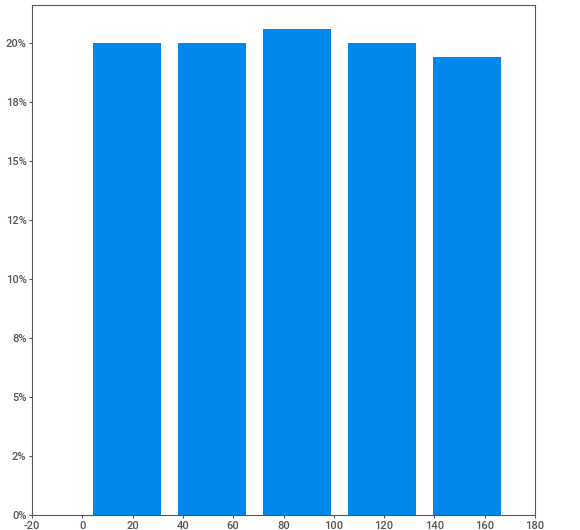
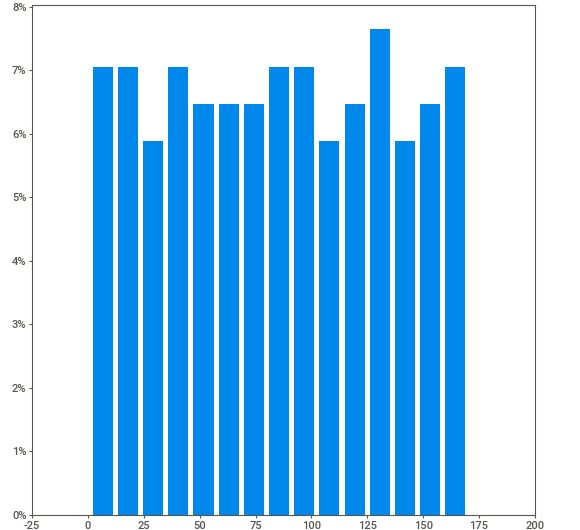
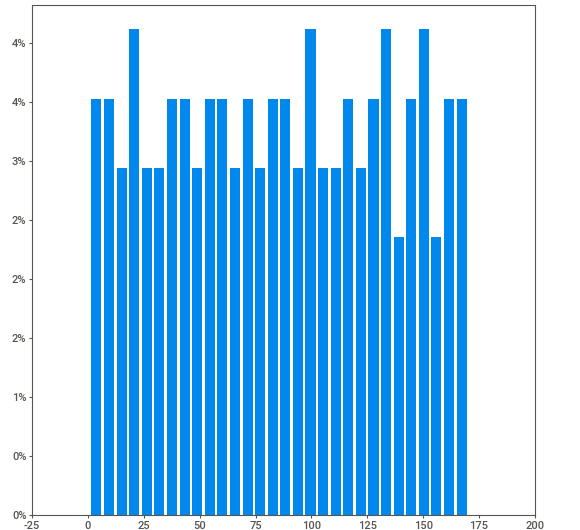
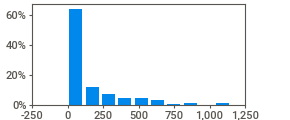
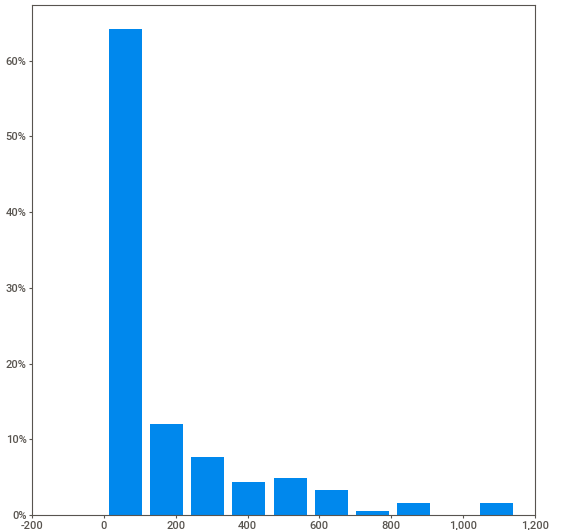
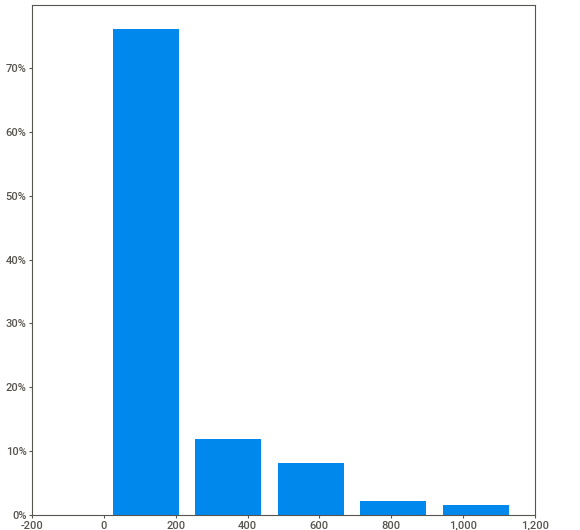
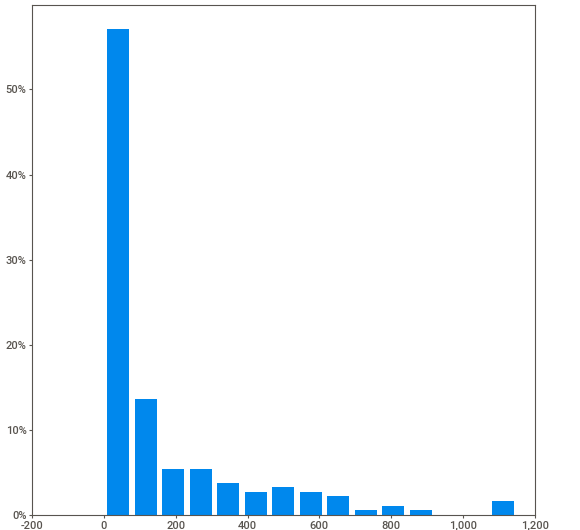
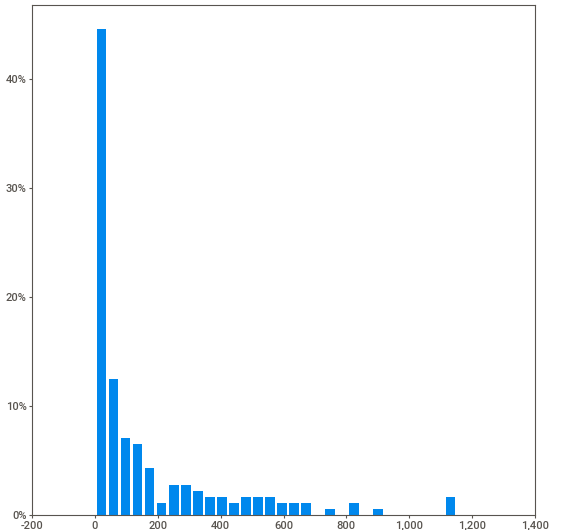
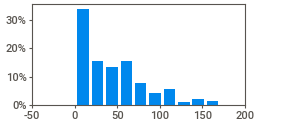
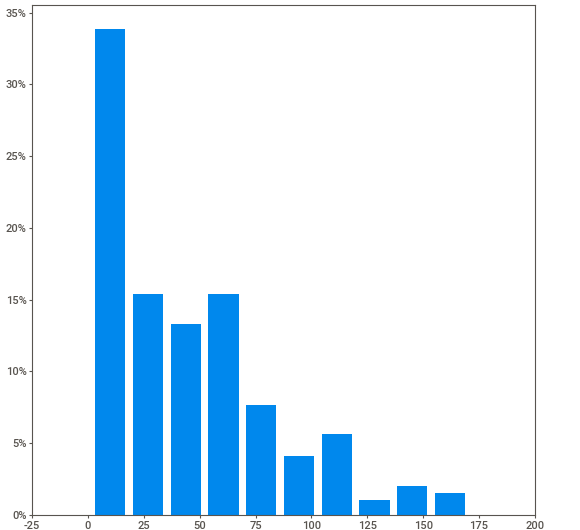
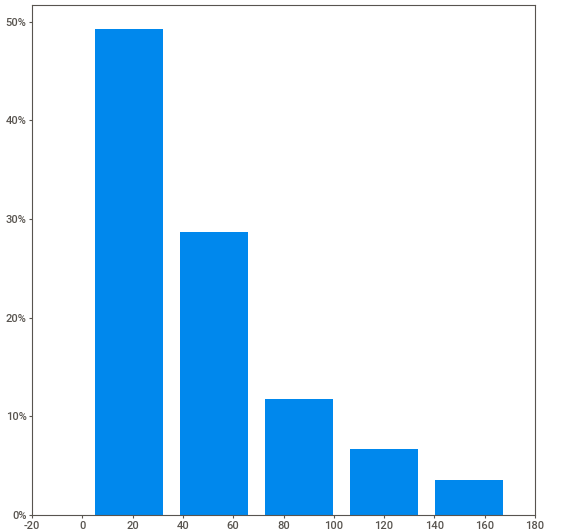
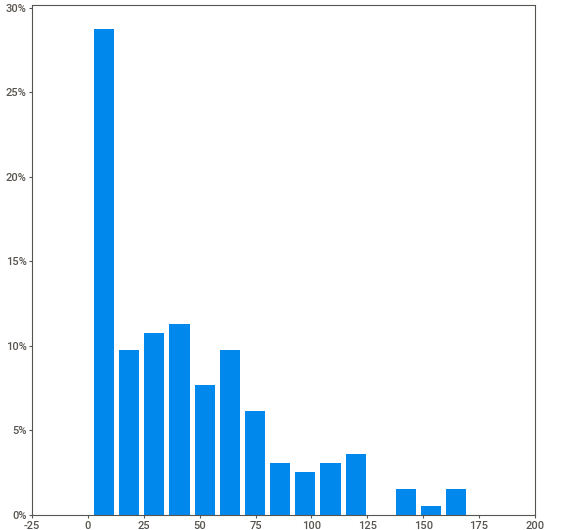
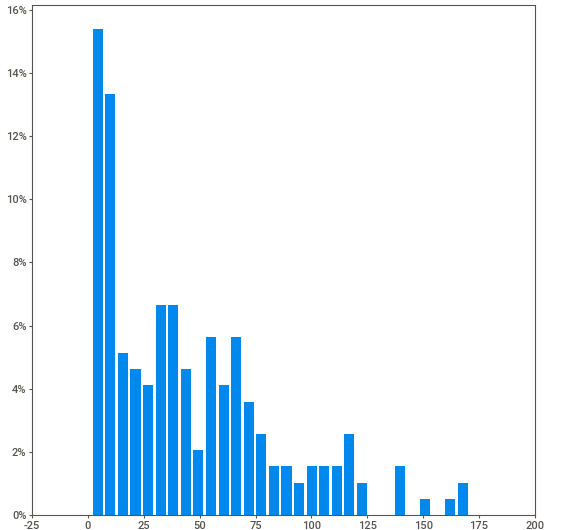
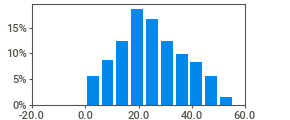
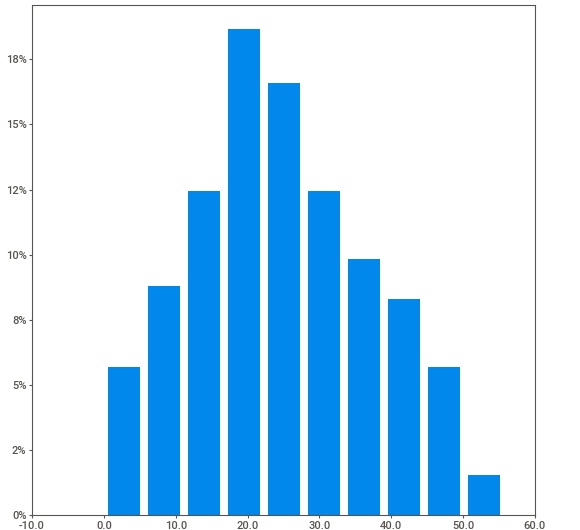
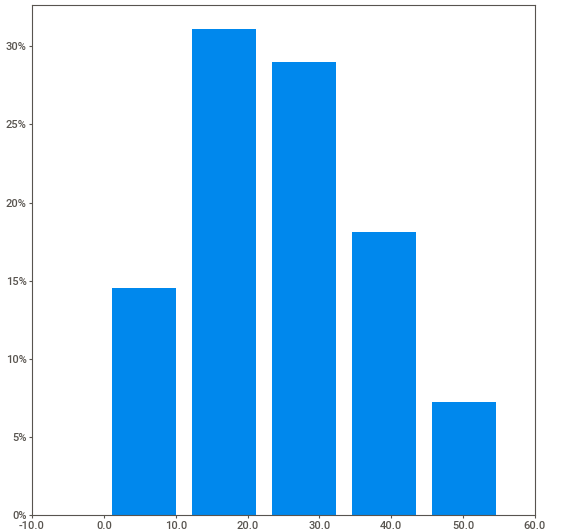
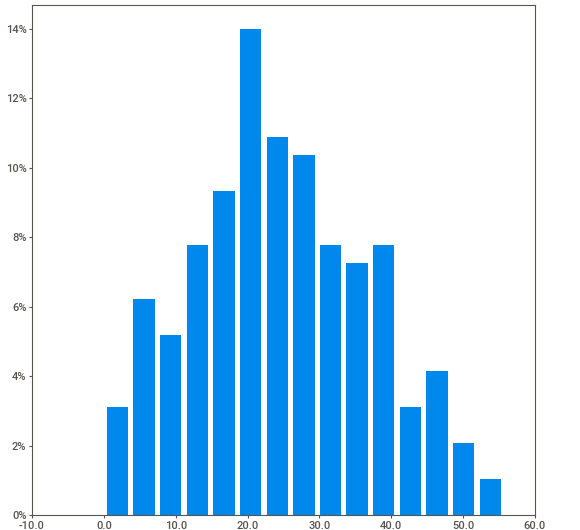
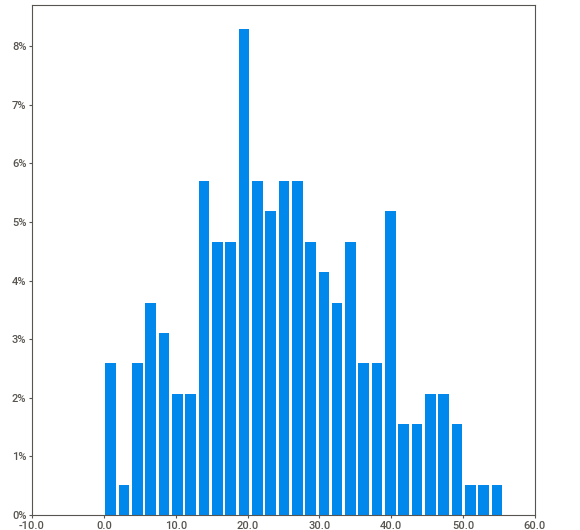
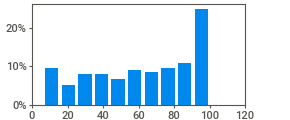
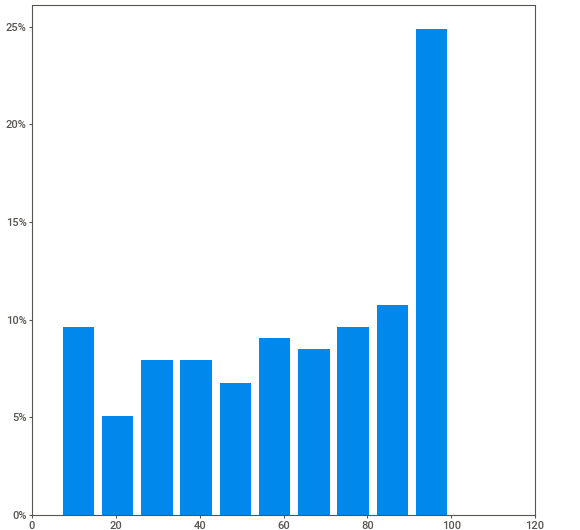
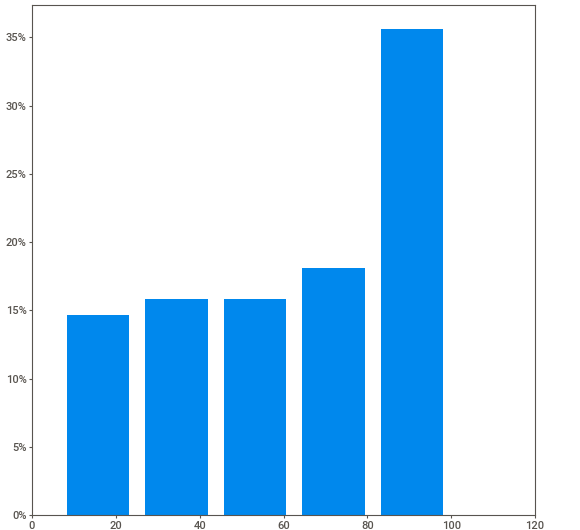
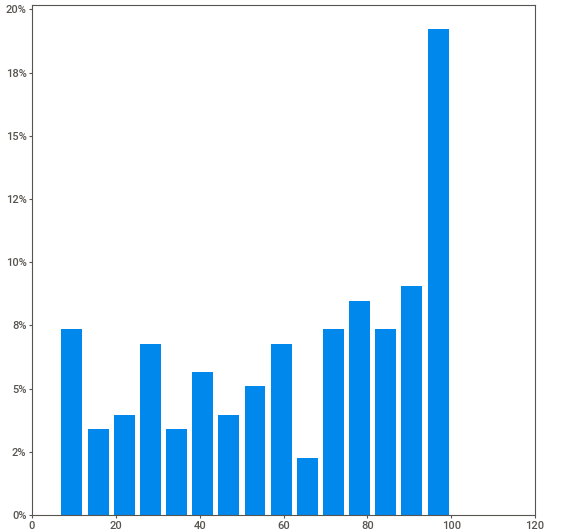
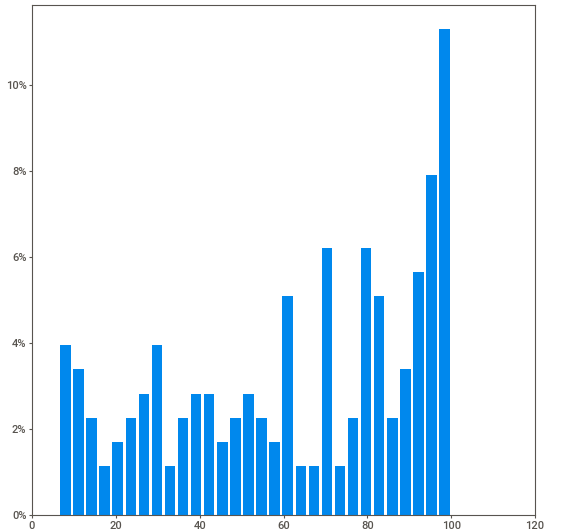
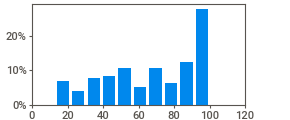
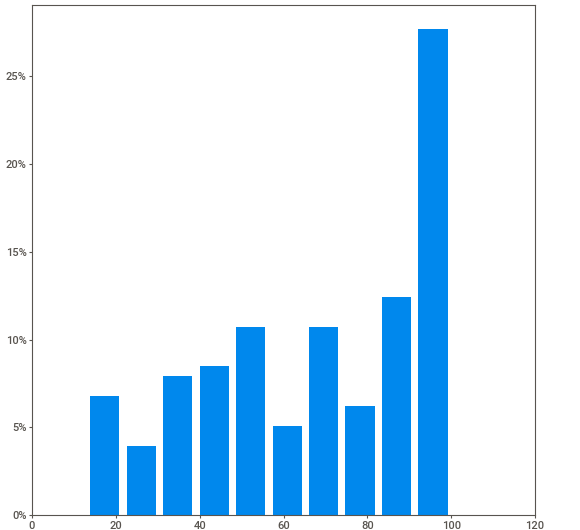
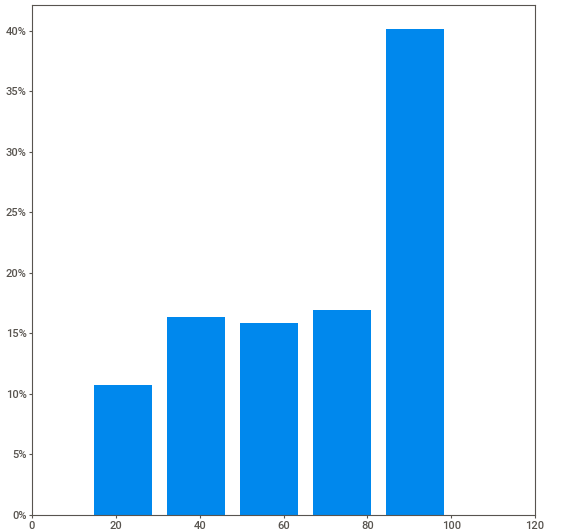
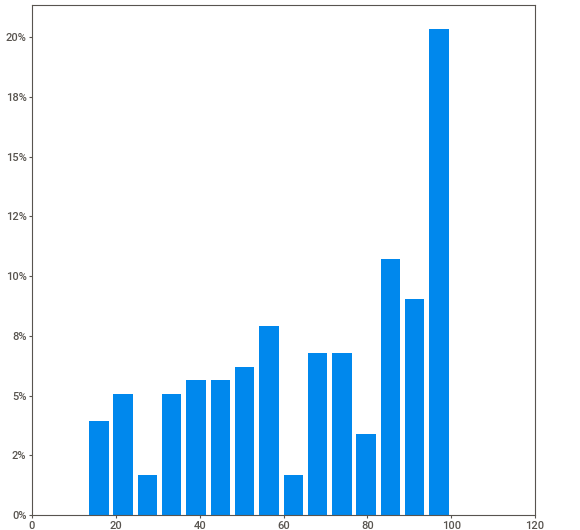
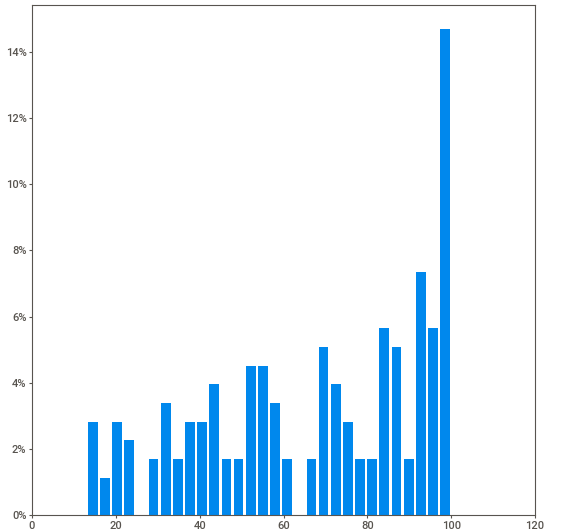
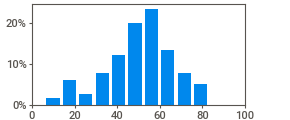
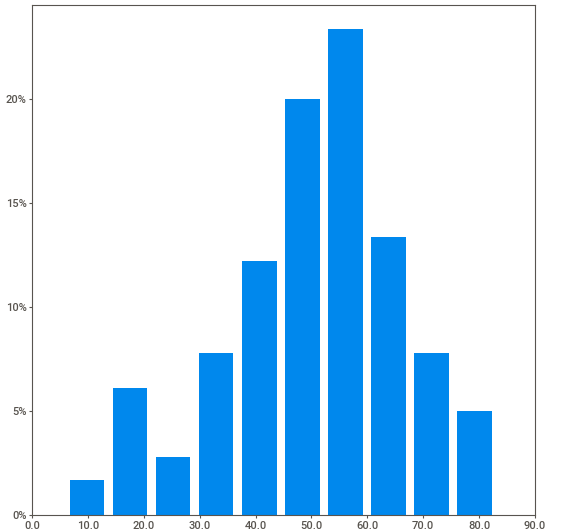
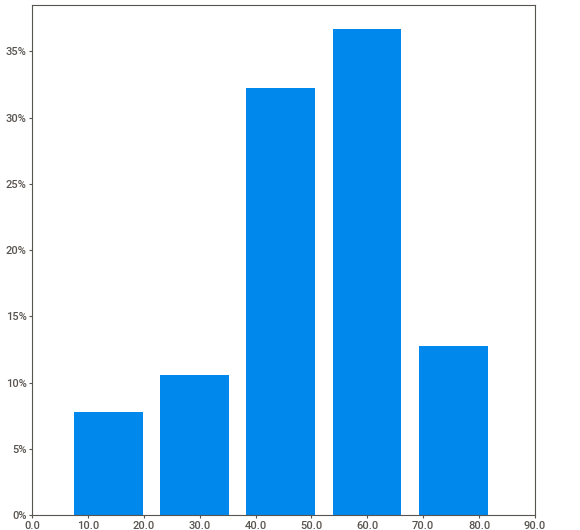
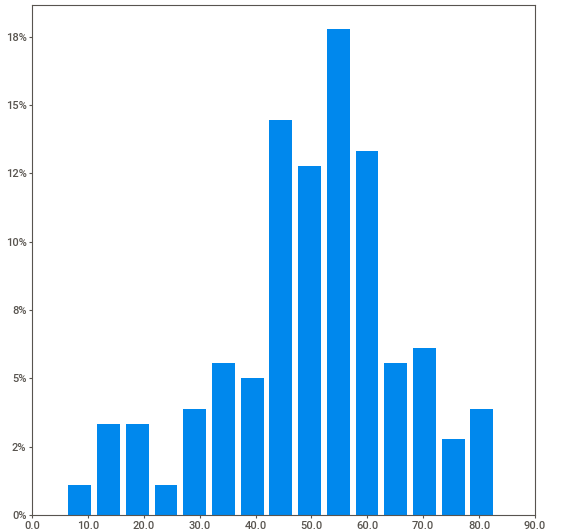
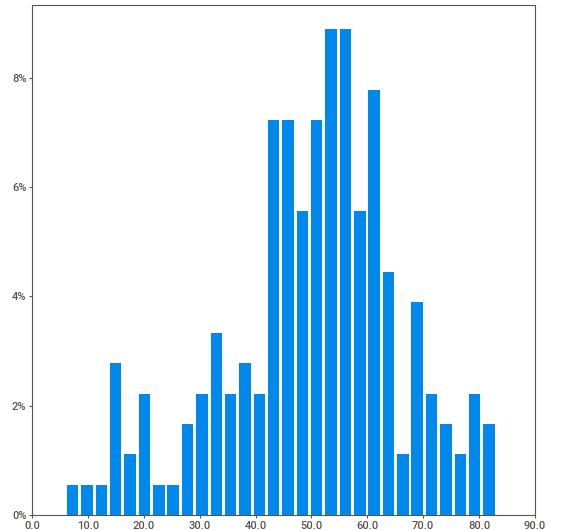
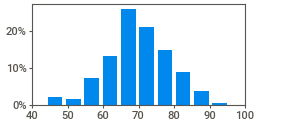
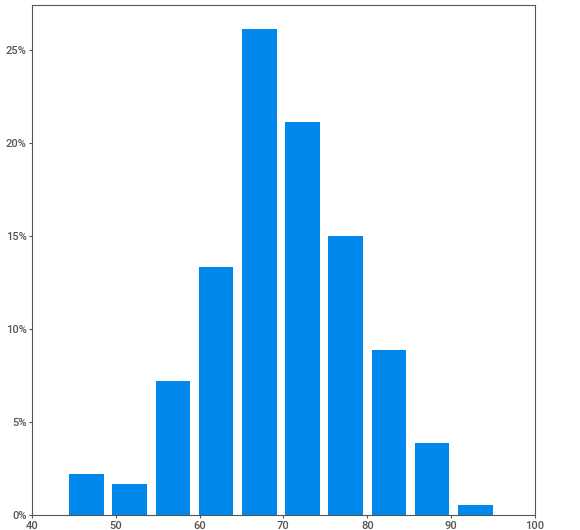
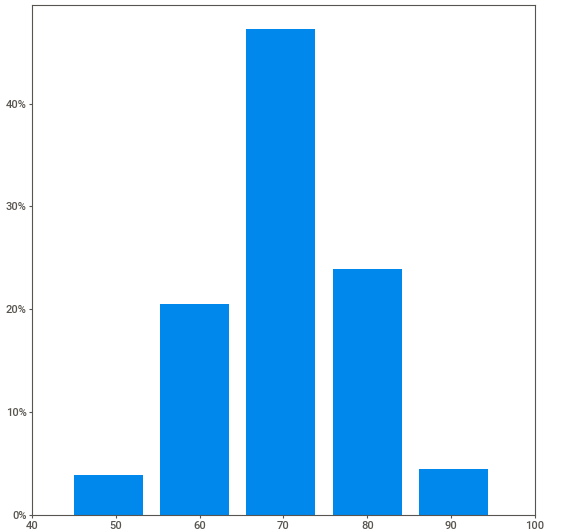
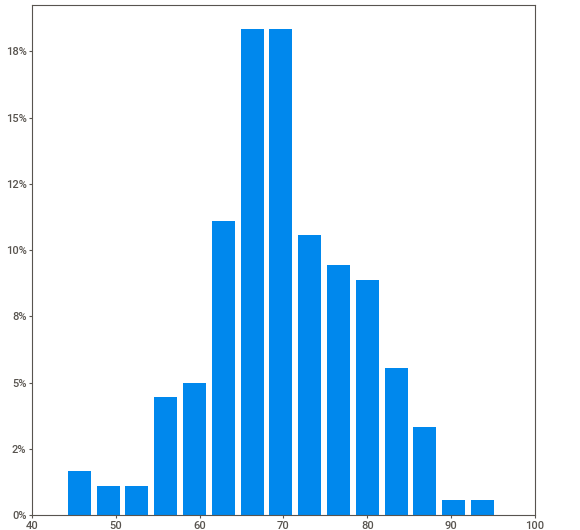
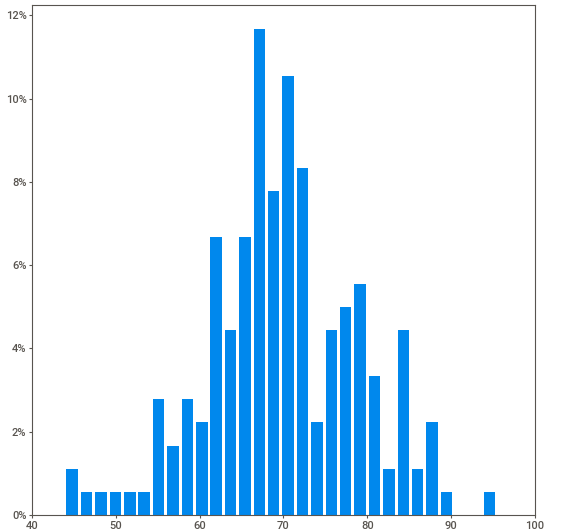
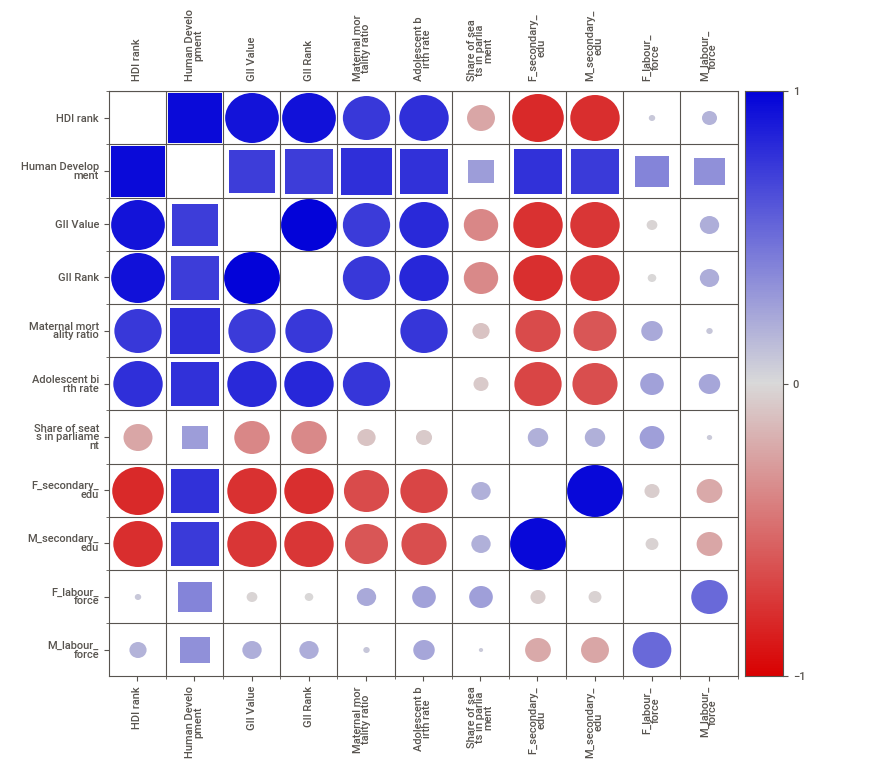
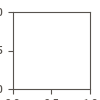

In [27]:
# Membuat report
report = sv.analyze(df)

# Visualisasi report
#report.show_html()
report.show_notebook()

In [28]:
print("Jumlah baris dan kolom dalam dataset:", df.shape)
print("Info dataset:")
print(df.info())

Jumlah baris dan kolom dalam dataset: (195, 12)
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HDI rank                      195 non-null    int64  
 1   Country                       195 non-null    object 
 2   Human Development             195 non-null    object 
 3   GII Value                     170 non-null    float64
 4   GII Rank                      170 non-null    float64
 5   Maternal mortality ratio      184 non-null    float64
 6   Adolescent birth rate         195 non-null    float64
 7   Share of seats in parliament  193 non-null    float64
 8   F_secondary_edu               177 non-null    float64
 9   M_secondary_edu               177 non-null    float64
 10  F_labour_force                180 non-null    float64
 11  M_labour_force                180 non-null    float64
dtypes:

## 2. Data Cleaning

In [29]:
# Ubah kolom menjadi huruf kecil
df = df.rename(columns=str.lower)

In [30]:
# Check apakah ada data duplikat
df.duplicated().any()

False

In [31]:
# Identifikasi kolom dengan nilai NaN
kolom_nan = df.columns[df.isnull().any()]
print("Kolom dengan nilai NaN:", kolom_nan)

Kolom dengan nilai NaN: Index(['gii value', 'gii rank', 'maternal mortality ratio',
       'share of seats in parliament', 'f_secondary_edu', 'm_secondary_edu',
       'f_labour_force', 'm_labour_force'],
      dtype='object')


In [32]:
df[df.isna().any(axis=1)]

hdi rank                              country human development  \
3           4               Hong Kong, China (SAR)         Very High   
15         16                        Liechtenstein         Very High   
39         40                              Andorra         Very High   
43         44                           San Marino         Very High   
68         68                              Grenada              High   
70         71                  Antigua and Barbuda              High   
71         72                           Seychelles              High   
74         75                Saint Kitts and Nevis              High   
81         80                                Palau              High   
101       102                             Dominica              High   
105       106                  Palestine, State of              High   
129       130                               Tuvalu            Medium   
130       131                     Marshall Islands            Medium   
133       134     Micronesia (Federated States of)            Medium   
135       136                             Kiribati            Medium   
141       140                              Vanuatu            Medium   
144       145                    Equatorial Guinea            Medium   
154       155                      Solomon Islands            Medium   
155       156                              Comoros            Medium   
170       171                             Djibouti               Low   
175       176                              Eritrea               Low   
191       192  Korea (Democratic People's Rep. of)             Other   
192       193                               Monaco             Other   
193       194                                Nauru             Other   
194       195                              Somalia             Other   

     gii value  gii rank  maternal mortality ratio  adolescent birth rate  \
3          NaN       NaN                       NaN                  1.584   
15         NaN       NaN                       NaN                  3.019   
39         NaN       NaN                       NaN                  5.887   
43         NaN       NaN                       NaN                  3.751   
68         NaN       NaN                      25.0                 32.720   
70         NaN       NaN                      42.0                 33.110   
71         NaN       NaN                      53.0                 53.444   
74         NaN       NaN                       NaN                 38.154   
81         NaN       NaN                       NaN                 42.520   
101        NaN       NaN                       NaN                 38.490   
105        NaN       NaN                      27.0                 43.469   
129        NaN       NaN                       NaN                 33.085   
130        NaN       NaN                       NaN                 58.035   
133        NaN       NaN                      88.0                 35.835   
135        NaN       NaN                      92.0                 40.477   
141        NaN       NaN                      72.0                 64.063   
144        NaN       NaN                     301.0                139.706   
154        NaN       NaN                     104.0                 60.251   
155        NaN       NaN                     273.0                 58.173   
170        NaN       NaN                     248.0                 22.722   
175        NaN       NaN                     480.0                 64.356   
191        NaN       NaN                      89.0                  2.325   
192        NaN       NaN                       NaN                  7.162   
193        NaN       NaN                       NaN                 72.479   
194        NaN       NaN                     829.0                117.994   

     share of seats in parliament  f_secondary_edu  m_secondary_edu  \
3                             NaN        77.100433        

<AxesSubplot:xlabel='m_labour_force', ylabel='Density'>

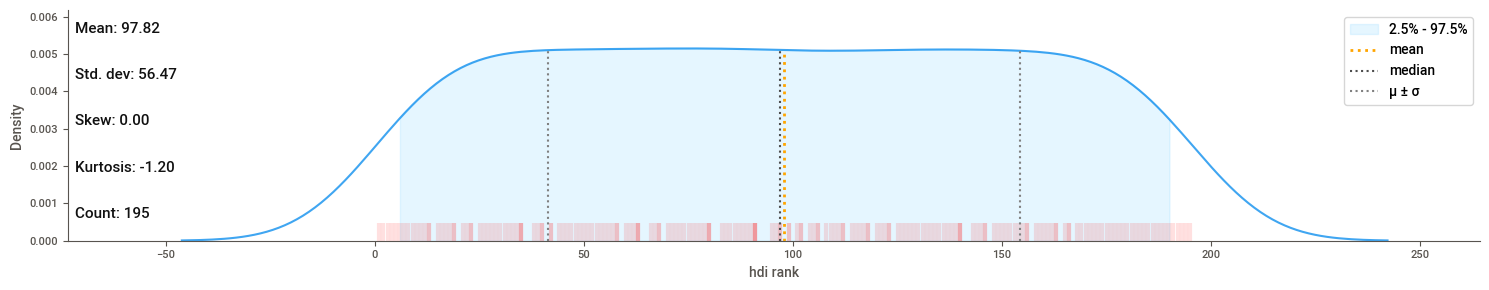

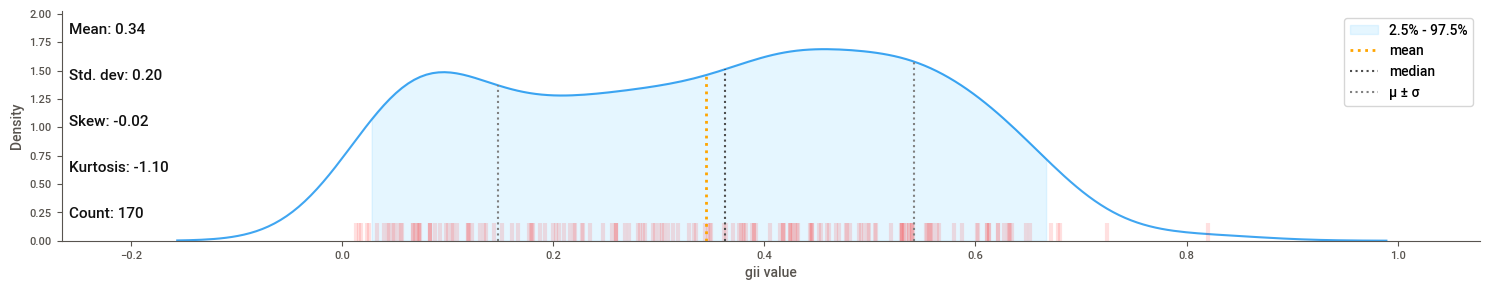

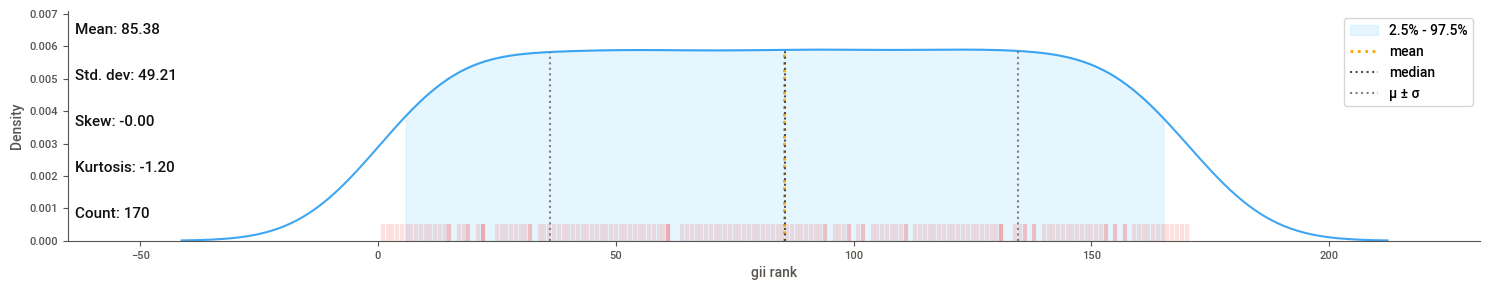

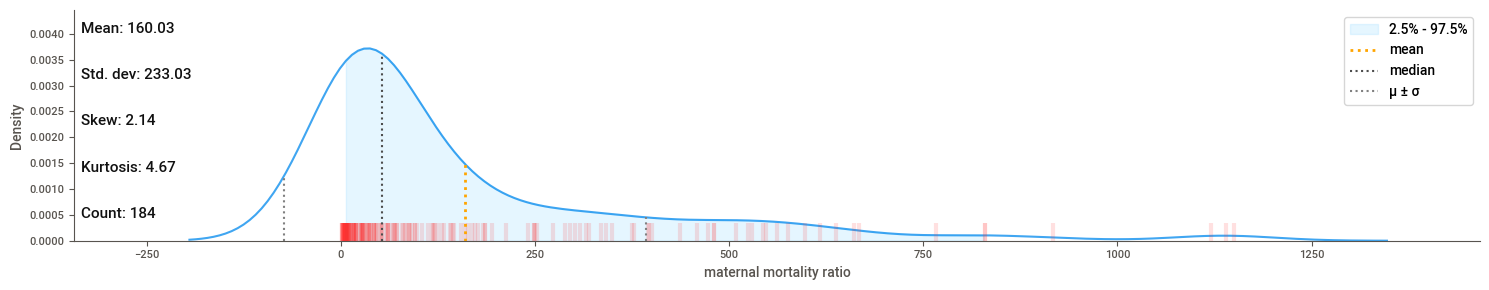

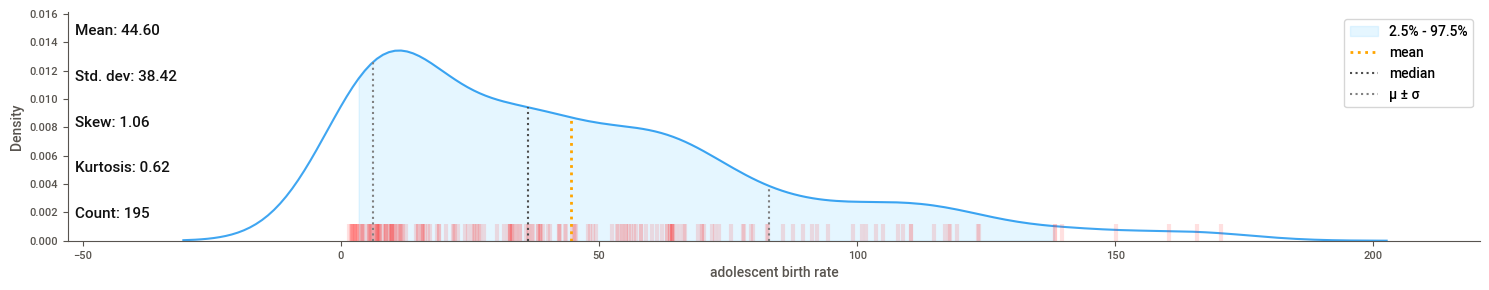

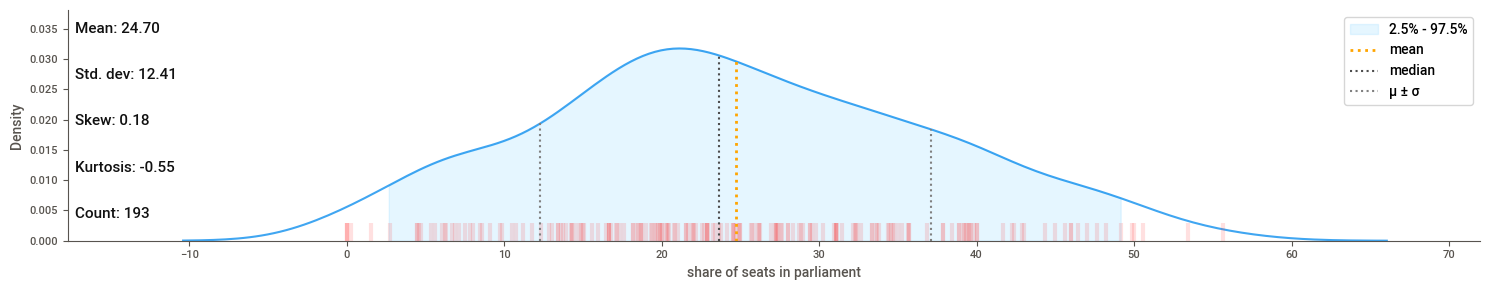

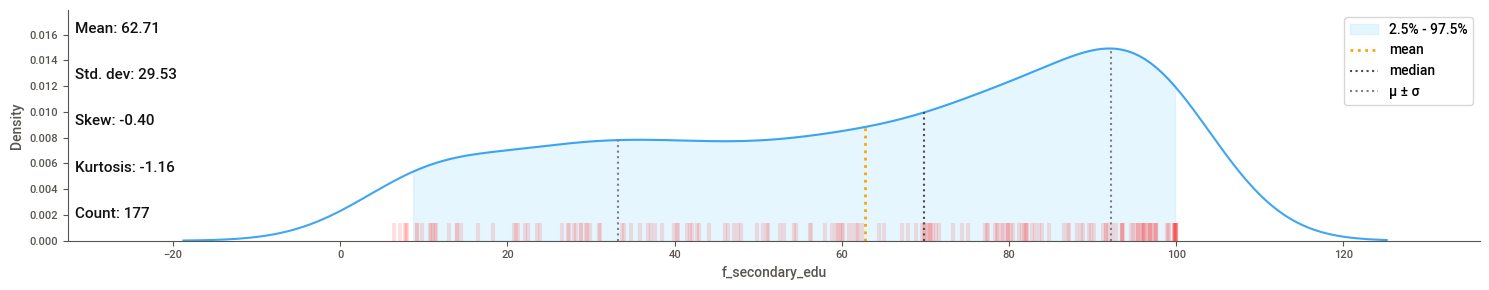

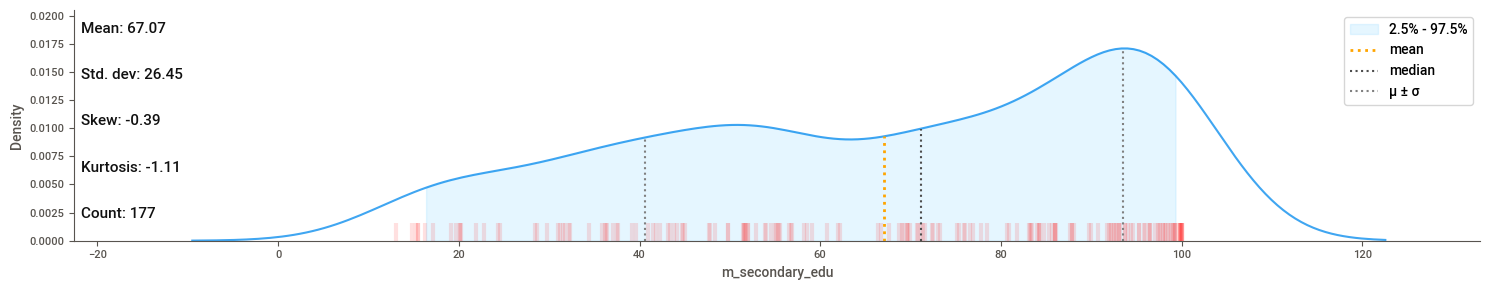

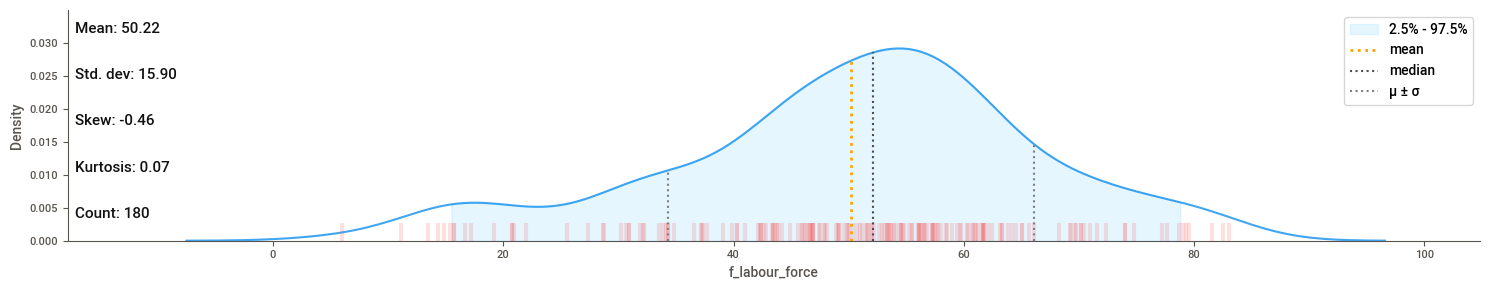

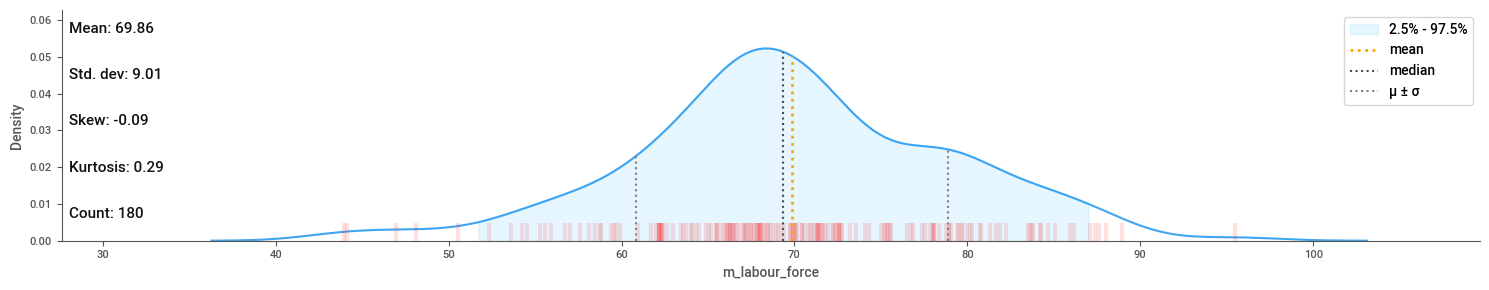

In [33]:
klib.dist_plot(df)

Berdasarkan plot di atas dapat diketahui bahwa ada beberapa kolom yang memiliki skewness yang signifikan (mendekati -1 atau 1 atau lebih) yang menunjukkan adanya pergeseran atau ketimpangan yang cukup besar dalam distribusi data. Berikut kolom-kolom yang memiliki skewness yang signifikan:
- maternal mortality ratio dengan nilai skew 2.14
- adolescent birth rate dengan skew 1.06

In [117]:
# Evaluasi tingkat missing values dalam setiap kolom
print("Jumlah missing values dalam setiap kolom:")
print(df.isnull().sum())

Jumlah missing values dalam setiap kolom:
hdi rank                         0
country                          0
human development                0
gii value                       25
gii rank                        25
maternal mortality ratio        11
adolescent birth rate            0
share of seats in parliament     2
f_secondary_edu                 18
m_secondary_edu                 18
f_labour_force                  15
m_labour_force                  15
dtype: int64


In [118]:
df_clean = df.copy()

In [119]:
# Menghapus kolom yang tidak digunakan
df_clean = df_clean.drop(columns=['gii rank'])

In [120]:
df_clean = df_clean.dropna()

In [121]:
print("Jumlah missing values dalam setiap kolom:")
print(df_clean.isnull().sum())

Jumlah missing values dalam setiap kolom:
hdi rank                        0
country                         0
human development               0
gii value                       0
maternal mortality ratio        0
adolescent birth rate           0
share of seats in parliament    0
f_secondary_edu                 0
m_secondary_edu                 0
f_labour_force                  0
m_labour_force                  0
dtype: int64


In [122]:
# Ubah tipe data pada kolom yang tidak sesuai
df_clean[['maternal mortality ratio']] = df_clean[['maternal mortality ratio']].astype(int)


# Menampilkan informasi tipe data setelah perubahan
print(df_clean.dtypes)

hdi rank                          int64
country                          object
human development                object
gii value                       float64
maternal mortality ratio          int64
adolescent birth rate           float64
share of seats in parliament    float64
f_secondary_edu                 float64
m_secondary_edu                 float64
f_labour_force                  float64
m_labour_force                  float64
dtype: object


In [123]:
df_clean.tail()

hdi rank                   country human development  gii value  \
186       187                   Burundi               Low      0.505   
187       188  Central African Republic               Low      0.672   
188       189                     Niger               Low      0.611   
189       190                      Chad               Low      0.652   
190       191               South Sudan               Low      0.587   

     maternal mortality ratio  adolescent birth rate  \
186                       548                 53.621   
187                       829                160.507   
188                       509                170.462   
189                      1140                138.306   
190                      1150                 99.199   

     share of seats in parliament  f_secondary_edu  m_secondary_edu  \
186                     38.888889         7.799910        13.046886   
187                     12.857143        13.940000        31.560000   
188                     25.903614         9.163242        15.232771   
189                     32.258065         7.739064        24.369996   
190                     32.334385        26.537640        36.357239   

     f_labour_force  m_labour_force  
186          78.991          77.379  
187          63.312          79.486  
188          61.730          84.267  
189          46.914          69.927  
190          70.440          73.574

#### *Setelah mengecek data, ditemukan bahwa:*
- Data terdiri dari 195 baris dan 12 kolom
- Terdapat 9 kolom dengan tipe data float, 2 kolom dengan tipe data string dan 1 kolom dengan tipe data integer
- Tidak ada data yang duplikat
- Terdapat 8 kolom dengan data yang kosong (NaN values), maka dari itu dilakukan dropna untuk membuang baris yang mengandung NaN values
- Melakukan perubahan tipe data yang tidak sesuai, pada kolom 'maternal mortality ratio' dari float menjadi integer
- Menghapus kolom yang tidak digunakan: kolom hdi rank dan gii rank.

## 3. Statistik Deskriptif

In [124]:
# Memisahkan kolom-kolom berdasarkan tipe datanya
data_numerik = df_clean.select_dtypes(['float64','int64']).columns
data_string = df_clean.select_dtypes(['object']).columns

In [125]:
df_stat = df_clean.copy()

In [126]:
df_stat.describe()

hdi rank   gii value  maternal mortality ratio  \
count  170.000000  170.000000                170.000000   
mean    94.988235    0.344376                157.188235   
std     55.928630    0.197105                234.061565   
min      1.000000    0.013000                  2.000000   
25%     47.250000    0.177500                 11.250000   
50%     93.000000    0.363000                 46.000000   
75%    143.750000    0.505750                184.500000   
max    191.000000    0.820000               1150.000000   

       adolescent birth rate  share of seats in parliament  f_secondary_edu  \
count             170.000000                    170.000000       170.000000   
mean               44.843618                     25.301864        62.077497   
std                39.124426                     12.352110        29.861243   
min                 1.908000                      0.000000         6.395730   
25%                10.667750                     16.700000        36.911476   
50%                34.648500                     23.943966        69.212936   
75%                65.457750                     34.533223        90.113731   
max               170.462000                     55.660377       100.000000   

       m_secondary_edu  f_labour_force  m_labour_force  
count       170.000000      170.000000      170.000000  
mean         66.548596       50.352676       70.023882  
std          26.745219       15.300506        8.469920  
min          13.046886        5.995000       43.932000  
25%          44.285603       42.696000       65.233250  
50%          70.716056       52.123000       69.562000  
75%          92.562222       60.348000       75.393750  
max         100.000000       82.501000       95.456000

In [127]:
df_stat[df_stat['share of seats in parliament']==0.0]

hdi rank           country human development  gii value  \
92         91             Tonga              High      0.631   
156       156  Papua New Guinea            Medium      0.725   

     maternal mortality ratio  adolescent birth rate  \
92                         52                 18.965   
156                       145                 55.250   

     share of seats in parliament  f_secondary_edu  m_secondary_edu  \
92                            0.0         93.52619        93.147922   
156                           0.0         10.78000        15.520000   

     f_labour_force  m_labour_force  
92           37.292          55.263  
156          46.254          48.140

Setelah melakukan statistik deskriptif, terdapat insight yang menarik. Ternyata ada 3 negara yang tidak memiliki proporsi kursi yang dipegang oleh perempuan di parlemennya

In [128]:
df_stat[data_string].describe()

country human development
count           170               170
unique          170                 4
top     Switzerland         Very High
freq              1                62

In [129]:
# Menghitung nilai rata-rata dan median dari kolom "share of seats in parliament"
seats_mean = df_clean['share of seats in parliament'].mean()
seats_median = df_clean['share of seats in parliament'].median()
print("Mean Share of Seats in Parliament:", seats_mean)
print("Median Share of Seats in Parliament:", seats_median)

Mean Share of Seats in Parliament: 25.301864339094124
Median Share of Seats in Parliament: 23.943965515000002


In [130]:
# Negara dengan "gii value" tertinggi dan terendah
highest_gii = df_stat[df_stat['gii value'] == df_stat['gii value'].max()]['country'].iloc[0]
lowest_gii = df_stat[df_stat['gii value'] == df_stat['gii value'].min()]['country'].iloc[0]
print("Country with the highest GII value:", highest_gii)
print("Country with the lowest GII value:", lowest_gii)

Country with the highest GII value: Yemen
Country with the lowest GII value: Denmark


In [131]:
# Mengganti nilai "Very High", "High", "Medium", "Low" menjadi skala numerik
df_stat['human development'] = df_stat['human development'].replace({
    'Very High': 4,
    'High': 3,
    'Medium': 2,
    'Low': 1
})

# Mengubah kolom "human development" menjadi tipe numerik
df_stat['human development'] = pd.to_numeric(df_stat['human development'], errors='coerce')

# Mengisi nilai yang hilang dengan nilai rata-rata
mean_hdi = df_stat['human development'].mean()
df_clean['human development'].fillna(mean_hdi, inplace=True)

# Membuat kelompok berdasarkan kolom "human development" dengan nilai yang sudah diisi
income_groups = pd.cut(df_stat['human development'], bins=3, labels=['Low', 'Medium', 'High'])
gii_mean_by_income = df_stat.groupby(income_groups)['gii value'].mean()
print(gii_mean_by_income)

human development
Low       0.531470
Medium    0.341690
High      0.147032
Name: gii value, dtype: float64


In [132]:
# Rata-rata "f_secondary_edu" dan "m_secondary_edu"
f_secondary_mean = df_stat['f_secondary_edu'].mean()
m_secondary_mean = df_stat['m_secondary_edu'].mean()
print("Mean Female Secondary Education:", f_secondary_mean)
print("Mean Male Secondary Education:", m_secondary_mean)

Mean Female Secondary Education: 62.077497317129435
Mean Male Secondary Education: 66.54859597670593


In [133]:
# Rata-rata "f_labour_force" dan "m_labour_force"
f_lf_mean = df_stat['f_labour_force'].mean()
m_lf_mean = df_stat['m_labour_force'].mean()
print("Mean Female Labour Force:", f_lf_mean)
print("Mean Male Labour Force:", m_lf_mean)

Mean Female Labour Force: 50.35267647058824
Mean Male Labour Force: 70.0238823529412


## 4. Univariate Analysis

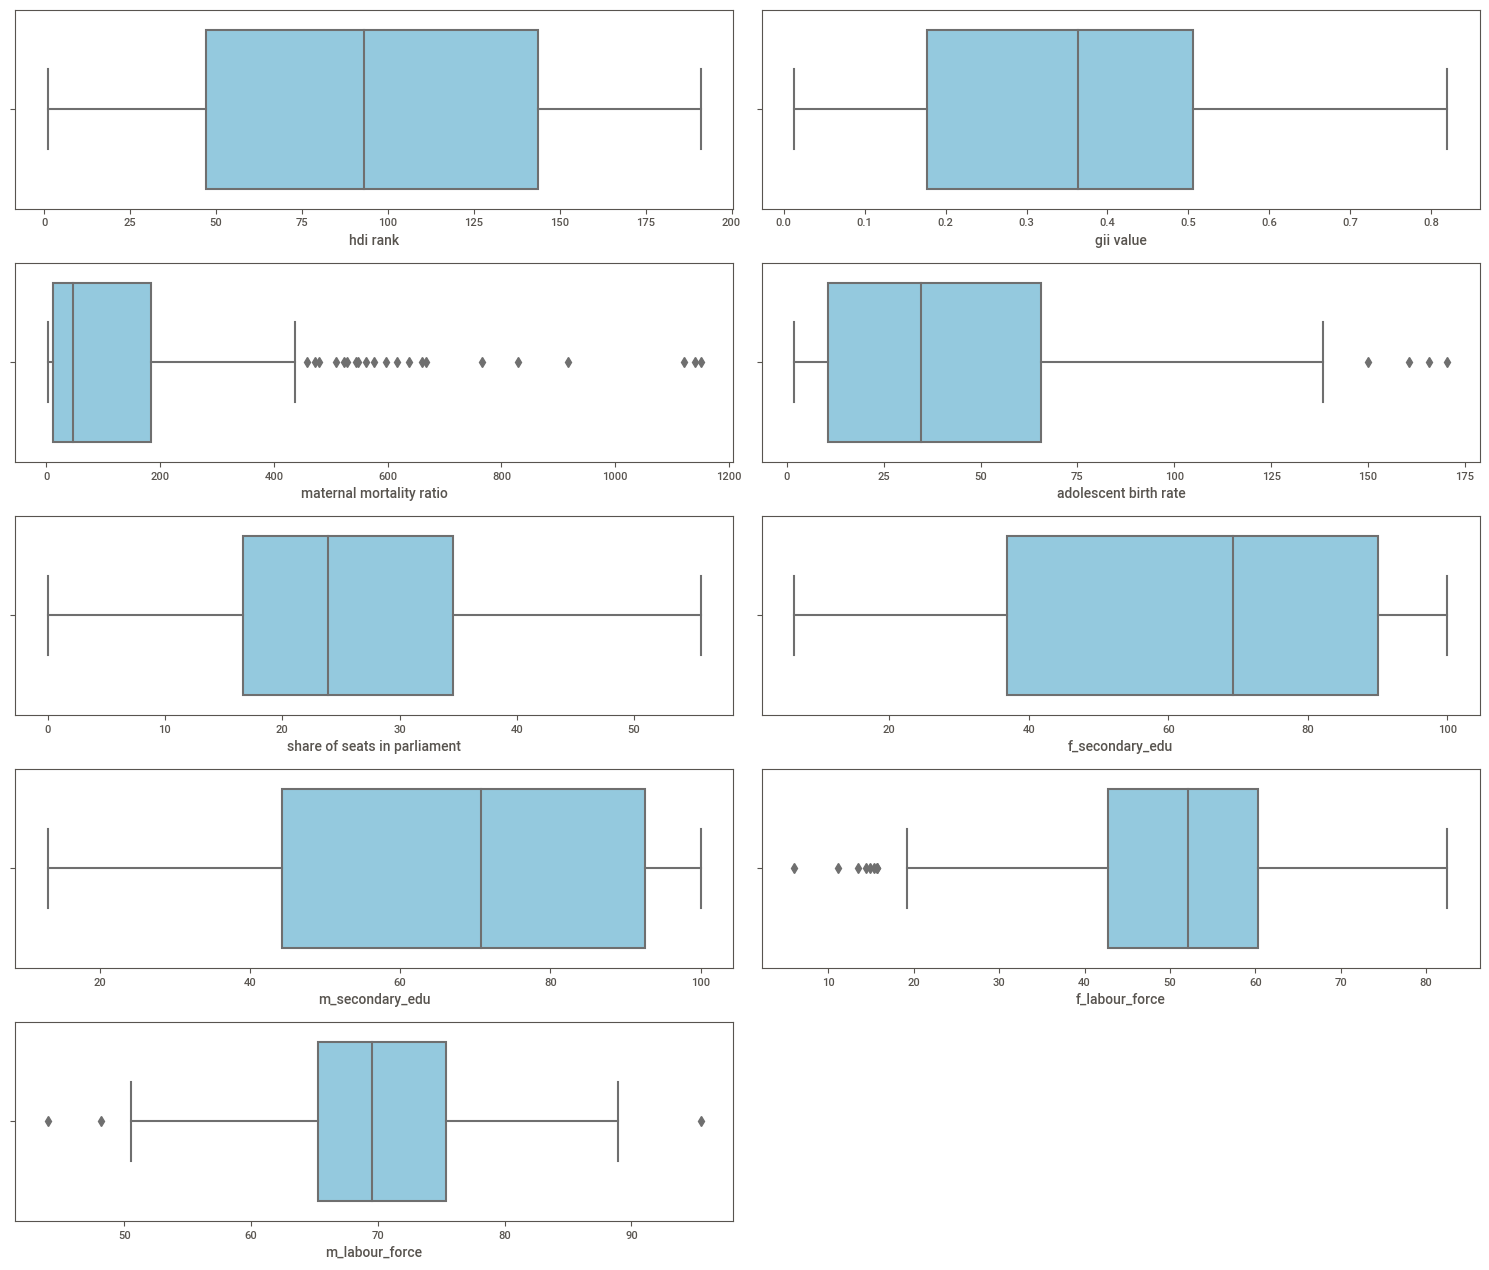

In [135]:
plt.figure(figsize=(15, 20))
for i in range(0, len(data_numerik)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_clean[data_numerik[i]], color='skyblue',orient='v')
    plt.tight_layout()
plt.show()

#### *Berdasarkan boxplot, terdapat beberapa kolom yang memiliki outlier, yaitu:*
- maternal mortality ratio
- adolescent birth rate
- f_labour_force
- m_labour_force

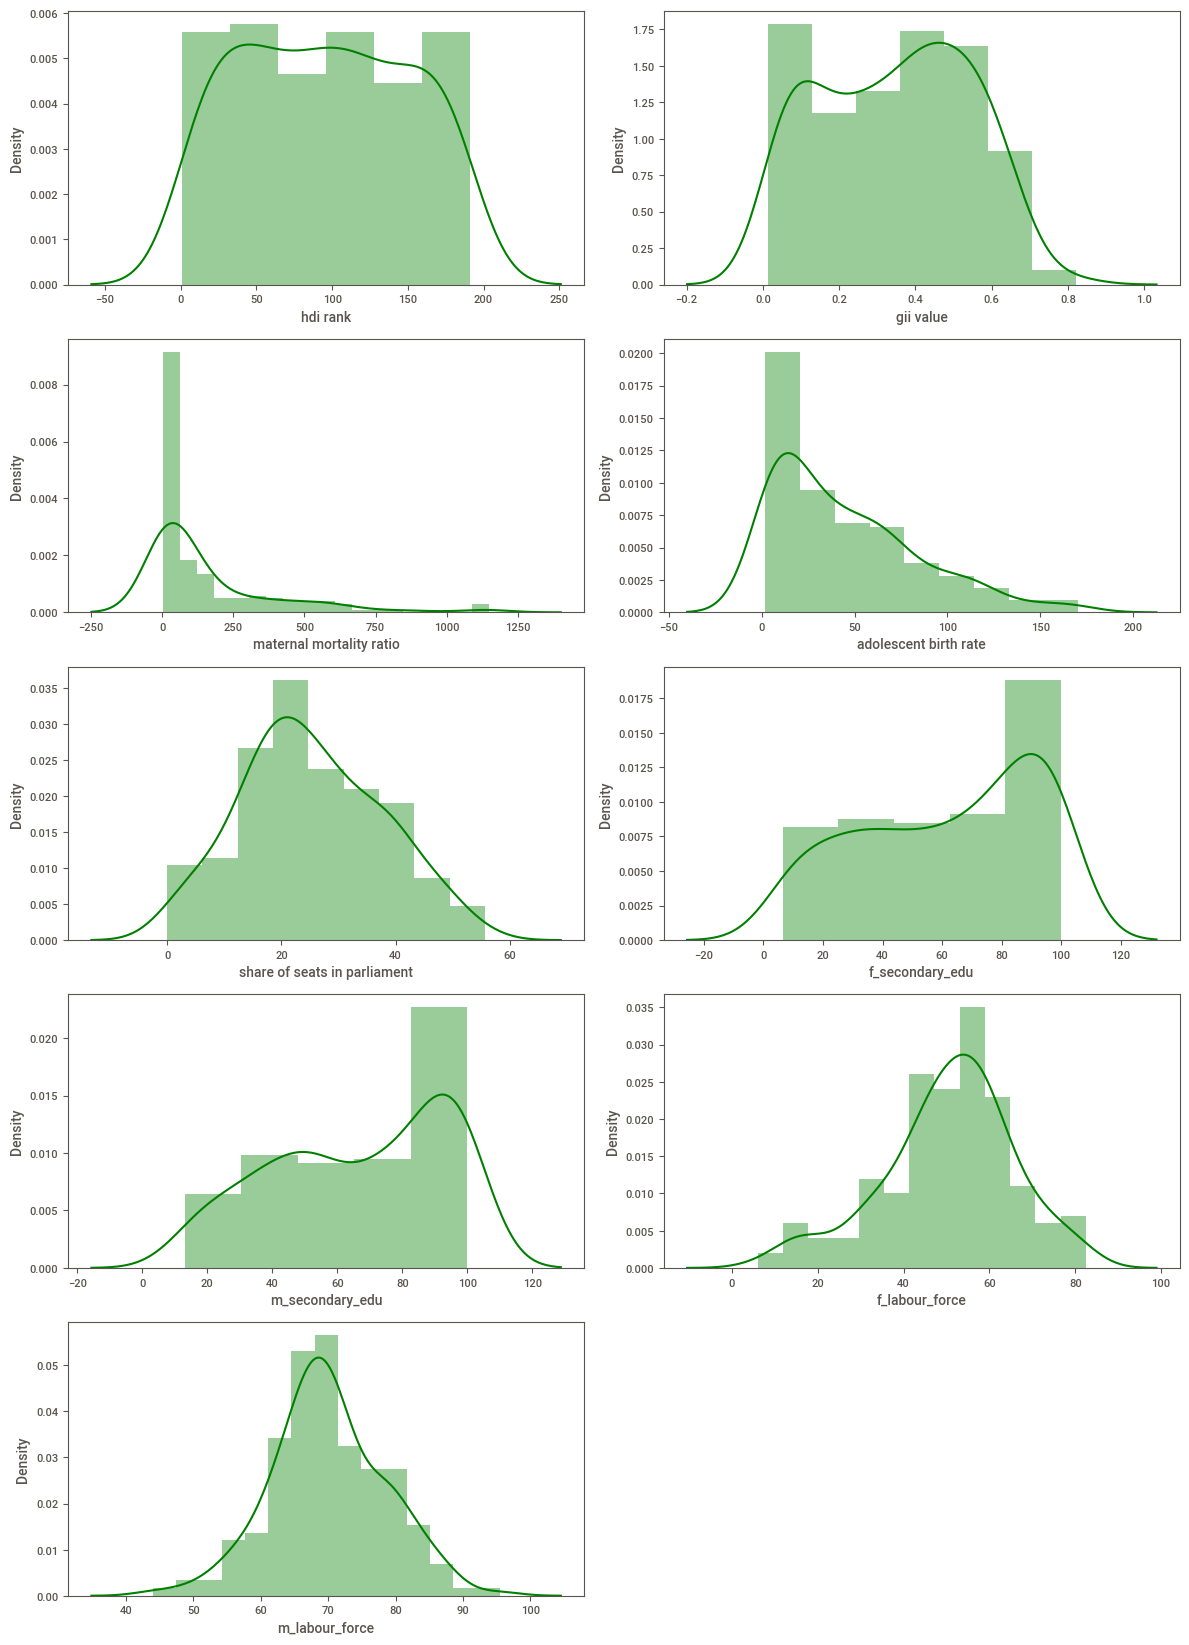

In [136]:
plt.figure(figsize=(12, 26))
for i in range(0, len(data_numerik)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df_clean[data_numerik[i]], color='green')
    plt.tight_layout()

- Dari visualisasi diatas, ditemukan bahwa data memiliki kolom yang positive skewed, negative skewed dan normal distribution.
- Kolom yang memiliki positive skewed atau Right-Skewed (Mean > Median):
> 1. maternal mortality ratio
> 2. adolescent birth rate
- Kolom yang memiliki negative skewed atau Left-Skewed (Mean < Median):
> 1. f_secondary_edu
> 2. m_secondary_edu

In [137]:
# Human Development

dv1 = df_clean.groupby(['human development'])['hdi rank'].count().to_frame().rename(columns={'hdi rank':'count'}).reset_index()
dv1

human development  count
0              High     42
1               Low     30
2            Medium     36
3         Very High     62

In [138]:
# The amount of Human Development in each category
fig = px.bar(dv1, x='human development', y='count', text='count')

# Customize the plot layout
fig.update_layout(
    title='Human Development by Count',
    xaxis_title='Human Development',
    yaxis_title='Count',
    height=400,
    width=600
)

# Add value labels to each bar
fig.update_traces(textposition='auto')

# Show the interactive plot
fig.show()


In [139]:
data = df_clean.copy()

# Create a dictionary to store the countries for each Human Development category
categories = data['human development'].unique()
country_dict = {category: [] for category in categories}

# Iterate over the rows and append countries to their respective categories
for index, row in data.iterrows():
    category = row['human development']
    country = row['country']
    country_dict[category].append(country)

# Print the countries for each Human Development category
for category, countries in country_dict.items():
    print(f"{category}:")
    print(", ".join(countries))
    print()


Very High:
Switzerland, Norway, Iceland, Australia, Denmark, Sweden, Ireland, Germany, Netherlands, Finland, Singapore, Belgium, New Zealand, Canada, Luxembourg, United Kingdom, Japan, Korea (Republic of), United States, Israel, Malta, Slovenia, Austria, United Arab Emirates, Spain, France, Cyprus, Italy, Estonia, Czechia, Greece, Poland, Bahrain, Lithuania, Saudi Arabia, Portugal, Latvia, Croatia, Chile, Qatar, Slovakia, Hungary, Argentina, Türkiye, Montenegro, Kuwait, Brunei Darussalam, Russian Federation, Romania, Oman, Bahamas, Kazakhstan, Trinidad and Tobago, Costa Rica, Uruguay, Belarus, Panama, Malaysia, Georgia, Mauritius, Serbia, Thailand

High:
Albania, Bulgaria, Barbados, Sri Lanka, Bosnia and Herzegovina, Iran (Islamic Republic of), Ukraine, North Macedonia, China, Dominican Republic, Moldova (Republic of), Cuba, Peru, Armenia, Mexico, Brazil, Colombia, Saint Vincent and the Grenadines, Maldives, Algeria, Azerbaijan, Tonga, Turkmenistan, Ecuador, Mongolia, Egypt, Tunisia, F

## 4. Menangani Outliers

In [140]:
dfo = df_clean.copy()

## 5. Bivariate Analysis

In [141]:
dv = dfo.copy()

In [142]:
country_to_region = {
    'Switzerland': 'Europe and Central Asia',
    'Norway': 'Europe and Central Asia',
    'Iceland': 'Europe and Central Asia',
    'Hong Kong, China (SAR)': 'East Asia and the Pacific',
    'Australia': 'East Asia and the Pacific',
    'Denmark': 'Europe and Central Asia',
    'Sweden': 'Europe and Central Asia',
    'Ireland': 'Europe and Central Asia',
    'Germany': 'Europe and Central Asia',
    'Netherlands': 'Europe and Central Asia',
    'Finland': 'Europe and Central Asia',
    'Singapore': 'East Asia and the Pacific',
    'Belgium': 'Europe and Central Asia',
    'New Zealand': 'East Asia and the Pacific',
    'Canada': 'North America',
    'Liechtenstein': 'Europe and Central Asia',
    'Luxembourg': 'Europe and Central Asia',
    'United Kingdom': 'Europe and Central Asia',
    'Japan': 'East Asia and the Pacific',
    'Korea (Republic of)': 'East Asia and the Pacific',
    'United States': 'North America',
    'Israel': 'Middle East and North Africa',
    'Malta': 'Europe and Central Asia',
    'Slovenia': 'Europe and Central Asia',
    'Austria': 'Europe and Central Asia',
    'United Arab Emirates': 'Middle East and North Africa',
    'Spain': 'Europe and Central Asia',
    'France': 'Europe and Central Asia',
    'Cyprus': 'Europe and Central Asia',
    'Italy': 'Europe and Central Asia',
    'Estonia': 'Europe and Central Asia',
    'Czechia': 'Europe and Central Asia',
    'Greece': 'Europe and Central Asia',
    'Poland': 'Europe and Central Asia',
    'Bahrain': 'Middle East and North Africa',
    'Lithuania': 'Europe and Central Asia',
    'Saudi Arabia': 'Middle East and North Africa',
    'Portugal': 'Europe and Central Asia',
    'Latvia': 'Europe and Central Asia',
    'Andorra': 'Europe and Central Asia',
    'Croatia': 'Europe and Central Asia',
    'Chile': 'Latin America and the Caribbean',
    'Qatar': 'Middle East and North Africa',
    'San Marino': 'Europe and Central Asia',
    'Slovakia': 'Europe and Central Asia',
    'Hungary': 'Europe and Central Asia',
    'Argentina': 'Latin America and the Caribbean',
    'Türkiye': 'Europe and Central Asia',
    'Montenegro': 'Europe and Central Asia',
    'Kuwait': 'Middle East and North Africa',
    'Brunei Darussalam': 'East Asia and the Pacific',
    'Russian Federation': 'Europe and Central Asia',
    'Romania': 'Europe and Central Asia',
    'Oman': 'Middle East and North Africa',
    'Bahamas': 'Latin America and the Caribbean',
    'Kazakhstan': 'Europe and Central Asia',
    'Trinidad and Tobago': 'Latin America and the Caribbean',
    'Costa Rica': 'Latin America and the Caribbean',
    'Uruguay': 'Latin America and the Caribbean',
    'Belarus': 'Europe and Central Asia',
    'Panama': 'Latin America and the Caribbean',
    'Malaysia': 'East Asia and the Pacific',
    'Georgia': 'Europe and Central Asia',
    'Mauritius': 'Sub-Saharan Africa',
    'Serbia': 'Europe and Central Asia',
    'Thailand': 'East Asia and the Pacific',
    'Albania': 'Europe and Central Asia',
    'Bulgaria': 'Europe and Central Asia',
    'Grenada': 'Latin America and the Caribbean',
    'Barbados': 'Latin America and the Caribbean',
    'Antigua and Barbuda': 'Latin America and the Caribbean',
    'Seychelles': 'Sub-Saharan Africa',
    'Sri Lanka': 'South Asia',
    'Bosnia and Herzegovina': 'Europe and Central Asia',
    'Saint Kitts and Nevis': 'Latin America and the Caribbean',
    'Iran (Islamic Republic of)': 'Middle East and North Africa',
    'Ukraine': 'Europe and Central Asia',
    'North Macedonia': 'Europe and Central Asia',
    'China': 'East Asia and the Pacific',
    'Dominican Republic': 'Latin America and the Caribbean',
    'Moldova (Republic of)': 'Europe and Central Asia',
    'Palau': 'East Asia and the Pacific',
    'Cuba': 'Latin America and the Caribbean',
    'Peru': 'Latin America and the Caribbean',
    'Armenia': 'Europe and Central Asia',
    'Mexico': 'Latin America and the Caribbean',
    'Brazil': 'Latin America and the Caribbean',
    'Colombia': 'Latin America and the Caribbean',
    'Saint Vincent and the Grenadines': 'Latin America and the Caribbean',
    'Maldives': 'South Asia',
    'Algeria': 'Middle East and North Africa',
    'Azerbaijan': 'Europe and Central Asia',
    'Tonga': 'East Asia and the Pacific',
    'Turkmenistan': 'Europe and Central Asia',
    'Ecuador': 'Latin America and the Caribbean',
    'Mongolia': 'East Asia and the Pacific',
    'Egypt': 'Middle East and North Africa',
    'Tunisia': 'Middle East and North Africa',
    'Fiji': 'East Asia and the Pacific',
    'Suriname': 'Latin America and the Caribbean',
    'Uzbekistan': 'Europe and Central Asia',
    'Dominica': 'Latin America and the Caribbean',
    'Jordan': 'Middle East and North Africa',
    'Libya': 'Middle East and North Africa',
    'Paraguay': 'Latin America and the Caribbean',
    'Palestine, State of': 'Middle East and North Africa',
    'Saint Lucia': 'Latin America and the Caribbean',
    'Guyana': 'Latin America and the Caribbean',
    'South Africa': 'Sub-Saharan Africa',
    'Jamaica': 'Latin America and the Caribbean',
    'Samoa': 'East Asia and the Pacific',
    'Gabon': 'Sub-Saharan Africa',
    'Lebanon': 'Middle East and North Africa',
    'Indonesia': 'East Asia and the Pacific',
    'Viet Nam': 'East Asia and the Pacific',
    'Philippines': 'East Asia and the Pacific',
    'Botswana': 'Sub-Saharan Africa',
    'Bolivia (Plurinational State of)': 'Latin America and the Caribbean',
    'Kyrgyzstan': 'Europe and Central Asia',
    'Venezuela (Bolivarian Republic of)': 'Latin America and the Caribbean',
    'Iraq': 'Middle East and North Africa',
    'Tajikistan': 'Europe and Central Asia',
    'Belize': 'Latin America and the Caribbean',
    'Morocco': 'Middle East and North Africa',
    'El Salvador': 'Latin America and the Caribbean',
    'Nicaragua': 'Latin America and the Caribbean',
    'Bhutan': 'South Asia',
    'Cabo Verde': 'Sub-Saharan Africa',
    'Bangladesh': 'South Asia',
    'Tuvalu': 'East Asia and the Pacific',
    'Marshall Islands': 'East Asia and the Pacific',
    'India': 'South Asia',
    'Ghana': 'Sub-Saharan Africa',
    'Micronesia (Federated States of)': 'East Asia and the Pacific',
    'Guatemala': 'Latin America and the Caribbean',
    'Kiribati': 'East Asia and the Pacific',
    'Honduras': 'Latin America and the Caribbean',
    'Sao Tome and Principe': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    "Lao People's Democratic Republic": 'East Asia and the Pacific',
    'Timor-Leste': 'East Asia and the Pacific',
    'Vanuatu': 'East Asia and the Pacific',
    'Nepal': 'South Asia',
    'Eswatini (Kingdom of)': 'Sub-Saharan Africa',
    'Equatorial Guinea': 'Sub-Saharan Africa',
    'Cambodia': 'East Asia and the Pacific',
    'Zimbabwe': 'Sub-Saharan Africa',
    'Angola': 'Sub-Saharan Africa',
    'Myanmar': 'East Asia and the Pacific',
    'Syrian Arab Republic': 'Middle East and North Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Congo': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Solomon Islands': 'East Asia and the Pacific',
    'Comoros': 'Sub-Saharan Africa',
    'Papua New Guinea': 'East Asia and the Pacific',
    'Mauritania': 'Sub-Saharan Africa',
    "Côte d'Ivoire": 'Sub-Saharan Africa',
    'Tanzania (United Republic of)': 'Sub-Saharan Africa',
    'Pakistan': 'South Asia',
    'Togo': 'Sub-Saharan Africa',
    'Haiti': 'Latin America and the Caribbean',
    'Nigeria': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Djibouti': 'Middle East and North Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Eritrea': 'Sub-Saharan Africa',
    'Guinea-Bissau': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Congo (Democratic Republic of the)': 'Sub-Saharan Africa',
    'Afghanistan': 'South Asia',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Yemen': 'Middle East and North Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Timor-Leste': 'East Asia and the Pacific',
    'Unknown': 'Unknown'
}

dv['region'] = dv['country'].map(country_to_region)


In [143]:
import plotly.express as px

fig = px.scatter(dv, x='maternal mortality ratio', y='adolescent birth rate', color='region', hover_name='country')
fig.update_layout(
    title='Maternal Mortality Ratio vs Adolescent Birth Rate',
    xaxis_title='Maternal Mortality Ratio',
    yaxis_title='Adolescent Birth Rate'
)
fig.show()

Berdasarkan visualisasi diatas, dapat dilihat bahwa maternal mortality ratio yang merupakan jumlah kematian yang disebabkan oleh faktor terkait kehamilan dan adolescent birth rate yang merupakan jumlah kelahiran yang terjadi pada perempuan usia 15-19 tahun memiliki korelasi yang berbanding lurus. Secara garis besar, apabila jumlah maternal mortality ratio tinggi maka jumlah Adolescent birth rate pun akan tinggi. 

Dalam kasus ini, jumlah kehamilan remaja dan kematian yang disebabkan oleh faktor terkait kehamilan rendah secara garis besar di beberapa negara jumlahnya rendah pada tahun 2021. Namun apabila dilihat dari regionnya, **Sub-Saharan Africa** masih memiliki jumlah kematian dan kelahiran remaja yang tinggi di tahun 2021 dan region yang memiliki jumlah terendah adalah **Europe & Central Asia**.

In [144]:
fig = px.scatter(dv, x='gii value', y='adolescent birth rate', color='human development')

fig.update_layout(
    title='GII Value vs Adolescent Birth Rate',
    xaxis_title='GII Value',
    yaxis_title='Adolescent Birth Rate'
)

fig.show()


Dari grafik diatas diperoleh beberapa insights:
- Nilai GII dan angka kelahiran remaja (Adolescent Birth Rate) memiliki korelasi berbanding lurus, yang berarti apabila nilai gii meningkat maka akan mempengaruhi peningkatan angka kelahiran remaja.
- Kategori human development 'very high' tentunya memiliki nilai GII dan angka kelahiran remaja yang rendah karena negara-negara dengan kategori ini memiliki akses yang luas terhadap pendidikan, pelayanan kesehatan, dan standar hidup yang tinggi. Begitu juga sebaliknya, terhadap kategori human development 'low'.

In [145]:
fig = px.choropleth(dv, locations='country', locationmode='country names', color='human development',
                    hover_data=['human development', 'region'], title='Human Development Index by Country')

fig.update_layout(
    title='Human Development Index by Country',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig.show()

In [146]:
fig = px.choropleth(dv, locations='country', locationmode='country names', color='gii value',
                    hover_data=['gii value', 'region'], title='Gender Inequality Index by Country',
                    color_continuous_scale='Viridis')

fig.update_layout(
    title='Gender Inequality Index by Country',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig.show()

In [147]:
# Sorting the data by GII value in descending order
sorted_data = dv.sort_values('gii value', ascending=False)

fig = px.bar(sorted_data, x='gii value', y='country', orientation='h', title='GII Value by Country (Descending Order)')
fig.update_layout(xaxis_title='GII Value', yaxis_title='Country')
fig.show()

In [148]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dv['country'], y=dv['f_labour_force'], mode='lines', name='Female Labor Force'))
fig.add_trace(go.Scatter(x=dv['country'], y=dv['m_labour_force'], mode='lines', name='Male Labor Force'))
fig.update_layout(title='Trend of Female and Male Labor Force Participation',
                  xaxis_title='Country', yaxis_title='Labor Force Participation')
fig.show()

Berdasarkan grafik diatas, dapat dilihat bahwa proporsi penduduk usia kerja (usia 15 tahun ke atas) yang terlibat dalam pasar tenaga kerja, baik dengan bekerja atau mencari pekerjaan pada tahun 2021 di dominasi jumlahnya oleh laki-laki. Secara garis besar, dapat dilihat bahwa ada ketimpangan dalam jumlah persentase partisipasi angkatan kerja. Nilai persentase paling rendah dimiliki oleh female labour negara Yemen sebesar 5.9. Sedangkan persentase tertinggi dimiliki oleh male labour negara Qatar sebesar 95.4.

In [149]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dv['country'], y=dv['f_secondary_edu'], mode='lines', name='Female Secondary Education'))
fig.add_trace(go.Scatter(x=dv['country'], y=dv['m_secondary_edu'], mode='lines', name='Male Secondary Education'))
fig.update_layout(title='Trend of Female and Male Secondary Education Participation',
                  xaxis_title='Country', yaxis_title='Secondary Education Participation')
fig.show()

Berdasarkan grafik diatas dapat dilihan bahwa secara garis besar di semua negara, perempuan yang memiliki pendidikan menengah (secondary education) jumlahnya lebih sedikit hingga menyamai jumlah laki-laki yang memiliki pendidikan tersebut. Secondary education disini merujuk pada tingkat pendidikan yang berada di antara pendidikan dasar (misalnya, SD atau MI) dan pendidikan tinggi (seperti perguruan tinggi atau universitas). Biasanya, pendidikan menengah mencakup jenjang pendidikan seperti SMP atau MTs, SMA atau MA, dan sejenisnya. Penduduk yang memiliki setidaknya pendidikan menengah berarti mereka telah menyelesaikan atau mencapai tingkat pendidikan di atas pendidikan dasar, tetapi belum mencapai tingkat pendidikan tinggi.

Walaupun secara garis besar kedua gender hampir memiliki jumlah pendidikan menengah kurang lebih mendekati sama, namun yang menarik dari grafik ini adalah ketimpangan pendidikan menengah anttara female dan male di negara Congo. Yang mana jumlah laki-laki yang menempuh pendidikan menengah memiliki persentase sebesar 69.1 dan perempuan hanya sebesar 40.2.

## 6. Multivariate Analysis

In [150]:
import plotly.express as px

fig = px.scatter(dv, x='gii value', y='maternal mortality ratio', color='region',
                 title='GII Value vs Maternal Mortality Ratio by Region')
fig.update_layout(xaxis_title='GII Value', yaxis_title='Maternal Mortality Ratio')
fig.show()


- GII value merupakan sebuah ukuran gabungan yang mencerminkan ketidaksetaraan dalam pencapaian antara perempuan dan laki-laki dalam tiga dimensi: kesehatan reproduksi, pemberdayaan, dan pasar tenaga kerja. GII value memiliki rentang 0-1. Dimana apabila mendekati 1 maka negara atau region tersebut memiliki persentase ketimpangan antar 2 gender. Maka makin mendekati 0 maka negara tersebut makin equal kesempatan yang diperoleh antar 2 gender.
- Berdasarkan visualisasi diatas, dapat dilihat bahwa maternal mortality ratio yang merupakan jumlah kematian yang disebabkan oleh faktor terkait kehamilan dan GII Value memiliki korelasi yang berbanding lurus. Secara garis besar, apabila jumlah maternal mortality ratio tinggi maka GII Value pun akan tinggi.
- Region Europe & Central Asia memiliki negarra-negara yang ketimpangannya paling rendah karena sedikitnya jumlah kehamilan remaja dan GII value. Sebaliknya, untuk region Sub-Saharan Africa memiliki ketimpanganyang paling tinggi berdasarkan plot diatas.

In [151]:
# LABEL ENCODING
dmv = dv.copy()

#human development
mapping_hd = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High': 3
}
dmv['human development'] = dv['human development'].map(mapping_hd)

In [152]:
columns_to_exclude = ['hdi rank', 'country', 'region']  # Kolom yang ingin dikecualikan

# Menghapus kolom yang tidak diinginkan dari DataFrame
corr_matrix = dmv.drop(columns=columns_to_exclude).corr()

fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  colorscale='RdBu',
                                  annotation_text=corr_matrix.round(2).values,
                                  showscale=True)
fig.update_layout(
    xaxis_tickangle=-55,
    yaxis_tickangle=0,
    width=700,
    height=700,
)
fig.show()

Berdasarkan heatmap diatas, ada beberapa fitur target yang memiliki korelasi yang tinggi (>0.7) dengan fitur target human development, diantaranya:
1. Fitur-fitur yang memiliki hubungan negatif dengan fitur target yang menunjukkan bahwa apabila fitur target nilainya meningkat maka fitur ini nilainya akan menurun:
    - human development dan gii value: -0.86
    - human development dan maternal mortality ratio: -0.88
    - human development dan adolescent birth rate: -0.79
    
   ***Semakin rendah nilai 3 fitur tersebut (gii value, maternal mortality ratio, adolescent birth rate) maka human development pun akan semakin bagus***


2. Fitur-fitur yang memiliki hubungan positif dengan fitur target, yang mana sifatnya berbanding lurus. Jika nilai fitur target meningkat, maka nilai fitur tersebut juka akan meningkat:
    - human development dan f_secondary_edu: 0.84
    - human development dan m_secondary_edu: 0.8

In [153]:
dft = dmv.copy()

## 7. Feature Encoding

In [154]:
dfe = dft.copy()
dfe.head()

hdi rank      country  human development  gii value  \
0         1  Switzerland                  3      0.018   
1         2       Norway                  3      0.016   
2         3      Iceland                  3      0.043   
4         5    Australia                  3      0.073   
5         6      Denmark                  3      0.013   

   maternal mortality ratio  adolescent birth rate  \
0                         5                  2.212   
1                         2                  2.336   
2                         4                  5.395   
4                         6                  8.096   
5                         4                  1.908   

   share of seats in parliament  f_secondary_edu  m_secondary_edu  \
0                     39.837398        96.858673        97.533417   
1                     44.970414        99.094223        99.283562   
2                     47.619048        99.768417        99.662552   
4                     37.885463        94.580063        94.430069   
5                     39.664804        95.067261        95.238098   

   f_labour_force  m_labour_force                     region  
0          61.728          72.705    Europe and Central Asia  
1          60.294          71.950    Europe and Central Asia  
2          61.671          70.463    Europe and Central Asia  
4          61.057          70.547  East Asia and the Pacific  
5          57.721          66.653    Europe and Central Asia

In [155]:
dfe['region'].value_counts()

Europe and Central Asia            49
Sub-Saharan Africa                 43
Latin America and the Caribbean    29
East Asia and the Pacific          21
Middle East and North Africa       18
South Asia                          8
North America                       2
Name: region, dtype: int64

In [156]:
# One Hot Encoding

onehots = pd.get_dummies(dfe['region'], prefix='region')
dfe = dfe.join(onehots)

In [157]:
dfe.head()

hdi rank      country  human development  gii value  \
0         1  Switzerland                  3      0.018   
1         2       Norway                  3      0.016   
2         3      Iceland                  3      0.043   
4         5    Australia                  3      0.073   
5         6      Denmark                  3      0.013   

   maternal mortality ratio  adolescent birth rate  \
0                         5                  2.212   
1                         2                  2.336   
2                         4                  5.395   
4                         6                  8.096   
5                         4                  1.908   

   share of seats in parliament  f_secondary_edu  m_secondary_edu  \
0                     39.837398        96.858673        97.533417   
1                     44.970414        99.094223        99.283562   
2                     47.619048        99.768417        99.662552   
4                     37.885463        94.580063        94.430069   
5                     39.664804        95.067261        95.238098   

   f_labour_force  m_labour_force                     region  \
0          61.728          72.705    Europe and Central Asia   
1          60.294          71.950    Europe and Central Asia   
2          61.671          70.463    Europe and Central Asia   
4          61.057          70.547  East Asia and the Pacific   
5          57.721          66.653    Europe and Central Asia   

   region_East Asia and the Pacific  region_Europe and Central Asia  \
0                                 0                               1   
1                                 0                               1   
2                                 0                               1   
4                                 1                               0   
5                                 0                               1   

   region_Latin America and the Caribbean  \
0                                       0   
1                                       0   
2                                       0   
4                                       0   
5                                       0   

   region_Middle East and North Africa  region_North America  \
0                                    0                     0   
1                                    0                     0   
2                                    0                     0   
4                                    0                     0   
5                                    0                     0   

   region_South Asia  region_Sub-Saharan Africa  
0                  0                          0  
1                  0                          0  
2                  0                          0  
4                  0                          0  
5                  0                          0

In [158]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 190
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   hdi rank                                170 non-null    int64  
 1   country                                 170 non-null    object 
 2   human development                       170 non-null    int64  
 3   gii value                               170 non-null    float64
 4   maternal mortality ratio                170 non-null    int64  
 5   adolescent birth rate                   170 non-null    float64
 6   share of seats in parliament            170 non-null    float64
 7   f_secondary_edu                         170 non-null    float64
 8   m_secondary_edu                         170 non-null    float64
 9   f_labour_force                          170 non-null    float64
 10  m_labour_force                          170 non-null    float6

In [159]:
# Drop kolom yang tidak diperlukan

df_drop = dfe.drop(columns=['hdi rank', 'country', 'region'])

In [160]:
df_drop.head()

human development  gii value  maternal mortality ratio  \
0                  3      0.018                         5   
1                  3      0.016                         2   
2                  3      0.043                         4   
4                  3      0.073                         6   
5                  3      0.013                         4   

   adolescent birth rate  share of seats in parliament  f_secondary_edu  \
0                  2.212                     39.837398        96.858673   
1                  2.336                     44.970414        99.094223   
2                  5.395                     47.619048        99.768417   
4                  8.096                     37.885463        94.580063   
5                  1.908                     39.664804        95.067261   

   m_secondary_edu  f_labour_force  m_labour_force  \
0        97.533417          61.728          72.705   
1        99.283562          60.294          71.950   
2        99.662552          61.671          70.463   
4        94.430069          61.057          70.547   
5        95.238098          57.721          66.653   

   region_East Asia and the Pacific  region_Europe and Central Asia  \
0                                 0                               1   
1                                 0                               1   
2                                 0                               1   
4                                 1                               0   
5                                 0                               1   

   region_Latin America and the Caribbean  \
0                                       0   
1                                       0   
2                                       0   
4                                       0   
5                                       0   

   region_Middle East and North Africa  region_North America  \
0                                    0                     0   
1                                    0                     0   
2                                    0                     0   
4                                    0                     0   
5                                    0                     0   

   region_South Asia  region_Sub-Saharan Africa  
0                  0                          0  
1                  0                          0  
2                  0                          0  
4                  0                          0  
5                  0                          0

In [161]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 190
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   human development                       170 non-null    int64  
 1   gii value                               170 non-null    float64
 2   maternal mortality ratio                170 non-null    int64  
 3   adolescent birth rate                   170 non-null    float64
 4   share of seats in parliament            170 non-null    float64
 5   f_secondary_edu                         170 non-null    float64
 6   m_secondary_edu                         170 non-null    float64
 7   f_labour_force                          170 non-null    float64
 8   m_labour_force                          170 non-null    float64
 9   region_East Asia and the Pacific        170 non-null    uint8  
 10  region_Europe and Central Asia          170 non-null    uint8 

## 9. Data Modeling

Berikut adalah penjelasan mengenai accuracy, precision, recall, dan F1 score beserta rentang nilai yang umum digunakan:

1. Accuracy (Akurasi):
    - Akurasi mengukur sejauh mana model dapat memprediksi dengan benar kelas-kelas pada data uji.
    - Rentang nilai: antara 0 dan 1, di mana 1 berarti prediksi sempurna dan 0 berarti prediksi tidak benar sama sekali.
    - Semakin tinggi nilai akurasi, semakin baik model dapat memprediksi dengan benar.


2. Precision (Presisi):
    - Presisi mengukur sejauh mana model memberikan prediksi yang benar untuk setiap kelas secara rata-rata.
    - Rentang nilai: antara 0 dan 1, di mana 1 menunjukkan presisi sempurna dan 0 menunjukkan presisi yang buruk.
    - Semakin tinggi nilai presisi, semakin baik model dalam memberikan prediksi yang benar untuk kelas tertentu.


3. Recall (Recall atau Sensitivitas):
    - Recall mengukur sejauh mana model dapat menemukan kembali (mendeteksi) semua contoh kelas yang relevan secara rata-rata.
    - Rentang nilai: antara 0 dan 1, di mana 1 menunjukkan recall sempurna dan 0 menunjukkan recall yang buruk.
    - Semakin tinggi nilai recall, semakin baik model dalam mendeteksi contoh-contoh kelas yang relevan.


4. F1 Score:
    - F1 score adalah ukuran yang menggabungkan presisi dan recall menjadi satu skor yang menyajikan keseimbangan antara keduanya secara rata-rata.
    - Rentang nilai: antara 0 dan 1, di mana 1 menunjukkan F1 score yang baik dan 0 menunjukkan F1 score yang buruk.
    - F1 score menggabungkan presisi dan recall, sehingga cocok digunakan saat ada ketidakseimbangan antara kelas positif dan negatif.

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [163]:
dm = df_drop.copy()

In [164]:
X = dm.drop(columns=['human development'])
y = dm['human development']

In [165]:
print("Unscaled Data: \n")
display(X)  #Unscaled data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Scaled Data: \n")
display(X)  #Scaled input data

Unscaled Data: 



gii value  maternal mortality ratio  adolescent birth rate  \
0        0.018                         5                  2.212   
1        0.016                         2                  2.336   
2        0.043                         4                  5.395   
4        0.073                         6                  8.096   
5        0.013                         4                  1.908   
..         ...                       ...                    ...   
186      0.505                       548                 53.621   
187      0.672                       829                160.507   
188      0.611                       509                170.462   
189      0.652                      1140                138.306   
190      0.587                      1150                 99.199   

     share of seats in parliament  f_secondary_edu  m_secondary_edu  \
0                       39.837398        96.858673        97.533417   
1                       44.970414        99.094223        99.283562   
2                       47.619048        99.768417        99.662552   
4                       37.885463        94.580063        94.430069   
5                       39.664804        95.067261        95.238098   
..                            ...              ...              ...   
186                     38.888889         7.799910        13.046886   
187                     12.857143        13.940000        31.560000   
188                     25.903614         9.163242        15.232771   
189                     32.258065         7.739064        24.369996   
190                     32.334385        26.537640        36.357239   

     f_labour_force  m_labour_force  region_East Asia and the Pacific  \
0            61.728          72.705                                 0   
1            60.294          71.950                                 0   
2            61.671          70.463                                 0   
4            61.057          70.547                                 1   
5            57.721          66.653                                 0   
..              ...             ...                               ...   
186          78.991          77.379                                 0   
187          63.312          79.486                                 0   
188          61.730          84.267                                 0   
189          46.914          69.927                                 0   
190          70.440          73.574                                 0   

     region_Europe and Central Asia  region_Latin America and the Caribbean  \
0                                 1                                       0   
1                                 1                                       0   
2                                 1                                       0   
4                                 0                                       0   
5                                 1                                       0   
..                              ...                                     ...   
186                               0                                       0   
187                               0                                       0   
188                               0                                       0   
189                               0                                       0   
190                               0                                       0   

     region_Middle East and North Africa  region_North America  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
4                                      0                     0   
5                                      0                     0   
..                                   ...                   ...   
186                                    0                   

Scaled Data: 



array([[-1.66074007, -0.65212685, -1.09286104, ..., -0.10910895,
        -0.22222222, -0.58187858],
       [-1.6709169 , -0.66498186, -1.0896823 , ..., -0.10910895,
        -0.22222222, -0.58187858],
       [-1.5335296 , -0.65641186, -1.01126487, ..., -0.10910895,
        -0.22222222, -0.58187858],
       ...,
       [ 1.3566921 ,  1.50751403,  3.22022581, ..., -0.10910895,
        -0.22222222,  1.71857161],
       [ 1.56531725,  4.21135013,  2.39590711, ..., -0.10910895,
        -0.22222222,  1.71857161],
       [ 1.23457005,  4.25420014,  1.39339961, ..., -0.10910895,
        -0.22222222,  1.71857161]])

In [166]:
# Set random seed for reproducibility
np.random.seed(42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [209]:
# Tentukan hyperparameter yang akan dituning
param_grid = {
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [50, 100, 150],
}

# Buat objek RandomForestClassifier
RFmodel = RandomForestClassifier()

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=RFmodel, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan tuning pada data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Mengevaluasi model dengan hyperparameter terbaik
best_RFmodel = grid_search.best_estimator_
accuracy = best_RFmodel.score(X_test, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 100}
Accuracy: 0.7058823529411765


In [223]:
# Membuat objek RandomForestClassifier dengan parameter yang telah ditentukan
RFmodel1 = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=10, n_estimators=50)
RFmodel1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=10,
                       n_estimators=50)

#### Train Data (RFC)

In [224]:
y_predrf = RFmodel1.predict(X_train)

In [225]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_train, y_predrf))
print('Precision:', precision_score(y_train, y_predrf, average='weighted'))
print('Recall:', recall_score(y_train, y_predrf, average='weighted'))
print('F1 Score:', f1_score(y_train, y_predrf, average='weighted'))

Accuracy: 0.9117647058823529
Precision: 0.9133729770494476
Recall: 0.9117647058823529
F1 Score: 0.9112695820980451


#### Test Data (RFC)

In [226]:
ytest_predrf = RFmodel1.predict(X_test)

In [227]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_test, ytest_predrf))
print('Precision:', precision_score(y_test, ytest_predrf, average='weighted'))
print('Recall:', recall_score(y_test, ytest_predrf, average='weighted'))
print('F1 Score:', f1_score(y_test, ytest_predrf, average='weighted'))

Accuracy: 0.7647058823529411
Precision: 0.8186274509803922
Recall: 0.7647058823529411
F1 Score: 0.7631016042780748


In [228]:
df_rf = pd.DataFrame({'Actual': y_test, 'predicted': ytest_predrf})
df_rf.head()

Actual  predicted
158       1          0
32        3          3
132       1          1
31        3          3
163       0          0

### XGBoost Classifier

In [175]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Menentukan hyperparameter yang akan dituning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Membuat objek XGBClassifier
XGBmodel = xgb.XGBClassifier()

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=XGBmodel, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

# Melakukan tuning pada data training
random_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Best Hyperparameters:")
print(random_search.best_params_)

# Mengevaluasi model dengan hyperparameter terbaik
best_XGBmodel = random_search.best_estimator_
accuracy = best_XGBmodel.score(X_test, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.6470588235294118


In [176]:
from xgboost import XGBClassifier

XGmodel= XGBClassifier(gamma= 0, reg_alpha= 1, max_depth= 7, learning_rate= 0.1)
XGmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [253]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.01, gamma=0.1, reg_alpha=0.5, reg_lambda=0.5)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### Train Data (XGB)

In [254]:
y_predxgb = xgb_model.predict(X_train)

In [255]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_train, y_predxgb))
print('Precision:', precision_score(y_train, y_predxgb, average='weighted'))
print('Recall:', recall_score(y_train, y_predxgb, average='weighted'))
print('F1 Score:', f1_score(y_train, y_predxgb, average='weighted'))

Accuracy: 0.9558823529411765
Precision: 0.9584276018099547
Recall: 0.9558823529411765
F1 Score: 0.95560041009868


#### Test Data (XGB)

In [256]:
ytest_predxgb = xgb_model.predict(X_test)

In [257]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_test, ytest_predxgb))
print('Precision:', precision_score(y_test, ytest_predxgb, average='weighted'))
print('Recall:', recall_score(y_test, ytest_predxgb, average='weighted'))
print('F1 Score:', f1_score(y_test, ytest_predxgb, average='weighted'))

Accuracy: 0.7352941176470589
Precision: 0.7622549019607843
Recall: 0.7352941176470589
F1 Score: 0.7358288770053476


In [258]:
df_xgb = pd.DataFrame({'Actual': y_test, 'predicted': ytest_predxgb})
df_xgb.head()

Actual  predicted
158       1          0
32        3          3
132       1          1
31        3          3
163       0          0

### K-Nearest Neighbors (KNN)

In [329]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Menentukan hyperparameter yang akan dituning
param_grid = {
    'n_neighbors': [1, 3, 5],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['manhattan', 'chebyshev', 'mahalanobis']
}

# Membuat objek KNeighborsClassifier
KNNmodel = KNeighborsClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan tuning pada data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Best Hyperparameters for KNN:")
print(grid_search.best_params_)

# Mengevaluasi model dengan hyperparameter terbaik
best_KNNmodel = grid_search.best_estimator_
accuracy = best_KNNmodel.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Hyperparameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.6764705882352942


In [319]:
knn_model = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='braycurtis')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='braycurtis', n_neighbors=7)

#### Train Data (KNN)

In [330]:
y_predknn = best_KNNmodel.predict(X_train)

In [331]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_train, y_predknn))
print('Precision:', precision_score(y_train, y_predknn, average='weighted'))
print('Recall:', recall_score(y_train, y_predknn, average='weighted'))
print('F1 Score:', f1_score(y_train, y_predknn, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Test Data (KNN)

In [332]:
ytest_predknn = best_KNNmodel.predict(X_test)

In [333]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_test, ytest_predknn))
print('Precision:', precision_score(y_test, ytest_predknn, average='weighted'))
print('Recall:', recall_score(y_test, ytest_predknn, average='weighted'))
print('F1 Score:', f1_score(y_test, ytest_predknn, average='weighted'))

Accuracy: 0.6764705882352942
Precision: 0.739437441643324
Recall: 0.6764705882352942
F1 Score: 0.6335839765770562


In [334]:
df_knn = pd.DataFrame({'Actual': y_test, 'predicted': ytest_predknn})
df_knn.head()

Actual  predicted
158       1          0
32        3          3
132       1          0
31        3          3
163       0          0

## Decision Tree Classifier

In [189]:
from sklearn.tree import DecisionTreeClassifier

# Menentukan hyperparameter yang akan dituning
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10, 15],  # Jumlah minimum sampel untuk split
    'max_features': ['auto', 'sqrt', 'log2']  # Jumlah fitur yang digunakan
}

# Membuat objek DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=DTmodel, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan tuning pada data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Best Hyperparameters for Decision Tree:")
print(grid_search.best_params_)

# Mengevaluasi model dengan hyperparameter terbaik
best_DTmodel = grid_search.best_estimator_
accuracy = best_DTmodel.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Hyperparameters for Decision Tree:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5}
Accuracy: 0.6470588235294118


In [362]:
DTmodel= DecisionTreeClassifier(max_depth=5, min_samples_split=5)
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

#### Train Data (DT)

In [363]:
y_preddt = DTmodel.predict(X_train)

In [364]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_train, y_preddt))
print('Precision:', precision_score(y_train, y_preddt, average='weighted'))
print('Recall:', recall_score(y_train, y_preddt, average='weighted'))
print('F1 Score:', f1_score(y_train, y_preddt, average='weighted'))

Accuracy: 0.9411764705882353
Precision: 0.9412489412489412
Recall: 0.9411764705882353
F1 Score: 0.9408567314919521


#### Test Data (DT)

In [365]:
ytest_preddt = DTmodel.predict(X_test)

In [366]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_test, ytest_preddt))
print('Precision:', precision_score(y_test, ytest_preddt, average='weighted'))
print('Recall:', recall_score(y_test, ytest_preddt, average='weighted'))
print('F1 Score:', f1_score(y_test, ytest_preddt, average='weighted'))

Accuracy: 0.7058823529411765
Precision: 0.7504901960784314
Recall: 0.7058823529411765
F1 Score: 0.7128687252026911


In [369]:
df_dt = pd.DataFrame({'Actual': y_test, 'predicted': ytest_preddt})
df_dt.head()

Actual  predicted
158       1          0
32        3          3
132       1          2
31        3          3
163       0          1

### MLPClassifier

In [340]:
from sklearn.neural_network import MLPClassifier

# Menentukan hyperparameter yang akan dituning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Membuat objek MLPClassifier
MLPmodel = MLPClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=MLPmodel, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan tuning pada data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Best Hyperparameters for MLPClassifier:")
print(grid_search.best_params_)

# Mengevaluasi model dengan hyperparameter terbaik
best_MLPmodel = grid_search.best_estimator_
accuracy = best_MLPmodel.score(X_test, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters for MLPClassifier:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy: 0.6470588235294118


In [335]:
mlp_model = MLPClassifier(hidden_layer_sizes=(25, 25), 
                          activation='tanh', 
                          solver='lbfgs', 
                          alpha=0.01, 
                          learning_rate='adaptive')
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(25, 25),
              learning_rate='adaptive', solver='lbfgs')

#### Train Data (MLP)

In [341]:
y_predmlp = best_MLPmodel.predict(X_train)

In [342]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_train, y_predmlp))
print('Precision:', precision_score(y_train, y_predmlp, average='weighted'))
print('Recall:', recall_score(y_train, y_predmlp, average='weighted'))
print('F1 Score:', f1_score(y_train, y_predmlp, average='weighted'))

Accuracy: 0.8823529411764706
Precision: 0.8834021942110176
Recall: 0.8823529411764706
F1 Score: 0.8804529165659599


#### Test Data (MLP)

In [350]:
ytest_predmlp = best_MLPmodel.predict(X_test)

In [344]:
# Menghitung metrik evaluasi
print('Accuracy:', accuracy_score(y_test, ytest_predmlp))
print('Precision:', precision_score(y_test, ytest_predmlp, average='weighted'))
print('Recall:', recall_score(y_test, ytest_predmlp, average='weighted'))
print('F1 Score:', f1_score(y_test, ytest_predmlp, average='weighted'))

Accuracy: 0.6470588235294118
Precision: 0.6485294117647059
Recall: 0.6470588235294118
F1 Score: 0.6442577030812325


In [351]:
df_mlp = pd.DataFrame({'Actual': y_test, 'predicted': ytest_predmlp})
df_mlp.head()

Actual  predicted
158       1          0
32        3          3
132       1          1
31        3          3
163       0          0

# 10. Prediction

In [370]:
# Membuat data baru untuk prediksi
new_data = np.array([[0.8, 1000, 30, 0.6, 0.7, 0.5, 0.6, 1, 0, 0, 1, 0, 0, 0, 0]])

In [373]:
# Melakukan prediksi pada data baru
#prediction_mlp = best_MLPmodel.predict(new_data)
prediction_rf = RFmodel1.predict(new_data)
prediction_xgb = xgb_model.predict(new_data)
prediction_knn = best_KNNmodel.predict(new_data)
prediction_dt = DTmodel.predict(new_data)

In [375]:
# Membuat data frame untuk menampung hasil prediksi
predictions_df = pd.DataFrame({
    'Algorithm': ['Random Forest', 'XGBoost', 'KNN', 'Decision Tree'],
    'Prediction': [prediction_rf[0], prediction_xgb[0], prediction_knn[0], prediction_dt[0]]
})

# Menampilkan hasil prediksi
print(predictions_df)

       Algorithm  Prediction
0  Random Forest           1
1        XGBoost           1
2            KNN           0
3  Decision Tree           1


In [376]:
import joblib

# Menyimpan model Random Forest
deployrf = "rf_model.pkl"
joblib.dump(RFmodel1, deployrf)

# Menyimpan model XGBoost
deployxgb = "xgb_model.pkl"
joblib.dump(xgb_model, deployxgb)

# Menyimpan model Decision Tree
deploydt = "dt_model.pkl"
joblib.dump(DTmodel, deploydt)

['dt_model.pkl']

In [377]:
import os

file_name = "rf_model.pkl"
file_path = os.path.join(os.getcwd(), file_name)
abs_path = os.path.abspath(file_path)

print("Path dari file random_forest_model.pkl:", abs_path)


Path dari file random_forest_model.pkl: /Users/keiziapurba/rf_model.pkl
